<a href="https://colab.research.google.com/github/kalz2q/myjupyternotebooks/blob/master/cshogi_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cshogiチュートリアル

### インストール

In [ ]:
!pip install https://github.com/TadaoYamaoka/cshogi/releases/download/v0.0.4/cshogi-0.0.4-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 1.8MB 2.5MB/s 


### 基本的な使い方

In [ ]:
from cshogi import *

# 盤を作成
board = Board()

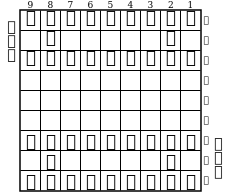

In [ ]:
# Jupyterで実行している場合、盤面をsvgで表示できる
board

In [ ]:
# テキスト形式で表示
print(board)

'  9  8  7  6  5  4  3  2  1
P1-KY-KE-GI-KI-OU-KI-GI-KE-KY
P2 * -HI *  *  *  *  * -KA * 
P3-FU-FU-FU-FU-FU-FU-FU-FU-FU
P4 *  *  *  *  *  *  *  *  * 
P5 *  *  *  *  *  *  *  *  * 
P6 *  *  *  *  *  *  *  *  * 
P7+FU+FU+FU+FU+FU+FU+FU+FU+FU
P8 * +KA *  *  *  *  * +HI * 
P9+KY+KE+GI+KI+OU+KI+GI+KE+KY
+



In [ ]:
# 合法手の一覧
for move in board.legal_moves:
    print(move_to_usi(move))

1g1f
2g2f
3g3f
4g4f
5g5f
6g6f
7g7f
8g8f
9g9f
1i1h
9i9h
3i3h
3i4h
7i6h
7i7h
2h1h
2h3h
2h4h
2h5h
2h6h
2h7h
4i3h
4i4h
4i5h
6i5h
6i6h
6i7h
5i4h
5i5h
5i6h


In [ ]:
# 指す
move = board.push_usi('7g7f')

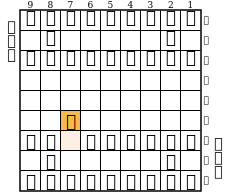

In [ ]:
# 直前の手を指定してsvgで表示
board.to_svg(move)

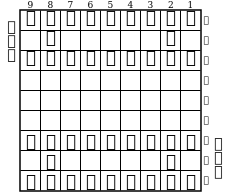

In [ ]:
# 手を戻す
board.pop(move)

board

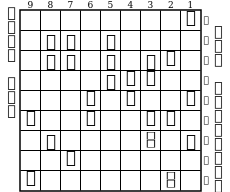

In [ ]:
# sfen形式で局面を設定
board.set_sfen('8l/1+B+P1G4/1K+B1+P1+Pp1/4Ppp2/3s1n2p/l2g2ks1/1P4+n1P/2r6/+p6+s1 b R2GSNL4Pnl3p 187')

board

## USIエンジンの操作

### Lesserkaiのソースをダウンロードしてビルド

In [ ]:
!wget http://shogidokoro.starfree.jp/download/LesserkaiSrc.zip
!unzip LesserkaiSrc.zip
%cd LesserkaiSrc/Lesserkai
!make
%cd -

--2020-04-04 07:56:48--  http://shogidokoro.starfree.jp/download/LesserkaiSrc.zip
Resolving shogidokoro.starfree.jp (shogidokoro.starfree.jp)... 157.112.187.101
Connecting to shogidokoro.starfree.jp (shogidokoro.starfree.jp)|157.112.187.101|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47694 (47K) [application/zip]
Saving to: ‘LesserkaiSrc.zip’

LesserkaiSrc.zip    100%[===================>]  46.58K   145KB/s    in 0.3s    

2020-04-04 07:56:49 (145 KB/s) - ‘LesserkaiSrc.zip’ saved [47694/47694]

Archive:  LesserkaiSrc.zip
  inflating: LesserkaiSrc/Lesserkai/Globals.cpp  
  inflating: LesserkaiSrc/Lesserkai/Joseki.cpp  
  inflating: LesserkaiSrc/Lesserkai/KomaMoves.cpp  
  inflating: LesserkaiSrc/Lesserkai/Kyokumen.cpp  
  inflating: LesserkaiSrc/Lesserkai/Kyokumen.h  
  inflating: LesserkaiSrc/Lesserkai/Lesserkai.cpp  
  inflating: LesserkaiSrc/Lesserkai/Lesserkai.vcxproj  
  inflating: LesserkaiSrc/Lesserkai/Lesserkai.vcxproj.filters  
  inflating: Lesserka

### USIエンジンを操作

In [ ]:
from cshogi.usi import Engine

engine = Engine('/content/LesserkaiSrc/Lesserkai/Lesserkai')

In [ ]:
# オプションの表示
engine.usi()

['id name Lesserkai 1.4.2',
 'id author Program Writer',
 'option name BookFile type string default public.bin',
 'option name UseBook type check default true']

In [ ]:
# オプション設定
engine.setoption('UseBook', 'false')

In [ ]:
# isreadyの送信
engine.isready()

In [ ]:
# usinewgameの送信
engine.usinewgame()

In [ ]:
# positionの送信
# 初期局面
engine.position()

In [ ]:
# 初期局面以外
engine.position(['7g7f'])

In [ ]:
# sfenで指定
engine.position(sfen='sfen 7nl/5kP2/3p2g1p/2p1gp3/p6sP/s1BGpN3/4nPSp1/1+r4R2/L1+p3K1L w GSNLPb6p 122')

In [ ]:
# goの送信
engine.go()

('8h3h', None)

In [ ]:
# 秒読み指定
engine.go(byoyomi=1000)

('3i3h', None)

In [ ]:
# エンジン終了
engine.quit()

In [ ]:
# エンジン再接続
engine.connect()

## USIエンジン同士の対局

Lesserkai 1.4.2
isready
readyok
Lesserkai 1.4.2
isready
readyok
開始局面


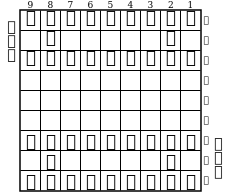

usinewgame
usinewgame
position startpos
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 10 pv 6i7h
info currmove 6i7h
info time 0 depth 2 nodes 126 score cp 0 pv 6i7h 4a3b
info currmove 6i7h
info time 2 depth 3 nodes 2076 score cp 3 pv 6i7h 4a3b 4i5h
info currmove 6i7h
info currmove 6i7h
info time 6 depth 4 nodes 6553 score cp 0 pv 6i7h 4a3b 4i5h 5a4b
info currmove 6i7h
info time 16 nodes 21490 score cp 0 pv 6i7h 4a3b 4i5h 5a4b
bestmove 6i7h
1手目


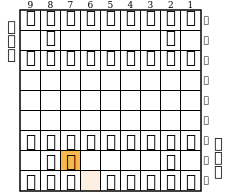

position startpos moves 6i7h
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 0 pv 4a3b
info currmove 4a3b
info time 1 depth 2 nodes 120 score cp -3 pv 4a3b 4i5h
info currmove 4a3b
info time 2 depth 3 nodes 1890 score cp 0 pv 4a3b 4i5h 5a4b
info currmove 4a3b
info currmove 4a3b
info time 5 depth 4 nodes 5981 score cp -3 pv 4a3b 4i5h 5a4b 5i6h
info currmove 4a3b
info time 10 nodes 19606 score cp -3 pv 4a3b 4i5h 5a4b 5i6h
bestmove 4a3b
2手目


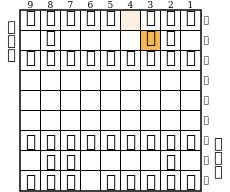

position startpos moves 6i7h 4a3b
go byoyomi 1000
info time 0 depth 1 nodes 30 score cp 3 pv 4i5h
info currmove 4i5h
info time 0 depth 2 nodes 116 score cp 0 pv 4i5h 5a4b
info currmove 4i5h
info time 1 depth 3 nodes 1035 score cp 3 pv 4i5h 5a4b 5i6h
info currmove 4i5h
info currmove 4i5h
info time 3 depth 4 nodes 4768 score cp 0 pv 4i5h 5a4b 5i6h 6a5b
info currmove 4i5h
info time 7 nodes 16080 score cp 0 pv 4i5h 5a4b 5i6h 6a5b
bestmove 4i5h
3手目


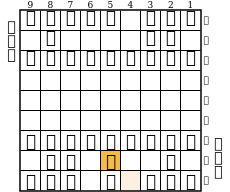

position startpos moves 6i7h 4a3b 4i5h
go byoyomi 1000
info time 0 depth 1 nodes 30 score cp 0 pv 5a4b
info currmove 5a4b
info time 1 depth 2 nodes 110 score cp -3 pv 5a4b 5i6h
info currmove 5a4b
info time 2 depth 3 nodes 942 score cp 0 pv 5a4b 5i6h 6a5b
info currmove 5a4b
info currmove 5a4b
info time 4 depth 4 nodes 4359 score cp -1 pv 5a4b 5i6h 6a5b 1g1f
info currmove 5a4b
info time 8 nodes 14210 score cp -1 pv 5a4b 5i6h 6a5b 1g1f
bestmove 5a4b
4手目


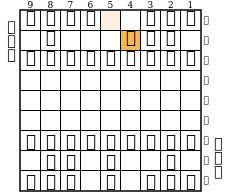

position startpos moves 6i7h 4a3b 4i5h 5a4b
go byoyomi 1000
info time 0 depth 1 nodes 27 score cp 3 pv 5i6h
info currmove 5i6h
info time 0 depth 2 nodes 104 score cp 0 pv 5i6h 6a5b
info currmove 5i6h
info time 1 depth 3 nodes 800 score cp 1 pv 5i6h 6a5b 1g1f
info currmove 5i6h
info currmove 5i6h
info time 3 depth 4 nodes 3880 score cp 0 pv 5i6h 6a5b 1g1f 1c1d
info currmove 5i6h
info time 7 nodes 12003 score cp 0 pv 5i6h 6a5b 1g1f 1c1d
bestmove 5i6h
5手目


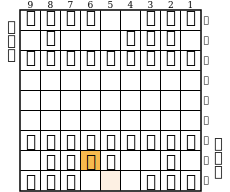

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h
go byoyomi 1000
info time 0 depth 1 nodes 27 score cp 0 pv 6a5b
info currmove 6a5b
info time 0 depth 2 nodes 96 score cp -1 pv 6a5b 1g1f
info currmove 6a5b
info time 0 depth 3 nodes 696 score cp 0 pv 6a5b 1g1f 1c1d
info currmove 6a5b
info currmove 6a5b
info time 2 depth 4 nodes 4407 score cp -3 pv 6a5b 6g6f 3c3d 5h6g
info currmove 6a5b
info time 5 depth 4 nodes 10503 score cp -2 pv 3c3d 1g1f 6a5b 1f1e
info time 11 nodes 17142 score cp -2 pv 3c3d 1g1f 6a5b 1f1e
bestmove 3c3d
6手目


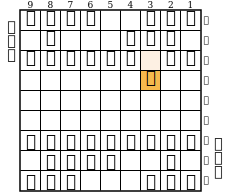

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d
go byoyomi 1000
info currmove 1g1f
info time 0 depth 1 nodes 4 score cp 3 pv 1g1f
info currmove 1g1f
info currmove 1g1f
info time 0 depth 2 nodes 113 score cp 0 pv 1g1f 6a5b
info currmove 1g1f
info currmove 1g1f
info time 1 depth 3 nodes 1596 score cp 2 pv 1g1f 6a5b 1f1e
info currmove 1g1f
info currmove 1g1f
info time 4 depth 4 nodes 5067 score cp 0 pv 1g1f 6a5b 1f1e 3d3e
info currmove 1g1f
info time 8 nodes 12010 score cp 0 pv 1g1f 6a5b 1f1e 3d3e
bestmove 1g1f
7手目


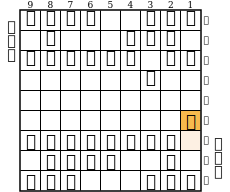

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f
go byoyomi 1000
info currmove 6a5b
info time 0 depth 1 nodes 3 score cp 0 pv 6a5b
info currmove 6a5b
info time 0 depth 2 nodes 119 score cp -2 pv 6a5b 1f1e
info currmove 6a5b
info currmove 6a5b
info time 1 depth 3 nodes 970 score cp 0 pv 6a5b 1f1e 3d3e
info currmove 6a5b
info currmove 6a5b
info time 3 depth 4 nodes 4579 score cp -1 pv 6a5b 1f1e 3d3e 2g2f
info currmove 6a5b
info time 12 nodes 18066 score cp -1 pv 6a5b 1f1e 3d3e 2g2f
bestmove 6a5b
8手目


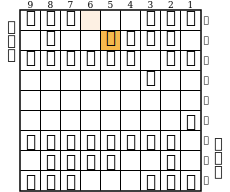

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b
go byoyomi 1000
info currmove 1f1e
info time 0 depth 1 nodes 4 score cp 2 pv 1f1e
info currmove 1f1e
info currmove 1f1e
info time 1 depth 2 nodes 110 score cp 0 pv 1f1e 3d3e
info currmove 1f1e
info currmove 1f1e
info time 1 depth 3 nodes 898 score cp 1 pv 1f1e 3d3e 2g2f
info currmove 1f1e
info currmove 1f1e
info time 4 depth 4 nodes 5361 score cp -2 pv 1f1e 2b3c 2g2f 3a2b
info currmove 1f1e
info time 22 nodes 32687 score cp -2 pv 1f1e 2b3c 2g2f 3a2b
bestmove 1f1e
9手目


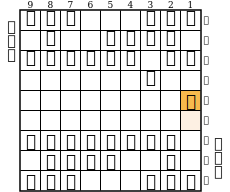

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e
go byoyomi 1000
info time 0 depth 1 nodes 32 score cp 0 pv 3d3e
info currmove 3d3e
info time 0 depth 2 nodes 105 score cp -1 pv 3d3e 2g2f
info currmove 3d3e
info time 1 depth 3 nodes 927 score cp 0 pv 3d3e 2g2f 2c2d
info currmove 3d3e
info time 2 depth 3 nodes 1743 score cp 1 pv 4c4d 2g2f 5b4c
info time 3 depth 3 nodes 2851 score cp 2 pv 2b3c 2g2f 3a2b
info currmove 3d3e
info time 5 depth 4 nodes 5359 score cp -2 pv 3d3e 2g2f 2c2d 2f2e
info currmove 2b3c
info time 6 depth 4 nodes 7089 score cp 0 pv 2b3c 2g2f 3a2b 2f2e
info time 14 nodes 16555 score cp 0 pv 2b3c 2g2f 3a2b 2f2e
bestmove 2b3c
10手目


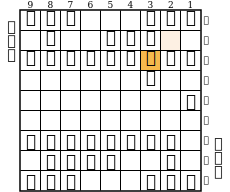

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c
go byoyomi 1000
info currmove 2g2f
info time 0 depth 1 nodes 4 score cp 3 pv 2g2f
info currmove 2g2f
info currmove 2g2f
info time 0 depth 2 nodes 112 score cp -2 pv 2g2f 3a2b
info currmove 2g2f
info currmove 2g2f
info time 1 depth 3 nodes 928 score cp 0 pv 2g2f 3a2b 2f2e
info currmove 2g2f
info currmove 2g2f
info time 4 depth 4 nodes 4221 score cp -2 pv 2g2f 3a2b 2f2e 3d3e
info currmove 2g2f
info time 12 nodes 13304 score cp -2 pv 2g2f 3a2b 2f2e 3d3e
bestmove 2g2f
11手目


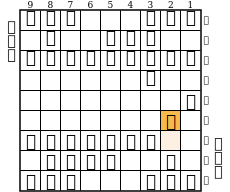

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 2 pv 3a2b
info currmove 3a2b
info time 0 depth 2 nodes 109 score cp 0 pv 3a2b 2f2e
info currmove 3a2b
info time 1 depth 3 nodes 1023 score cp 2 pv 3a2b 2f2e 3d3e
info currmove 3a2b
info currmove 3a2b
info time 4 depth 4 nodes 4541 score cp 1 pv 3a2b 2f2e 3d3e 4g4f
info currmove 3a2b
info time 13 nodes 15402 score cp 1 pv 3a2b 2f2e 3d3e 4g4f
bestmove 3a2b
12手目


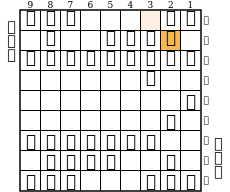

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b
go byoyomi 1000
info currmove 2f2e
info time 0 depth 1 nodes 4 score cp 0 pv 2f2e
info currmove 2f2e
info currmove 2f2e
info time 0 depth 2 nodes 112 score cp -2 pv 2f2e 3d3e
info currmove 2f2e
info currmove 2f2e
info time 1 depth 3 nodes 901 score cp -1 pv 2f2e 3d3e 4g4f
info currmove 2f2e
info currmove 2f2e
info time 6 depth 4 nodes 5941 score cp -4 pv 2f2e 3c4d 2e2d 2c2d
info currmove 2f2e
info time 24 nodes 26875 score cp -4 pv 2f2e 3c4d 2e2d 2c2d
bestmove 2f2e
13手目


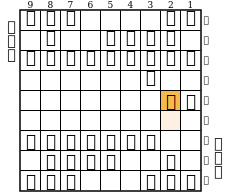

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e
go byoyomi 1000
info currmove 3d3e
info time 0 depth 1 nodes 4 score cp 2 pv 3d3e
info currmove 3d3e
info currmove 3d3e
info time 0 depth 2 nodes 112 score cp 1 pv 3d3e 4g4f
info currmove 3d3e
info currmove 3d3e
info time 1 depth 3 nodes 959 score cp 2 pv 3d3e 4g4f 4c4d
info currmove 3d3e
info time 2 depth 3 nodes 1758 score cp 3 pv 4c4d 3g3f 5b4c
info time 3 depth 3 nodes 2964 score cp 4 pv 3c4d 2e2d 2c2d
info currmove 3d3e
info time 5 depth 4 nodes 6311 score cp 1 pv 3d3e 4g4f 4c4d 5g5f
info currmove 3c4d
info time 16 nodes 17546 score cp 1 pv 3d3e 4g4f 4c4d 5g5f
bestmove 3d3e
14手目


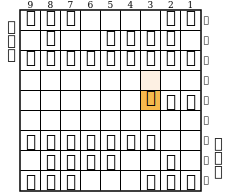

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e
go byoyomi 1000
info currmove 4g4f
info time 0 depth 1 nodes 4 score cp -1 pv 4g4f
info currmove 4g4f
info currmove 4g4f
info time 1 depth 2 nodes 113 score cp -2 pv 4g4f 4c4d
info currmove 4g4f
info currmove 4g4f
info time 1 depth 3 nodes 903 score cp -1 pv 4g4f 4c4d 5g5f
info currmove 4g4f
info currmove 4g4f
info time 5 depth 4 nodes 4819 score cp -4 pv 4g4f 4c4d 5g5f 5b4c
info currmove 4g4f
info time 21 nodes 22720 score cp -4 pv 4g4f 4c4d 5g5f 5b4c
bestmove 4g4f
15手目


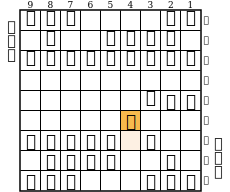

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f
go byoyomi 1000
info currmove 4c4d
info time 0 depth 1 nodes 4 score cp 2 pv 4c4d
info currmove 4c4d
info currmove 4c4d
info time 0 depth 2 nodes 113 score cp 1 pv 4c4d 5g5f
info currmove 4c4d
info currmove 4c4d
info time 1 depth 3 nodes 946 score cp 4 pv 4c4d 5g5f 5b4c
info currmove 4c4d
info currmove 4c4d
info time 4 depth 4 nodes 4792 score cp 1 pv 4c4d 6g6f 5b4c 5h6g
info currmove 4c4d
info time 13 depth 4 nodes 9258 score cp 4 pv 3c5e 2h2f 2b3c 4f4e
info time 20 nodes 17183 score cp 4 pv 3c5e 2h2f 2b3c 4f4e
bestmove 3c5e
16手目


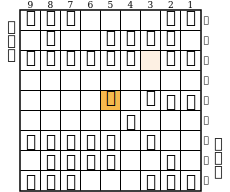

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e
go byoyomi 1000
info currmove 4f4e
info time 0 depth 1 nodes 4 score cp 1 pv 4f4e
info currmove 4f4e
info currmove 4f4e
info time 1 depth 2 nodes 124 score cp -4 pv 4f4e 2b3c
info currmove 4f4e
info currmove 4f4e
info time 3 depth 3 nodes 2750 score cp -192 pv 4f4e 2a3c 2e2d
info currmove 4f4e
info time 4 depth 3 nodes 3698 score cp -4 pv 2h2f 2b3c 4f4e
info currmove 4f4e
info time 11 depth 4 nodes 8435 score cp -3 pv 4f4e 2b3c 5g5f 5e4f
info currmove 2h2f
info time 20 nodes 20596 score cp -3 pv 4f4e 2b3c 5g5f 5e4f
bestmove 4f4e
17手目


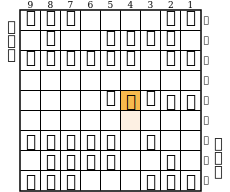

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e
go byoyomi 1000
info time 0 depth 1 nodes 39 score cp 0 pv 4c4d
info time 0 depth 1 nodes 41 score cp 4 pv 2b3c
info currmove 2b3c
info time 1 depth 2 nodes 119 score cp 3 pv 2b3c 5g5f
info time 1 depth 2 nodes 212 score cp 192 pv 2a3c 2e2d
info currmove 2a3c
info time 2 depth 3 nodes 1204 score cp -2 pv 2a3c 5g5f 5e4f
info currmove 2b3c
info time 3 depth 3 nodes 2066 score cp 3 pv 2b3c 5g5f 5e4f
info currmove 2a3c
info time 8 depth 4 nodes 7329 score cp 195 pv 2a3c 2e2d 3c4e 3i3h
info currmove 2b3c
info time 30 depth 4 nodes 31412 score cp 1289 pv 3e3f 2h2f 3f3g+ 2e2d
info time 30 nodes 31412 score cp 1289 pv 3e3f 2h2f 3f3g+ 2e2d
bestmove 3e3f
18手目


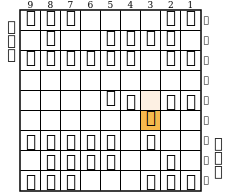

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f
go byoyomi 1000
info currmove 5h4g
info time 0 depth 1 nodes 4 score cp -24 pv 5h4g
info currmove 5g5f
info time 0 depth 1 nodes 35 score cp -11 pv 2h3h
info currmove 2h3h
info time 0 depth 2 nodes 126 score cp -11 pv 2h3h 3f3g
info currmove 5g5f
info time 0 depth 2 nodes 200 score cp 195 pv 5g5f 5e4f
info currmove 2h3h
info time 2 depth 3 nodes 1881 score cp -1301 pv 2h3h 3f3g+ 3h1h
info currmove 5g5f
info time 4 depth 3 nodes 3381 score cp -1289 pv 2h2f 3f3g+ 2e2d
info currmove 5g5f
info time 8 depth 4 nodes 8133 score cp -415 pv 5g5f 5e3g+ 2h1h 3g4f
info currmove 2h2f
info time 28 nodes 26253 score cp -415 pv 5g5f 5e3g+ 2h1h 3g4f
bestmove 5g5f
19手目


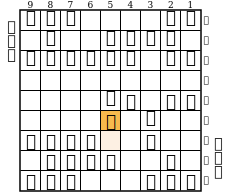

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f
go byoyomi 1000
info currmove 5e4f
info time 0 depth 1 nodes 3 score cp -195 pv 5e4f
info currmove 5e4f
info time 1 depth 2 nodes 89 score cp 1317 pv 5e4f 6h6i
info currmove 5e4f
info currmove 5e4f
info time 1 depth 3 nodes 425 score cp -182 pv 5e4f 5h5g 4f6d
info currmove 5e4f
info time 2 depth 3 nodes 1351 score cp 415 pv 5e3g+ 2h1h 3g4f
info currmove 5e3g+
info time 7 depth 4 nodes 5238 score cp 622 pv 5e3g+ 2h1h 3g4f 6h6i
info currmove 5e4f
info time 9 depth 4 nodes 7286 score cp 1483 pv 5e4f 6h6i 3f3g+ 2h2f
info time 50 nodes 44576 score cp 1483 pv 5e4f 6h6i 3f3g+ 2h2f
bestmove 5e4f
20手目


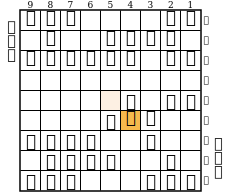

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f
go byoyomi 1000
info currmove 5h5g
info time 0 depth 1 nodes 3 score cp -1328 pv 5h5g
info time 0 depth 1 nodes 9 score cp -1317 pv 6h6i
info currmove 5h5g
info time 0 depth 2 nodes 86 score cp 182 pv 5h5g 4f6d
info currmove 6h6i
info currmove 5h5g
info time 2 depth 3 nodes 1123 score cp -1313 pv 5h5g 3f3g+ 2h2f
info currmove 6h6i
info time 3 depth 3 nodes 2121 score cp -1302 pv 6h6i 3f3g+ 2h2f
info currmove 5h5g
info time 9 depth 4 nodes 5898 score cp -1313 pv 5h5g 3f3g+ 2h2f 4f6d
info currmove 6h6i
info time 13 depth 4 nodes 10123 score cp -1312 pv 6h6i 3f3g+ 2h2f P*3f
info time 15 nodes 11134 score cp -1312 pv 6h6i 3f3g+ 2h2f P*3f
bestmove 6h6i
21手目


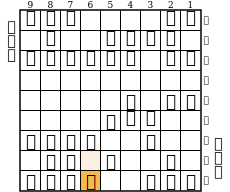

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i
go byoyomi 1000
info currmove 3f3g+
info time 0 depth 1 nodes 4 score cp 1302 pv 3f3g+
info currmove 3f3g+
info currmove 3f3g+
info time 0 depth 2 nodes 131 score cp 1302 pv 3f3g+ 2h2f
info currmove 3f3g+
info currmove 3f3g+
info time 2 depth 3 nodes 1296 score cp 1312 pv 3f3g+ 2h2f P*3f
info currmove 3f3g+
info currmove 3f3g+
info time 8 depth 4 nodes 7126 score cp 2057 pv 3f3g+ 2h1h P*3h 3i4h
info currmove 3f3g+
info time 37 nodes 35963 score cp 2057 pv 3f3g+ 2h1h P*3h 3i4h
bestmove 3f3g+
22手目


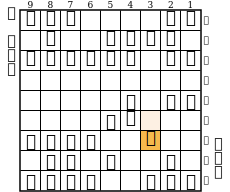

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+
go byoyomi 1000
info time 0 depth 1 nodes 32 score cp -1302 pv 2h2f
info currmove 2h2f
info time 0 depth 2 nodes 146 score cp -1312 pv 2h2f P*3f
info currmove 2h2f
info time 2 depth 3 nodes 1719 score cp -2457 pv 2h2f 3g4g 2f1f
info currmove 2h2f
info time 4 depth 3 nodes 2847 score cp -2057 pv 2h1h P*3h 3i4h
info currmove 2h2f
info time 10 depth 4 nodes 9104 score cp -1396 pv 2h2f 4f7i+ 8h7i S*3f
info currmove 2h1h
info time 44 nodes 36540 score cp -1396 pv 2h2f 4f7i+ 8h7i S*3f
bestmove 2h2f
23手目


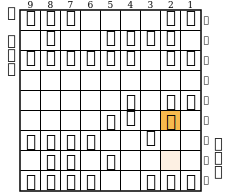

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f
go byoyomi 1000
info currmove 3g4g
info time 0 depth 1 nodes 4 score cp -3 pv 3g4g
info currmove P*3f
info time 0 depth 1 nodes 5 score cp 1312 pv P*3f
info currmove 3g4g
info time 1 depth 2 nodes 153 score cp 2457 pv 3g4g 2f1f
info currmove P*3f
info currmove 3g4g
info time 3 depth 3 nodes 1567 score cp 75 pv 3g4g 2f1f 4g5h
info currmove P*3f
info time 4 depth 3 nodes 2313 score cp 1316 pv P*3f 6g6f 2b3c
info time 5 depth 3 nodes 2990 score cp 1396 pv 4f7i+ 8h7i S*3f
info currmove 4f7i+
info time 22 depth 4 nodes 16178 score cp 1843 pv 4f7i+ 8h7i P*3h 3i4h
info currmove 3g4g
info time 27 depth 4 nodes 19802 score cp 2682 pv 3g4g 5h4g 4f1i+ 2e2d
info time 94 nodes 84493 score cp 2682 pv 3g4g 5h4g 4f1i+ 2e2d
bestmove 3g4g
24手目


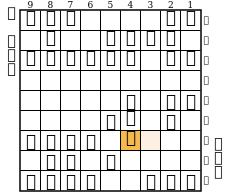

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g
go byoyomi 1000
info currmove 2f1f
info time 0 depth 1 nodes 4 score cp -2457 pv 2f1f
info currmove 2f1f
info currmove 2f1f
info time 1 depth 2 nodes 157 score cp -75 pv 2f1f 4g5h
info currmove 2f1f
info currmove 2f1f
info time 2 depth 3 nodes 1505 score cp -3563 pv 2f1f 4g5h 6i5h
info currmove 2f1f
info time 4 depth 3 nodes 3300 score cp -2670 pv 5h4g 4f1i+ 2e2d
info currmove 5h4g
info time 12 depth 4 nodes 12468 score cp -2817 pv 5h4g 4f1i+ 2e2d L*1h
info currmove 2f1f
info time 20 depth 4 nodes 19218 score cp -2754 pv 5h5i 4f1i+ 5i4i P*3h
info time 39 nodes 34225 score cp -2754 pv 5h5i 4f1i+ 5i4i P*3h
bestmove 5h5i
25手目


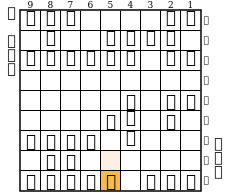

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i
go byoyomi 1000
info currmove 4f1i+
info time 0 depth 1 nodes 4 score cp 2754 pv 4f1i+
info currmove 4f1i+
info currmove 4f1i+
info time 1 depth 2 nodes 145 score cp 2742 pv 4f1i+ 2e2d
info currmove 4f1i+
info currmove 4f1i+
info time 4 depth 3 nodes 2918 score cp 2754 pv 4f1i+ 5i4i P*3h
info currmove 4f1i+
info currmove 4f1i+
info time 14 depth 4 nodes 11217 score cp 2959 pv 4f1i+ 2i1g 1i1h 2f1f
info currmove 4f1i+
info time 51 depth 4 nodes 45970 score cp 3674 pv P*3g 2f3f 3g3h+ 3f3b+
info time 71 nodes 66765 score cp 3674 pv P*3g 2f3f 3g3h+ 3f3b+
bestmove P*3g
26手目


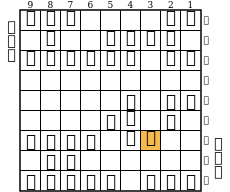

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g
go byoyomi 1000
info currmove 5i4i
info time 0 depth 1 nodes 3 score cp -1315 pv 5i4i
info currmove 5i4i
info time 0 depth 2 nodes 130 score cp -1840 pv 5i4i 3g3h+
info currmove 5i4i
info time 1 depth 2 nodes 940 score cp -1455 pv 2f2g 4f5g+
info currmove 5i4i
info time 3 depth 3 nodes 2052 score cp -3831 pv 5i4i 3g3h+ 6i5i
info currmove 2f2g
info time 9 depth 3 nodes 4426 score cp -2983 pv 2f4f 4g4f 4e4d
info currmove 2f4f
info time 22 depth 4 nodes 10619 score cp -3391 pv 2f4f 4g4f 4e4d R*2g
info currmove 2f2g
info time 29 depth 4 nodes 15143 score cp -2833 pv 2f2g 3g3h+ 2g4g 4f1i+
info time 44 nodes 26246 score cp -2833 pv 2f2g 3g3h+ 2g4g 4f1i+
bestmove 2f2g
27手目


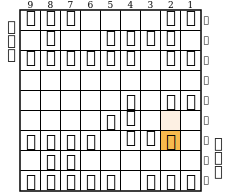

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g
go byoyomi 1000
info currmove 3g3h+
info time 0 depth 1 nodes 3 score cp 1110 pv 3g3h+
info time 0 depth 1 nodes 49 score cp 1455 pv 4f5g+
info currmove 3g3h+
info time 1 depth 2 nodes 129 score cp 4460 pv 3g3h+ 2g2f
info currmove 4f5g+
info currmove 3g3h+
info time 3 depth 3 nodes 2164 score cp 2833 pv 3g3h+ 2g4g 4f1i+
info currmove 4f5g+
info currmove 3g3h+
info time 9 depth 4 nodes 7158 score cp 4375 pv 3g3h+ 2g4g 4f7i+ 8h7i
info currmove 3g3h+
info time 40 nodes 34043 score cp 4375 pv 3g3h+ 2g4g 4f7i+ 8h7i
bestmove 3g3h+
28手目


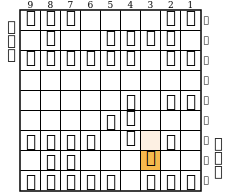

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+
go byoyomi 1000
info time 0 depth 1 nodes 31 score cp -4212 pv 2g4g
info currmove 2g4g
info time 1 depth 2 nodes 146 score cp -2471 pv 2g4g 4f1i+
info currmove 2g4g
info time 3 depth 3 nodes 1953 score cp -4354 pv 2g4g 4f7i+ 8h7i
info currmove 2g4g
info currmove 2g4g
info time 10 depth 4 nodes 9134 score cp -4356 pv 2g4g 4f7i+ 8h7i 3h3i
info currmove 2g4g
info time 31 nodes 28759 score cp -4356 pv 2g4g 4f7i+ 8h7i 3h3i
bestmove 2g4g
29手目


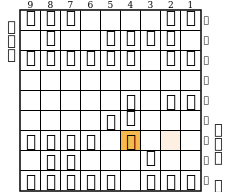

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g
go byoyomi 1000
info currmove 4f1i+
info time 0 depth 1 nodes 4 score cp 1246 pv 4f1i+
info currmove 4f7i+
info currmove 4f1i+
info time 0 depth 2 nodes 167 score cp 2478 pv 4f1i+ 3i3h
info currmove 4f7i+
info time 0 depth 2 nodes 179 score cp 2776 pv 4f7i+ 8h7i
info currmove 4f1i+
info time 3 depth 3 nodes 2734 score cp 2326 pv 4f1i+ P*3c 3h3i
info currmove 4f7i+
info time 4 depth 3 nodes 3117 score cp 2770 pv 4f7i+ 8h7i 3h3i
info currmove 4f7i+
info time 17 depth 4 nodes 12334 score cp 3370 pv 4f7i+ 8h7i 3h2i 5i4i
info currmove 4f7i+
info time 70 nodes 65986 score cp 3370 pv 4f7i+ 8h7i 3h2i 5i4i
bestmove 4f7i+
30手目


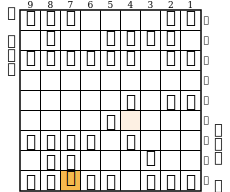

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+
go byoyomi 1000
info currmove 8h7i
info time 0 depth 1 nodes 4 score cp -2579 pv 8h7i
info currmove 8h7i
info currmove 8h7i
info time 1 depth 2 nodes 149 score cp -2574 pv 8h7i 3h3i
info currmove 8h7i
info currmove 8h7i
info time 7 depth 3 nodes 5130 score cp -3175 pv 8h7i 3h2i 5i4i
info currmove 8h7i
info currmove 8h7i
info time 18 depth 4 nodes 15946 score cp -2814 pv 8h7i 3h3i P*3c 4b3c
info currmove 8h7i
info time 34 depth 4 nodes 33649 score cp -2810 pv 6i7i 3h3i P*3c 2b3c
info time 38 nodes 37475 score cp -2810 pv 6i7i 3h3i P*3c 2b3c
bestmove 6i7i
31手目


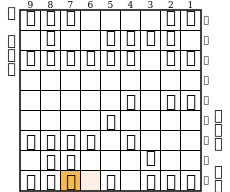

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i
go byoyomi 1000
info currmove 3h3i
info time 1 depth 1 nodes 4 score cp 1500 pv 3h3i
info currmove 3h2i
info currmove 3h3i
info time 1 depth 2 nodes 279 score cp 1500 pv 3h3i 2i3g
info currmove 3h2i
info time 1 depth 2 nodes 425 score cp 2115 pv 3h2i 5i4i
info currmove 3h3i
info time 10 depth 3 nodes 9248 score cp 1505 pv 3h3i 2i3g 2b3c
info currmove 3h2i
info currmove 3h3i
info time 29 depth 4 nodes 31683 score cp 1530 pv 3h3i 2i1g S*2f B*4h
info currmove 3h2i
info time 63 depth 4 nodes 60156 score cp 2114 pv 3h2i 3i3h 2i1i 5i5h
info time 153 nodes 161291 score cp 2114 pv 3h2i 3i3h 2i1i 5i5h
bestmove 3h2i
32手目


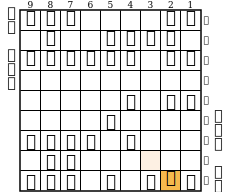

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i
go byoyomi 1000
info currmove P*3c
info time 0 depth 1 nodes 3 score cp -2935 pv P*3c
info time 1 depth 1 nodes 86 score cp -2120 pv 3i3h
info time 1 depth 1 nodes 88 score cp -2115 pv 5i4i
info currmove 5i4i
info time 1 depth 2 nodes 333 score cp -2124 pv 5i4i 2i1i
info currmove P*3c
info time 1 depth 2 nodes 511 score cp -1110 pv P*3c 2b3c
info currmove 5i4i
info time 16 depth 3 nodes 13331 score cp -2720 pv 5i4i 2i3i 4i3i
info currmove P*3c
info time 23 depth 3 nodes 18821 score cp -2330 pv P*3c 2b3c 5i4i
info time 28 depth 3 nodes 25136 score cp -2114 pv 3i3h 2i1i 5i5h
info currmove 3i3h
info time 48 depth 4 nodes 53242 score cp -2101 pv 3i3h 2i1i 4g1g L*1h
info currmove P*3c
info time 217 depth 4 nodes 268352 score cp -2004 pv 7g7f 2i3i B*6f 3i2i
info time 265 nodes 332956 score cp -2004 pv 7g7f 2

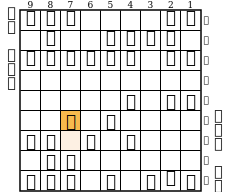

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f
go byoyomi 1000
info currmove 2i3i
info time 0 depth 1 nodes 3 score cp 2934 pv 2i3i
info currmove 2i3i
info time 0 depth 2 nodes 336 score cp 2919 pv 2i3i 5i5h
info currmove 2i3i
info currmove 2i3i
info time 14 depth 3 nodes 13767 score cp 2004 pv 2i3i B*6f 3i2i
info currmove 2i3i
info currmove 2i3i
info time 99 depth 4 nodes 97478 score cp 3019 pv 2i3i 4g4f 2a3c B*1f
info currmove 2i3i
info time 356 nodes 319793 score cp 3019 pv 2i3i 4g4f 2a3c B*1f
bestmove 2i3i
34手目


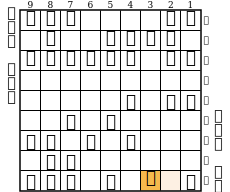

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i
go byoyomi 1000
info currmove B*6f
info time 1 depth 1 nodes 3 score cp -3024 pv B*6f
info time 1 depth 1 nodes 96 score cp -2934 pv 4g3g
info time 1 depth 1 nodes 104 score cp -2919 pv 5i5h
info currmove B*6f
info time 2 depth 2 nodes 341 score cp -2004 pv B*6f 3i2i
info currmove 5i5h
info currmove B*6f
info time 7 depth 3 nodes 4550 score cp -3164 pv B*6f S*3f 4g4f
info currmove 5i5h
info time 15 depth 3 nodes 11376 score cp -3059 pv 5i5h S*3f 4g4f
info time 34 depth 3 nodes 28342 score cp -3019 pv 4g4f 2a3c B*1f
info currmove B*6f
info time 92 depth 4 nodes 76651 score cp -2964 pv B*6f S*3h 4g4h 2b3c
info currmove 4g4f
info time 203 depth 4 nodes 204521 score cp -2927 pv 4e4d 2b3c 4g3g 3i2i
info time 498 nodes 532133 score cp -2927 pv 4e4d 2b3c 4g3g 3i2i
bestmove 4e4d
35手目


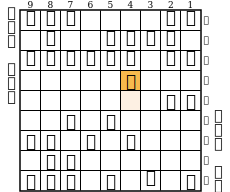

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d
go byoyomi 1000
info currmove 4c4d
info time 0 depth 1 nodes 4 score cp 2938 pv 4c4d
info currmove S*3f
info currmove 4c4d
info time 1 depth 2 nodes 352 score cp 2932 pv 4c4d 4g4d
info currmove S*3f
info time 1 depth 2 nodes 498 score cp 3062 pv S*3f 4g4f
info currmove 4c4d
info time 20 depth 3 nodes 22103 score cp 2933 pv 4c4d 4g4d 4b3c
info currmove S*3f
info currmove 4c4d
info time 35 depth 4 nodes 37192 score cp 2927 pv 4c4d 4g4d P*4c 4d3d
info currmove S*3f
info time 58 depth 4 nodes 57337 score cp 3064 pv S*3f 4d4c 3b4c 4g4f
info time 129 nodes 111520 score cp 3064 pv S*3f 4d4c 3b4c 4g4f
bestmove S*3f
36手目


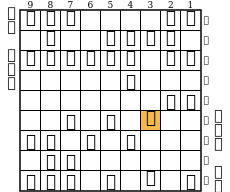

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f
go byoyomi 1000
info currmove 4d4c
info time 13 depth 1 nodes 3 score cp -6957 pv 4d4c
info time 14 depth 1 nodes 89 score cp -3062 pv 4g4f
info currmove 4g4f
info time 27 depth 2 nodes 360 score cp -3067 pv 4g4f 3f3g+
info currmove 4d4c
info time 27 depth 2 nodes 372 score cp -2862 pv 4d4c 5b4c
info currmove 4g4f
info time 51 depth 3 nodes 9858 score cp -3052 pv 4g4f 3f3g+ 5i5h
info currmove 4d4c
info currmove 4g4f
info time 90 depth 4 nodes 34542 score cp -3067 pv 4g4f 3f3g+ 4d4c 5b4c
info currmove 4d4c
info time 366 nodes 296849 score cp -3067 pv 4g4f 3f3g+ 4d4c 5b4c
bestmove 4g4f
37手目


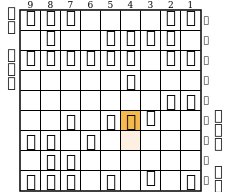

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f
go byoyomi 1000
info currmove S*4g
info time 1 depth 1 nodes 4 score cp 2797 pv S*4g
info currmove S*2h
info time 1 depth 1 nodes 124 score cp 3065 pv 3f2e
info time 1 depth 1 nodes 128 score cp 3067 pv 3f3g+
info currmove 3f3g+
info time 1 depth 2 nodes 354 score cp 3052 pv 3f3g+ 5i5h
info currmove S*2h
info currmove 3f3g+
info time 11 depth 3 nodes 7100 score cp 3067 pv 3f3g+ 4d4c 5b4c
info currmove 3f3g+
info currmove 3f3g+
info time 35 depth 4 nodes 26705 score cp 3052 pv 3f3g+ 4d4c 5b4c 5i5h
info currmove 3f3g+
info time 217 depth 4 nodes 170680 score cp 3055 pv 3i2i 1i1f 3f3g+ 5i5h
info time 501 nodes 398283 score cp 3067 pv 3i2i 1i1f 3f3g+ 5i5h
bestmove 3i2i
38手目


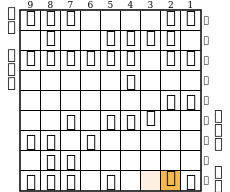

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i
go byoyomi 1000
info currmove 4d4c
info time 14 depth 1 nodes 4 score cp -3882 pv 4d4c
info currmove 4d4c+
info time 14 depth 1 nodes 5 score cp -2872 pv 4d4c+
info currmove 4d4c
info time 28 depth 2 nodes 159 score cp -807 pv 4d4c 5b4c
info currmove 4d4c+
info currmove 4d4c
info time 47 depth 3 nodes 7212 score cp -3062 pv 4d4c 5b4c 4f4i
info currmove 4d4c+
info time 59 depth 3 nodes 17276 score cp -3055 pv 1i1f 3f3g+ 5i5h
info currmove 4d4c
info time 94 depth 4 nodes 37621 score cp -1831 pv 4d4c 5b4c P*4d 2i1i
info currmove 1i1f
info time 183 depth 4 nodes 129031 score cp -1024 pv P*3c 2b3c 4d4c 3b4c
info time 328 nodes 299023 score cp -1024 pv P*3c 2b3c 4d4c 3b4c
bestmove P*3c
39手目


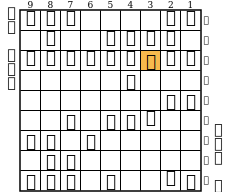

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c
go byoyomi 1000
info currmove 3b3c
info time 0 depth 1 nodes 3 score cp 1004 pv 3b3c
info time 0 depth 1 nodes 121 score cp 1018 pv 4b3c
info time 0 depth 1 nodes 123 score cp 1831 pv 2i1i
info currmove 3b3c
info time 1 depth 2 nodes 338 score cp 3069 pv 3b3c 4d4c+
info currmove 2i1i
info time 2 depth 2 nodes 662 score cp 3083 pv 4b3c 4d4c+
info time 3 depth 2 nodes 1599 score cp 3087 pv 2b3c 4d4c+
info time 4 depth 2 nodes 1975 score cp 3111 pv 3f4g+ 4f4g
info currmove 2i1i
info time 17 depth 3 nodes 15264 score cp -203 pv 2i1i 3c3b+ 4b3b
info currmove 3f4g+
info time 24 depth 3 nodes 21984 score cp 1004 pv 3b3c 4d4c+ 5b4c
info time 31 depth 3 nodes 29780 score cp 1024 pv 2b3c 4d4c+ 3b4c
info currmove 2b3c
info time 47 depth 4 nodes 38059 score cp 3279 pv 2b3c 4d4c+ 

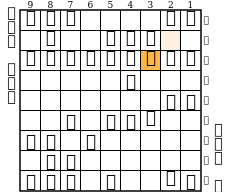

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c
go byoyomi 1000
info currmove 4d4c
info time 15 depth 1 nodes 3 score cp -4097 pv 4d4c
info time 15 depth 1 nodes 81 score cp -3331 pv 4f3f
info time 15 depth 1 nodes 83 score cp -3278 pv 1i1h
info time 15 depth 1 nodes 86 score cp -3087 pv 4d4c+
info currmove 4d4c
info time 27 depth 2 nodes 148 score cp -1024 pv 4d4c 3b4c
info currmove 4d4c+
info currmove 4d4c
info time 41 depth 3 nodes 1022 score cp -3279 pv 4d4c 3b4c 4f4i
info currmove 4d4c+
info currmove 4d4c
info time 89 depth 4 nodes 31636 score cp -2048 pv 4d4c 3b4c P*4d 2i1i
info currmove 4d4c
info time 243 nodes 214957 score cp -2048 pv 4d4c 3b4c P*4d 2i1i
bestmove 4d4c
41手目


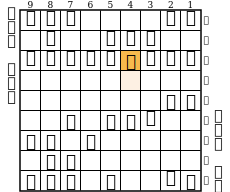

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c
go byoyomi 1000
info currmove 3b4c
info time 0 depth 1 nodes 4 score cp 1024 pv 3b4c
info currmove 3b4c
info currmove 3b4c
info time 0 depth 2 nodes 177 score cp 3279 pv 3b4c 4f4i
info currmove 3b4c
info currmove 3b4c
info time 8 depth 3 nodes 8771 score cp 2048 pv 3b4c P*4d 2i1i
info currmove 3b4c
info currmove 3b4c
info time 102 depth 4 nodes 91178 score cp 3285 pv 3b4c 1i1h 3f2g+ 4f4h
info currmove 3b4c
info time 237 nodes 196861 score cp 3285 pv 3b4c 1i1h 3f2g+ 4f4h
bestmove 3b4c
42手目


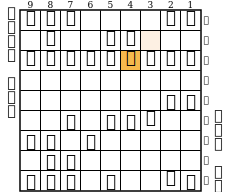

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c
go byoyomi 1000
info currmove P*4d
info time 25 depth 1 nodes 4 score cp -4294 pv P*4d
info currmove 4f4i
info time 25 depth 1 nodes 5 score cp -3279 pv 4f4i
info currmove P*4d
info time 48 depth 2 nodes 398 score cp -2048 pv P*4d 2i1i
info currmove 4f4i
info currmove P*4d
info time 85 depth 3 nodes 9140 score cp -3328 pv P*4d 3f4g+ 4f4g
info currmove 4f4i
info time 99 depth 3 nodes 20114 score cp -3285 pv 1i1h 3f2g+ 4f4h
info currmove 1i1h
info time 165 depth 4 nodes 83161 score cp -3285 pv 1i1h 3f3g 4f3f 3g2h+
info currmove P*4d
info time 195 depth 4 nodes 112140 score cp -2283 pv P*4d 4c4d 8h4d 3c4d
info time 501 nodes 449075 score cp -3285 pv P*4d 4c4d 8h4d 3c4d
bestmove P*4d
43手目


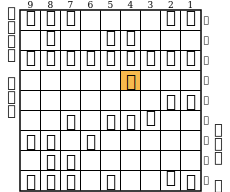

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d
go byoyomi 1000
info currmove 2i1i
info time 0 depth 1 nodes 4 score cp 2048 pv 2i1i
info currmove 3f4g+
info currmove 2i1i
info time 1 depth 2 nodes 368 score cp 2058 pv 2i1i 4d4c
info currmove 3f4g+
info time 1 depth 2 nodes 500 score cp 3328 pv 3f4g+ 4f4g
info currmove 2i1i
info time 9 depth 3 nodes 9224 score cp 8 pv 2i1i 4d4c 5b4c
info currmove 3f4g+
info time 15 depth 3 nodes 16490 score cp 1027 pv 3f2e 4d4c 5b4c
info time 21 depth 3 nodes 23140 score cp 2461 pv 4c4d 2e2d 2i1i
info currmove 4c4d
info time 63 depth 4 nodes 56968 score cp 2791 pv 4c4d 8h4d 3c4d 4f4d
info currmove 3f4g+
info time 187 depth 4 nodes 142435 score cp 3365 pv 4c3d 1i1h 3f2g+ B*3f
info time 482 nodes 361629 score cp 3365 pv 4c3d 1i1h 3f2g+ B*3f
bestmove 4c3d
44手目


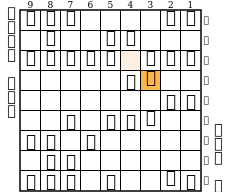

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d
go byoyomi 1000
info currmove 2e2d
info time 10 depth 1 nodes 4 score cp -4282 pv 2e2d
info currmove 4f4i
info time 10 depth 1 nodes 5 score cp -3269 pv 4f4i
info currmove 2e2d
info time 23 depth 2 nodes 371 score cp -2241 pv 2e2d 2i1i
info currmove 4f4i
info currmove 2e2d
info time 50 depth 3 nodes 14627 score cp -4232 pv 2e2d N*4g 5i5h
info currmove 4f4i
info time 65 depth 3 nodes 26491 score cp -3787 pv 4f3f S*2g 3f2f
info time 77 depth 3 nodes 34612 score cp -3365 pv 1i1h 3f2g+ B*3f
info currmove 1i1h
info time 126 depth 4 nodes 83222 score cp -3365 pv 1i1h 3f2g+ B*3f 2g2f
info currmove 2e2d
info time 172 depth 4 nodes 128161 score cp -2986 pv 2e2d 3d3e 4f4i 2i1i
info time 388 nodes 374121 score cp -2986 pv 2e2d 3d3e 4f4i 2i1i
bestmove 2e2

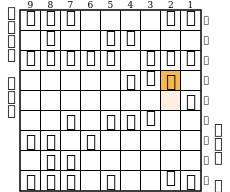

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d
go byoyomi 1000
info currmove N*4g
info time 0 depth 1 nodes 3 score cp 967 pv N*4g
info time 0 depth 1 nodes 137 score cp 1223 pv 2c2d
info time 0 depth 1 nodes 139 score cp 2241 pv 2i1i
info currmove 2i1i
info time 1 depth 2 nodes 369 score cp 3001 pv 2i1i 2d2c+
info currmove N*4g
info time 1 depth 2 nodes 494 score cp 4232 pv N*4g 5i5h
info currmove 2i1i
info time 16 depth 3 nodes 14990 score cp 2466 pv 2i1i 2d2c+ 3f3g+
info currmove N*4g
info time 22 depth 3 nodes 22157 score cp 2552 pv 2c2d B*1h 2i1i
info time 30 depth 3 nodes 30773 score cp 2986 pv 3d3e 4f4i 2i1i
info currmove 3d3e
info time 83 depth 4 nodes 73027 score cp 4042 pv 3d3e 4f4h N*4g 4h4i
info currmove N*4g
info time 501 nodes 381402 score cp 2986 pv 3d3e 4f4h N*4g 4h4i


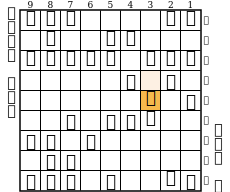

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e
go byoyomi 1000
info currmove 4f4i
info time 15 depth 1 nodes 4 score cp -3257 pv 4f4i
info currmove 4f4i
info currmove 4f4i
info time 29 depth 2 nodes 380 score cp -2986 pv 4f4i 2i1i
info currmove 4f4i
info currmove 4f4i
info time 56 depth 3 nodes 9139 score cp -4247 pv 4f4i N*3g 4i4h
info currmove 4f4i
info time 67 depth 3 nodes 17736 score cp -4042 pv 4f4h N*4g 4h4i
info currmove 4f4i
info time 124 depth 4 nodes 58283 score cp -3238 pv 4f4i N*3g 4i4h 2c2d
info currmove 4f4h
info time 322 nodes 264477 score cp -3238 pv 4f4i N*3g 4i4h 2c2d
bestmove 4f4i
47手目


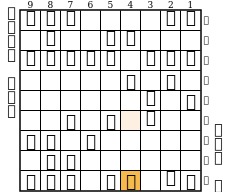

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i
go byoyomi 1000
info time 0 depth 1 nodes 138 score cp 1968 pv 2c2d
info time 0 depth 1 nodes 139 score cp 2986 pv 2i1i
info currmove 2i1i
info time 1 depth 2 nodes 368 score cp 3001 pv 2i1i 2d2c+
info time 1 depth 2 nodes 630 score cp 3045 pv 2c2d 4i2i
info time 2 depth 2 nodes 759 score cp 4247 pv N*3g 4i4h
info currmove 2i1i
info time 10 depth 3 nodes 9481 score cp 2256 pv 2i1i 2d2c+ 1i1h
info currmove N*3g
info time 14 depth 3 nodes 14020 score cp 3238 pv N*3g 4i4h 2c2d
info currmove N*3g
info time 54 depth 4 nodes 46481 score cp 3542 pv N*3g 4i4h S*4g 4h1h
info currmove N*3g
info time 157 depth 4 nodes 133086 score cp 4351 pv S*3h 4i4h N*4g 5i5h
info time 501 nodes 391823 score cp 3238 pv S*3h 4i4h N*4g 5i5h
bestmove S*3h
4

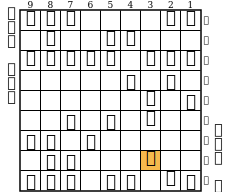

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h
go byoyomi 1000
info currmove 2d2c+
info time 15 depth 1 nodes 4 score cp -3752 pv 2d2c+
info currmove 4i4h
info currmove 2d2c+
info time 29 depth 2 nodes 316 score cp -3762 pv 2d2c+ 3h4i+
info currmove 4i4h
info time 29 depth 2 nodes 494 score cp -2181 pv 4i4h 2i1i
info currmove 2d2c+
info time 56 depth 3 nodes 12494 score cp -6077 pv 2d2c+ 3h4i+ 5i4i
info currmove 4i4h
info time 65 depth 3 nodes 19049 score cp -4172 pv 4i4h N*4g 5i5h
info currmove 4i4h
info time 111 depth 4 nodes 51991 score cp -3423 pv 4i4h 3f3g+ 4h5h 2c2d
info currmove 4i4h
info time 121 depth 4 nodes 61141 score cp -3018 pv 2d2c+ 3h4i+ 2c3c 4b3c
info time 259 nodes 193535 score cp -3018 pv 2d2c+ 3h4i+ 2c3c 4b3c
bestmove 2d2c+
49手目


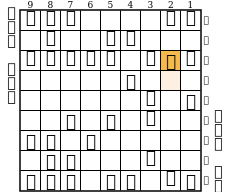

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+
go byoyomi 1000
info currmove 3h4i+
info time 0 depth 1 nodes 4 score cp 3762 pv 3h4i+
info currmove 3h4i+
info currmove 3h4i+
info time 0 depth 2 nodes 336 score cp 6059 pv 3h4i+ 5i4i
info currmove 3h4i+
info currmove 3h4i+
info time 9 depth 3 nodes 8229 score cp 3018 pv 3h4i+ 2c3c 4b3c
info currmove 3h4i+
info currmove 3h4i+
info time 38 depth 4 nodes 31168 score cp 5361 pv 3h4i+ 2c3c 4b3c 5i4i
info currmove 3h4i+
info time 189 nodes 146525 score cp 5361 pv 3h4i+ 2c3c 4b3c 5i4i
bestmove 3h4i+
50手目


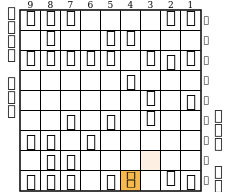

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+
go byoyomi 1000
info currmove 5i4i
info time 21 depth 1 nodes 4 score cp -6051 pv 5i4i
info currmove 2c3c
info currmove 5i4i
info time 41 depth 2 nodes 393 score cp -5308 pv 5i4i 2i1i
info currmove 2c3c
info time 41 depth 2 nodes 407 score cp -3018 pv 2c3c 4b3c
info currmove 5i4i
info time 76 depth 3 nodes 14640 score cp -6227 pv 5i4i P*4h 4i5h
info currmove 2c3c
info time 77 depth 3 nodes 15421 score cp -5361 pv 2c3c 4b3c 5i4i
info currmove 2c3c
info time 123 depth 4 nodes 45895 score cp -3231 pv 2c3c 4b3c 4d4c+ 3c4c
info currmove 2c3c
info time 349 nodes 266544 score cp -3231 pv 2c3c 4b3c 4d4c+ 3c4c
bestmove 2c3c
51手目


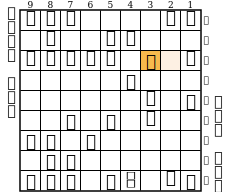

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c
go byoyomi 1000
info currmove 4b3c
info time 0 depth 1 nodes 4 score cp 3018 pv 4b3c
info currmove 4b3c
info currmove 4b3c
info time 1 depth 2 nodes 229 score cp 5361 pv 4b3c 5i4i
info currmove 4b3c
info currmove 4b3c
info time 11 depth 3 nodes 11098 score cp 3231 pv 4b3c 4d4c+ 3c4c
info currmove 4b3c
info currmove 4b3c
info time 55 depth 4 nodes 55502 score cp 5574 pv 4b3c 4d4c+ 3c4c 5i4i
info currmove 4b3c
info time 119 nodes 111946 score cp 5574 pv 4b3c 4d4c+ 3c4c 5i4i
bestmove 4b3c
52手目


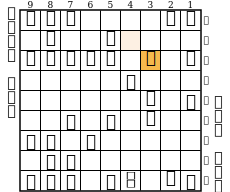

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c
go byoyomi 1000
info currmove 5i4i
info time 44 depth 1 nodes 4 score cp -5307 pv 5i4i
info currmove 4d4c+
info currmove 5i4i
info time 86 depth 2 nodes 480 score cp -5309 pv 5i4i 2i1i
info currmove 4d4c+
info time 86 depth 2 nodes 492 score cp -3231 pv 4d4c+ 3c4c
info currmove 5i4i
info time 117 depth 3 nodes 16841 score cp -5793 pv 5i4i R*4g S*5h
info currmove 4d4c+
info time 118 depth 3 nodes 17549 score cp -5574 pv 4d4c+ 3c4c 5i4i
info currmove 4d4c+
info time 146 depth 4 nodes 41241 score cp -3091 pv 4d4c+ 3c4c S*4d 4c3d
info currmove 4d4c+
info time 494 nodes 436811 score cp -3091 pv 4d4c+ 3c4c S*4d 4c3d
bestmove 4d4c+
53手目


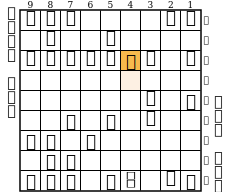

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+
go byoyomi 1000
info currmove 3c4c
info time 0 depth 1 nodes 4 score cp 3231 pv 3c4c
info currmove 3c4c
info currmove 3c4c
info time 1 depth 2 nodes 254 score cp 5574 pv 3c4c 5i4i
info currmove 3c4c
info currmove 3c4c
info time 11 depth 3 nodes 12772 score cp 3231 pv 3c4c P*4d 4c3b
info currmove 3c4c
info currmove 3c4c
info time 60 depth 4 nodes 58885 score cp 5546 pv 3c4c S*4d 4c3b 4d3e
info currmove 3c4c
info time 114 nodes 106357 score cp 5546 pv 3c4c S*4d 4c3b 4d3e
bestmove 3c4c
54手目


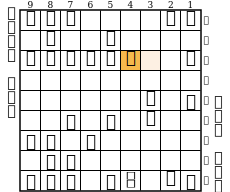

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c
go byoyomi 1000
info currmove 5i4i
info time 29 depth 1 nodes 4 score cp -5520 pv 5i4i
info currmove S*4d
info currmove 5i4i
info time 58 depth 2 nodes 507 score cp -4290 pv 5i4i 2a3c
info currmove S*4d
info time 58 depth 2 nodes 519 score cp -3291 pv S*4d 4c3d
info time 59 depth 2 nodes 942 score cp -3231 pv P*4d 4c3b
info currmove 5i4i
info time 107 depth 3 nodes 18503 score cp -6006 pv 5i4i R*4g S*5h
info currmove P*4d
info time 108 depth 3 nodes 19208 score cp -5574 pv P*4d 4c3b 5i4i
info time 124 depth 3 nodes 35874 score cp -5546 pv S*4d 4c3b 4d3e
info currmove S*4d
info time 157 depth 4 nodes 67639 score cp -3301 pv S*4d 4c3b P*3c 2a3c
info currmove P*4d
info time 501 nodes 484941 sco

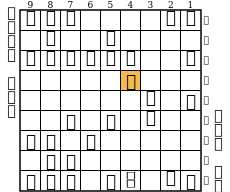

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d
go byoyomi 1000
info currmove 4c3d
info time 0 depth 1 nodes 4 score cp 3291 pv 4c3d
info currmove 4c3b
info currmove 4c3d
info time 0 depth 2 nodes 173 score cp 5536 pv 4c3d 4d3e
info currmove 4c3b
info time 0 depth 2 nodes 326 score cp 5546 pv 4c3b 4d3e
info currmove 4c3d
info time 9 depth 3 nodes 8248 score cp 2881 pv 4c3d 4d3e 3d3e
info currmove 4c3b
info time 17 depth 3 nodes 15927 score cp 3301 pv 4c3b P*3c 2a3c
info currmove 4c3b
info time 78 depth 4 nodes 69249 score cp 5327 pv 4c3b 4d3e 4i5i 8h1a+
info currmove 4c3b
info time 112 nodes 101471 score cp 5327 pv 4c3b 4d3e 4i5i 8h1a+
bestmove 4c3b
56手目


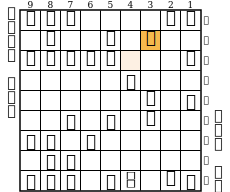

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b
go byoyomi 1000
info currmove 4d3e
info time 20 depth 1 nodes 4 score cp -5546 pv 4d3e
info currmove P*3c
info currmove 4d3e
info time 40 depth 2 nodes 417 score cp -4106 pv 4d3e 4i5i
info currmove P*3c
info time 40 depth 2 nodes 433 score cp -3301 pv P*3c 2a3c
info currmove 4d3e
info time 77 depth 3 nodes 17513 score cp -5327 pv 4d3e 4i5i 8h1a+
info currmove P*3c
info currmove 4d3e
info time 133 depth 4 nodes 68894 score cp -4167 pv 4d3e 4i5i G*2b 3b4b
info currmove P*3c
info time 369 depth 4 nodes 280132 score cp -3987 pv B*6e 3b2c 4d3e 4i5i
info time 441 nodes 347683 score cp -3987 pv B*6e 3b2c 4d3e 4i5i
bestmove B*6e
57手目


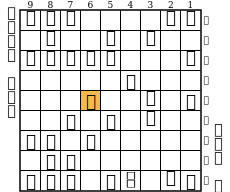

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e
go byoyomi 1000
info currmove N*4c
info time 0 depth 1 nodes 4 score cp 3356 pv N*4c
info currmove N*4c
info currmove N*4c
info time 1 depth 2 nodes 115 score cp 5601 pv N*4c 4d3e
info currmove N*4c
info time 1 depth 2 nodes 223 score cp 5644 pv 3b2b 4d3e
info currmove 3b2b
info time 7 depth 3 nodes 5112 score cp 934 pv 3b2b 4d3e 2a3c
info currmove N*4c
info time 10 depth 3 nodes 8088 score cp 3566 pv N*4c P*3c 2a3c
info time 22 depth 3 nodes 18546 score cp 3987 pv 3b2c 4d3e 4i5i
info currmove 3b2b
info time 32 depth 4 nodes 26855 score cp 3296 pv 3b2b 4d3e 2a3c 5i4i
info currmove 3b2c
info time 50 depth 4 nodes 45474 score cp 5217 pv 3b2c 4d3e 4i5i 6e2a+
info time 68 depth 4 

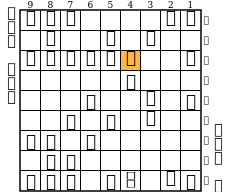

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c
go byoyomi 1000
info currmove P*3c
info time 31 depth 1 nodes 3 score cp -8056 pv P*3c
info time 31 depth 1 nodes 59 score cp -5645 pv 5i4i
info time 31 depth 1 nodes 66 score cp -5601 pv 4d3e
info currmove 4d3e
info time 55 depth 2 nodes 267 score cp -4161 pv 4d3e 4i5i
info currmove P*3c
info time 55 depth 2 nodes 283 score cp -3566 pv P*3c 2a3c
info currmove 4d3e
info time 89 depth 3 nodes 8314 score cp -6202 pv 4d3e 4i5i 8h1a+
info currmove P*3c
info time 89 depth 3 nodes 8590 score cp -5811 pv P*3c 2a3c 4d3e
info time 98 depth 3 nodes 16819 score cp -5703 pv 5i4i P*4h 4d3e
info currmove 5i4i
info time 135 depth 4 nodes 45913 score cp -4102 pv 5i4i 3e4f 4d4c 5b4c
info 

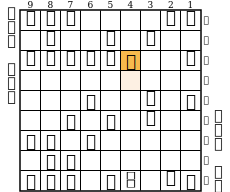

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c
go byoyomi 1000
info currmove 5b4c
info time 0 depth 1 nodes 4 score cp 3946 pv 5b4c
info currmove 5b4c
info currmove 5b4c
info time 1 depth 2 nodes 163 score cp 6217 pv 5b4c 5i4i
info currmove 5b4c
info currmove 5b4c
info time 10 depth 3 nodes 8218 score cp 3977 pv 5b4c N*2d 3b4b
info currmove 5b4c
info currmove 5b4c
info time 38 depth 4 nodes 33241 score cp 6321 pv 5b4c N*2d 3b4b 5i4i
info currmove 5b4c
info time 69 nodes 63628 score cp 6321 pv 5b4c N*2d 3b4b 5i4i
bestmove 5b4c
60手目


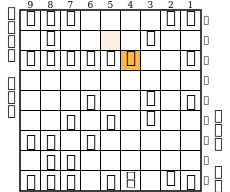

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c
go byoyomi 1000
info currmove N*2d
info time 42 depth 1 nodes 3 score cp -8691 pv N*2d
info time 42 depth 1 nodes 97 score cp -6235 pv 5i4i
info currmove 5i4i
info time 82 depth 2 nodes 421 score cp -5005 pv 5i4i 2a3c
info currmove N*2d
info time 82 depth 2 nodes 433 score cp -3977 pv N*2d 3b4b
info currmove 5i4i
info time 117 depth 3 nodes 16910 score cp -6721 pv 5i4i R*4g S*5h
info currmove N*2d
info time 117 depth 3 nodes 17186 score cp -6321 pv N*2d 3b4b 5i4i
info currmove N*2d
info time 132 depth 4 nodes 31261 score cp -4617 pv N*2d 3b4b 6e4c+ 4b4c
info currmove N*2d
info time 290 depth 4 nodes 186775 score cp -4445 pv 6e4c+ 3b4c G*4d 4c3b
info time 319 dep

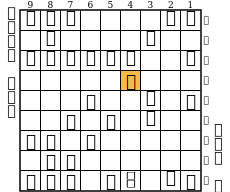

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d
go byoyomi 1000
info currmove 4i5i
info time 0 depth 1 nodes 4 score cp 5076 pv 4i5i
info currmove 4i5i
info currmove 4i5i
info time 1 depth 2 nodes 393 score cp 6331 pv 4i5i 4d4c+
info currmove 4i5i
info time 1 depth 2 nodes 666 score cp 7426 pv 4c5d 6e5d
info currmove 4i5i
info time 15 depth 3 nodes 16516 score cp 3667 pv 4i5i 4d4c+ 3b3a
info currmove 4c5d
info time 25 depth 3 nodes 23765 score cp 3979 pv 4c5d N*2d 3b2b
info currmove 4c5d
info time 39 depth 4 nodes 35421 score cp 7069 pv 4c5d N*2d 3b2b 6e5d
info currmove 4c5d
info time 223 nodes 226926 score cp 7069 pv 4c5d N*2d 3b2b 6e5d
bestmove 4c5d
62手目


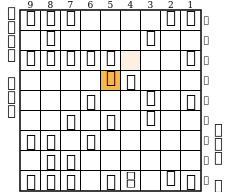

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d
go byoyomi 1000
info currmove N*2d
info time 3 depth 1 nodes 3 score cp -9911 pv N*2d
info time 3 depth 1 nodes 71 score cp -8685 pv 5i4i
info time 3 depth 1 nodes 72 score cp -7426 pv 6e5d
info currmove 6e5d
info time 5 depth 2 nodes 143 score cp -5177 pv 6e5d 5c5d
info currmove N*2d
info time 6 depth 2 nodes 159 score cp -3979 pv N*2d 3b2b
info currmove 6e5d
info time 9 depth 3 nodes 1438 score cp -7476 pv 6e5d 5c5d 5i4i
info currmove N*2d
info time 10 depth 3 nodes 1684 score cp -7069 pv N*2d 3b2b 6e5d
info currmove N*2d
info time 42 depth 4 nodes 24811 score cp -5403 pv N*2d 3b3a 6e5d 4i5i
info currmove N*2d
info time 75 depth 4 nodes 56269 score c

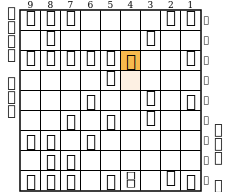

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+
go byoyomi 1000
info currmove 3b4c
info time 0 depth 1 nodes 4 score cp 4146 pv 3b4c
info currmove 3b4c
info currmove 3b4c
info time 0 depth 2 nodes 138 score cp 7636 pv 3b4c 6e5d
info currmove 3b4c
info currmove 3b4c
info time 8 depth 3 nodes 7977 score cp 4191 pv 3b4c N*5e 4c3b
info currmove 3b4c
info currmove 3b4c
info time 15 depth 4 nodes 14205 score cp 7681 pv 3b4c N*5e 4c3b 6e5d
info currmove 3b4c
info time 59 nodes 56223 score cp 7681 pv 3b4c N*5e 4c3b 6e5d
bestmove 3b4c
64手目


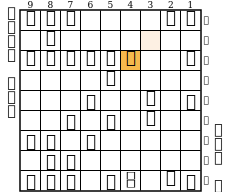

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c
go byoyomi 1000
info currmove N*5e
info time 2 depth 1 nodes 3 score cp -10121 pv N*5e
info time 2 depth 1 nodes 76 score cp -8895 pv 5i4i
info time 2 depth 1 nodes 77 score cp -7636 pv 6e5d
info currmove 6e5d
info time 4 depth 2 nodes 140 score cp -5387 pv 6e5d 5c5d
info currmove N*5e
info time 4 depth 2 nodes 156 score cp -4191 pv N*5e 4c3b
info currmove 6e5d
info time 7 depth 3 nodes 1093 score cp -7748 pv 6e5d 4c5d 5i4i
info currmove N*5e
info time 8 depth 3 nodes 1325 score cp -7681 pv N*5e 4c3b 6e5d
info currmove N*5e
info time 20 depth 4 nodes 11316 score cp -5432 pv N*5e 4c3b 6e5d 5c5d
info currmove N*5e
info time 65 depth 4 nodes 57

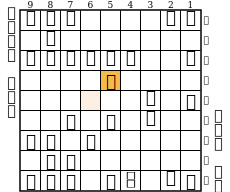

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d
go byoyomi 1000
info currmove 5c5d
info time 0 depth 1 nodes 4 score cp 5387 pv 5c5d
info currmove 5c5d
info currmove 5c5d
info time 0 depth 2 nodes 213 score cp 7676 pv 5c5d 5i4i
info currmove 5c5d
info time 1 depth 2 nodes 415 score cp 7748 pv 4c5d 5i4i
info currmove 4c5d
info time 15 depth 3 nodes 15410 score cp 5384 pv 4c5d 5f5e 5d6e
info currmove 5c5d
info time 29 depth 3 nodes 30663 score cp 5467 pv 5c5d G*4d 4c3b
info currmove 4c5d
info time 65 depth 4 nodes 73555 score cp 7746 pv 4c5d 5f5e 5d6e 5i4i
info currmove 5c5d
info time 99 depth 4 nodes 114168 score cp 7842 pv 5c5d G*4d 4c3b 5i4i
info time 141 nodes 159568 score cp 7842 

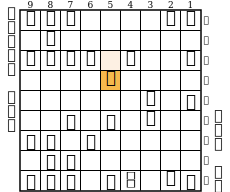

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d
go byoyomi 1000
info currmove 5i4i
info time 1 depth 1 nodes 4 score cp -7676 pv 5i4i
info currmove G*4d
info currmove 5i4i
info time 4 depth 2 nodes 571 score cp -6446 pv 5i4i 8b1b
info currmove G*4d
info time 4 depth 2 nodes 581 score cp -5467 pv G*4d 4c3b
info currmove 5i4i
info time 29 depth 3 nodes 27807 score cp -8162 pv 5i4i R*4g S*5h
info currmove G*4d
info time 29 depth 3 nodes 28072 score cp -7842 pv G*4d 4c3b 5i4i
info currmove G*4d
info time 80 depth 4 nodes 70992 score cp -7629 pv G*4d 4c5b 5i4i 2i1i
info currmove G*4d
info time 200 depth 4 nodes 192619 score cp -6932 pv 5i4i B*4f S*6h 4f1i+
info time 501 nodes 538273 

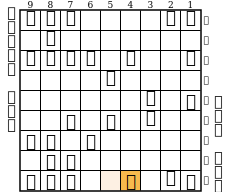

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i
go byoyomi 1000
info currmove 8b1b
info time 9 depth 1 nodes 4 score cp 5377 pv 8b1b
info currmove R*4g
info currmove 8b1b
info time 19 depth 2 nodes 652 score cp 5378 pv 8b1b 1i1h
info currmove R*4g
info time 19 depth 2 nodes 921 score cp 6508 pv R*4g 8h1a+
info time 20 depth 2 nodes 1361 score cp 6519 pv B*4f 7i6i
info time 20 depth 2 nodes 1639 score cp 6612 pv P*4h 4i5h
info currmove 8b1b
info time 49 depth 3 nodes 23361 score cp 3986 pv 8b1b N*2d 2i1i
info currmove P*4h
info time 70 depth 3 nodes 43435 score cp 5037 pv P*4h S*4d 4c3d
info time 90 depth 3 nodes 69914 score cp 5187 pv 2i1i 8h1a+ 4c3b
info time 109 depth 3 n

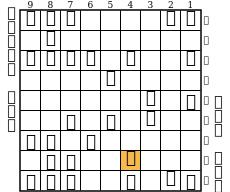

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h
go byoyomi 1000
info currmove 4i5h
info time 20 depth 1 nodes 4 score cp -6612 pv 4i5h
info currmove 4i5h
info currmove 4i5h
info time 40 depth 2 nodes 636 score cp -5191 pv 4i5h 2i1i
info currmove 4i5h
info time 43 depth 2 nodes 3546 score cp -5037 pv S*4d 4c3d
info currmove 4i5h
info time 102 depth 3 nodes 46219 score cp -6557 pv 4i5h R*4i N*6i
info currmove S*4d
info time 103 depth 3 nodes 46857 score cp -6552 pv S*4d 4c3b 4d3e
info currmove S*4d
info time 153 depth 4 nodes 96691 score cp -3607 pv S*4d 4c3d 4d3e 3d3e
info currmove S*4d
info time 501 nodes 474770 score cp -6552 pv S*4d 4c3d 4d3e 3d3e
bestmove S*4d
69手目


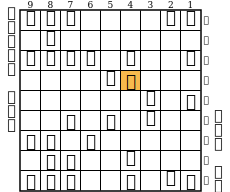

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d
go byoyomi 1000
info currmove 4c3d
info time 0 depth 1 nodes 4 score cp 5037 pv 4c3d
info currmove 4c3b
info currmove 4c3d
info time 1 depth 2 nodes 210 score cp 6542 pv 4c3d 4d3e
info currmove 4c3b
info time 1 depth 2 nodes 404 score cp 6552 pv 4c3b 4d3e
info currmove 4c3d
info time 17 depth 3 nodes 14499 score cp 3607 pv 4c3d 4d3e 3d3e
info currmove 4c3b
info currmove 4c3d
info time 37 depth 4 nodes 35460 score cp 6262 pv 4c3d 4d3e 3d3e 4i5h
info currmove 4c3b
info time 70 depth 4 nodes 71754 score cp 6464 pv 4c3b 4d3e B*5g 7i6i
info time 95 nodes 101899 score cp 6464 pv 4c3b 4d3e B*5g 7i6i
bestmove 4c3b
70手目


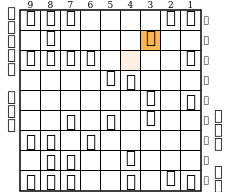

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b
go byoyomi 1000
info currmove 4d3e
info time 13 depth 1 nodes 4 score cp -6552 pv 4d3e
info currmove G*4c
info currmove 4d3e
info time 25 depth 2 nodes 524 score cp -5107 pv 4d3e 4h4i+
info currmove G*4c
info time 25 depth 2 nodes 534 score cp -3075 pv G*4c 3b2b
info time 26 depth 2 nodes 1303 score cp -3040 pv N*2d 3b2b
info currmove 4d3e
info time 63 depth 3 nodes 27775 score cp -6464 pv 4d3e B*5g 7i6i
info currmove N*2d
info currmove 4d3e
info time 134 depth 4 nodes 92336 score cp -5138 pv 4d3e 4h4i+ N*2d 3b3a
info currmove N*2d
info time 501 nodes 451502 score cp -6464 pv 4d3e 4h4i+ N*2d 3b3a
bestmove 4d3e
7

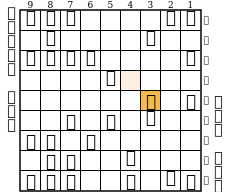

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e
go byoyomi 1000
info time 5 depth 1 nodes 201 score cp 5107 pv 4h4i+
info currmove 4h4i+
info time 11 depth 2 nodes 525 score cp 6328 pv 4h4i+ 8h1a+
info time 11 depth 2 nodes 754 score cp 6464 pv B*5g 7i6i
info currmove 4h4i+
info time 34 depth 3 nodes 20043 score cp 5138 pv 4h4i+ N*2d 3b3a
info currmove B*5g
info currmove 4h4i+
info time 108 depth 4 nodes 103146 score cp 5951 pv 4h4i+ N*2d 3b4b 8h1a+
info currmove B*5g
info time 150 depth 4 nodes 142686 score cp 6905 pv B*5g G*6h 5g6h+ 7h6h
info time 501 nodes 546239 score cp 5138 pv B*5g G*6h 5g6h+ 7h6h
bestmove B*5g
72手目


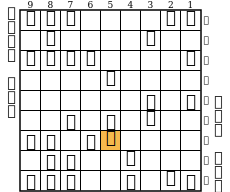

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g
go byoyomi 1000
info currmove 7i6i
info time 0 depth 1 nodes 4 score cp -6464 pv 7i6i
info currmove 7h6h
info currmove 7i6i
info time 1 depth 2 nodes 278 score cp -5019 pv 7i6i 4h4i+
info currmove 7h6h
info time 1 depth 2 nodes 544 score cp -3740 pv 7h6h 5g3e+
info currmove 7i6i
info time 16 depth 3 nodes 13611 score cp -7260 pv 7i6i 4h4i+ 8h1a+
info currmove 7h6h
info time 30 depth 3 nodes 26938 score cp -6608 pv 7h6h 5g6h+ 7i6h
info time 44 depth 3 nodes 40051 score cp -6452 pv G*6h 5g3e+ 4i5h
info currmove 7h6h
info time 76 depth 4 nodes 71472 score cp -5586 pv 7h6h 5g6h+ 7i6h 4h4i+
info currmove G*

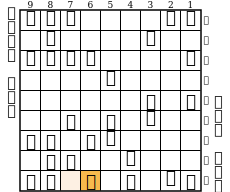

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i
go byoyomi 1000
info currmove 4h4i+
info time 7 depth 1 nodes 4 score cp 5019 pv 4h4i+
info currmove 4h4i+
info currmove 4h4i+
info time 14 depth 2 nodes 465 score cp 7260 pv 4h4i+ 8h1a+
info currmove 4h4i+
info currmove 4h4i+
info time 36 depth 3 nodes 17238 score cp 5050 pv 4h4i+ N*2d 3b3a
info currmove 4h4i+
info currmove 4h4i+
info time 93 depth 4 nodes 61870 score cp 6883 pv 4h4i+ N*2d 3b4b 8h1a+
info currmove 4h4i+
info time 501 nodes 458887 score cp 5050 pv 4h4i+ N*2d 3b4b 8h1a+
bestmove 4h4i+
74手目


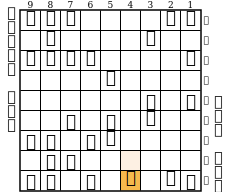

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+
go byoyomi 1000
info currmove 8h1a+
info time 38 depth 1 nodes 4 score cp -7260 pv 8h1a+
info currmove N*2d
info currmove 8h1a+
info time 71 depth 2 nodes 585 score cp -7265 pv 8h1a+ 5g3e+
info currmove N*2d
info time 71 depth 2 nodes 599 score cp -5050 pv N*2d 3b3a
info currmove 8h1a+
info time 105 depth 3 nodes 5211 score mate - pv 8h1a+ G*5i G*4f
info currmove N*2d
info time 105 depth 3 nodes 5741 score cp -6883 pv N*2d 3b4b 8h1a+
info currmove N*2d
info time 153 depth 4 nodes 52675 score cp -5265 pv N*2d 3b3a 8h4d 2i1i
info currmove N*2d
info time 459 depth 4 nodes 380585 score cp -4736 

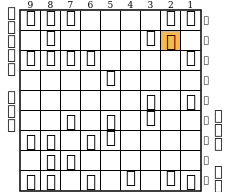

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b
go byoyomi 1000
info currmove 3b4b
info time 0 depth 1 nodes 4 score cp 5080 pv 3b4b
info currmove 3b4b
info currmove 3b4b
info time 0 depth 2 nodes 214 score cp 7330 pv 3b4b 2b2a
info currmove 3b4b
info currmove 3b4b
info time 18 depth 3 nodes 17009 score cp 5113 pv 3b4b N*3d 4b4a
info currmove 3b4b
info time 37 depth 3 nodes 34285 score cp 5115 pv 3b4a N*5c 4a4b
info currmove 3b4b
info time 94 depth 4 nodes 91326 score cp 7363 pv 3b4b N*3d 4b4a 2b2a
info currmove 3b4a
info time 154 depth 4 nodes 139521 score cp 7365 pv 3b4a N*5c 4a4b 2b2a
info time 160 nodes 144543 score cp 7365 pv 3b

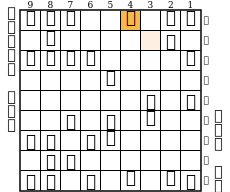

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a
go byoyomi 1000
info currmove G*3a
info time 13 depth 1 nodes 3 score cp -8833 pv G*3a
info time 13 depth 1 nodes 128 score cp -7524 pv 2b1a
info time 13 depth 1 nodes 129 score cp -7328 pv 2b2a
info currmove 2b2a
info time 26 depth 2 nodes 585 score cp -6103 pv 2b2a 5g3e+
info currmove G*3a
info time 26 depth 2 nodes 595 score cp -5150 pv G*3a 4a4b
info time 27 depth 2 nodes 804 score cp -5115 pv N*5c 4a4b
info currmove 2b2a
info time 44 depth 3 nodes 5318 score mate - pv 2b2a G*5i 8h1a+
info currmove N*5c
info time 44 depth 3 nodes 5642 score cp -7365 pv N*5c 4a4b 2b2a
info currm

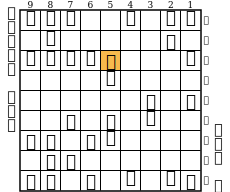

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c
go byoyomi 1000
info currmove 4a4b
info time 0 depth 1 nodes 4 score cp 5115 pv 4a4b
info currmove 4a4b
info currmove 4a4b
info time 0 depth 2 nodes 156 score cp 7365 pv 4a4b 2b2a
info currmove 4a4b
info currmove 4a4b
info time 14 depth 3 nodes 11601 score cp 5999 pv 4a4b G*2f 4b5c
info currmove 4a4b
info currmove 4a4b
info time 57 depth 4 nodes 47497 score cp 8798 pv 4a4b 5c4a+ 4b4a 2b2a
info currmove 4a4b
info time 194 depth 4 nodes 164180 score cp 8799 pv 4a5b 8h7g 5g3e+ 2b2a
info time 272 nodes 227704 score cp 8799 pv 4a5b 8h7g 5g3e+ 2b2a
bestmove 4a5b
78手目


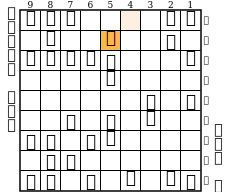

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b
go byoyomi 1000
info currmove 2b2a
info time 1 depth 1 nodes 4 score cp -7359 pv 2b2a
info currmove G*2f
info currmove 2b2a
info time 3 depth 2 nodes 507 score cp -6134 pv 2b2a 5g3e+
info currmove G*2f
info time 3 depth 2 nodes 851 score cp -5999 pv G*2f 5b5c
info currmove 2b2a
info time 27 depth 3 nodes 18166 score mate - pv 2b2a G*5i 3e4d
info currmove G*2f
info time 89 depth 3 nodes 73389 score cp -8812 pv 7h6h 5g3e+ 2b2a
info time 144 depth 3 nodes 120750 score cp -8799 pv 8h7g 5g3e+ 2b2a
info currmove G*2f
info time 153 depth 4 nodes 128638 score mate - pv G*2f G*5i 

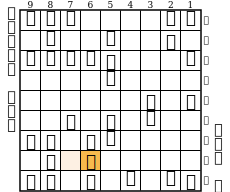

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h
go byoyomi 1000
info time 101 depth 1 nodes 219 score cp 7377 pv 5g3e+
info currmove 5g3e+
info time 102 depth 2 nodes 496 score cp 8812 pv 5g3e+ 2b2a
info currmove 5g3e+
info time 115 depth 3 nodes 12164 score cp 7573 pv 5g3e+ 2b1a 3e5c
info currmove 5g3e+
info currmove 5g3e+
info time 213 depth 4 nodes 98411 score cp 8786 pv 5g3e+ 2b2a 3e6h 6i6h
info currmove 5g3e+
info time 466 depth 4 nodes 358930 score cp 9089 pv R*5i 6i7h 5g6h+ 7h6h
info time 501 nodes 390281 score cp 7573 pv R*5i 6i7h 5g6h+ 7h6h
bestmove R*5i
80手目


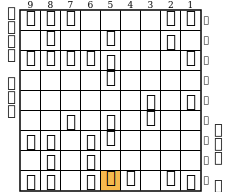

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i
go byoyomi 1000
info currmove 6i7h
info time 0 depth 1 nodes 4 score cp -8717 pv 6i7h
info currmove 6i7h
info currmove 6i7h
info time 1 depth 2 nodes 291 score cp -7272 pv 6i7h 5g3e+
info currmove 6i7h
info currmove 6i7h
info time 12 depth 3 nodes 9585 score cp -8707 pv 6i7h 5g3e+ 2b2a
info currmove 6i7h
info currmove 6i7h
info time 48 depth 4 nodes 44461 score cp -7468 pv 6i7h 5g3e+ 2b1a 3e5c
info currmove 6i7h
info time 48 nodes 44463 score cp -7468 pv 6i7h 5g3e+ 2b1a 3e5c
bestmove 6i7h
81手目


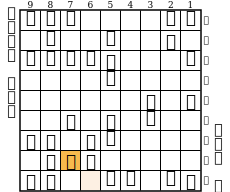

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h
go byoyomi 1000
info currmove 5g6h+
info time 70 depth 1 nodes 3 score cp 5238 pv 5g6h+
info time 70 depth 1 nodes 177 score cp 7272 pv 5g3e+
info currmove 5g3e+
info time 101 depth 2 nodes 414 score cp 8707 pv 5g3e+ 2b2a
info currmove 5g6h+
info currmove 5g3e+
info time 110 depth 3 nodes 9353 score cp 7468 pv 5g3e+ 2b1a 3e5c
info currmove 5g3e+
info currmove 5g3e+
info time 186 depth 4 nodes 71087 score cp 8898 pv 5g3e+ 2b2a 3e6h 7h6h
info currmove 5g3e+
info time 283 depth 4 nodes 151875 score cp 9718 pv 5g6h+ 7h6h 5i8i+ 8h4d
info time 501 nodes 352772 sc

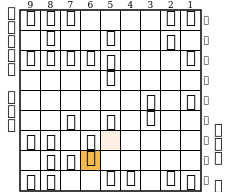

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+
go byoyomi 1000
info currmove 7h6h
info time 0 depth 1 nodes 4 score cp -8093 pv 7h6h
info currmove 7h6h
info currmove 7h6h
info time 0 depth 2 nodes 277 score cp -6851 pv 7h6h 5i8i+
info currmove 7h6h
info currmove 7h6h
info time 16 depth 3 nodes 13494 score cp -9516 pv 7h6h 5i8i+ 8h4d
info currmove 7h6h
info currmove 7h6h
info time 56 depth 4 nodes 56966 score cp -7531 pv 7h6h 5i8i+ G*7i 8i8h
info currmove 7h6h
info time 56 nodes 56968 score cp -7531 pv 7h6h 5i8i+ G*7i 8i8h
bestmove 7h6h
83手目


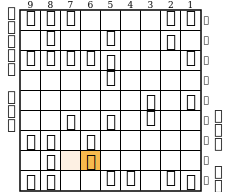

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h
go byoyomi 1000
info currmove 5i8i+
info time 101 depth 1 nodes 3 score cp 5432 pv 5i8i+
info currmove 5i8i+
info time 102 depth 2 nodes 498 score cp 8097 pv 5i8i+ 8h4d
info currmove 5i8i+
info currmove 5i8i+
info time 117 depth 3 nodes 18674 score cp 6327 pv 5i8i+ G*7i 8i8h
info currmove 5i8i+
info currmove 5i8i+
info time 190 depth 4 nodes 75895 score cp 8297 pv 5i8i+ 8h4d P*4c 4d6f
info currmove 5i8i+
info time 501 nodes 338445 score cp 6327 pv 5i8i+ 8h4d P*4c 4d6f
bestmove 5i8i+
84手目


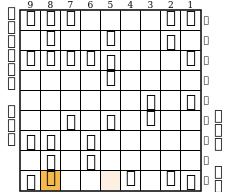

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+
go byoyomi 1000
info currmove 8h4d
info time 48 depth 1 nodes 4 score cp -8080 pv 8h4d
info currmove G*7i
info currmove 8h4d
info time 95 depth 2 nodes 560 score cp -6654 pv 8h4d 2i1i
info currmove G*7i
info time 96 depth 2 nodes 886 score cp -6310 pv G*7i 8i8h
info currmove 8h4d
info time 123 depth 3 nodes 17667 score cp -8280 pv 8h4d P*4c 4d6f
info currmove G*7i
info currmove 8h4d
info time 196 depth 4 nodes 90162 score cp -6650 pv 8h4d 8i5i 6h7h 2i1i
info currmove G*7i
info time 434 depth 4 nodes 354222 score cp -6398 pv B*1f P*2e G*7i 8

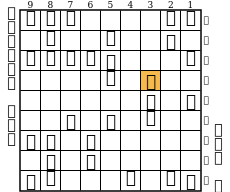

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d
go byoyomi 1000
info time 0 depth 1 nodes 11 score cp 6940 pv 5b5c
info currmove 5b5c
info time 0 depth 2 nodes 176 score cp 9605 pv 5b5c 8h4d
info currmove 5b5c
info time 12 depth 3 nodes 12425 score cp 6131 pv 5b5c 8h4d 5c4b
info currmove 5b5c
info time 25 depth 3 nodes 25898 score cp 6340 pv S*4c G*7i 8i8h
info time 40 depth 3 nodes 39670 score cp 6365 pv N*4c G*7i 8i8h
info time 53 depth 3 nodes 50671 score cp 6395 pv P*4c G*7i 8i8h
info currmove 5b5c
info time 57 depth 4 nodes 53027 score cp 8170 pv 5b5c 8h4d 5c6d 2b2a
info currmo

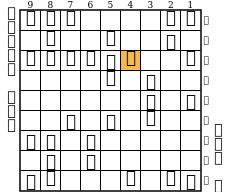

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c
go byoyomi 1000
info currmove G*7i
info time 38 depth 1 nodes 3 score cp -8590 pv G*7i
info time 38 depth 1 nodes 97 score cp -8519 pv 6h7g
info currmove G*7i
info time 71 depth 2 nodes 394 score cp -6340 pv G*7i 8i8h
info currmove 6h7g
info currmove G*7i
info time 108 depth 3 nodes 4963 score cp -9276 pv G*7i 4c3d 7i8i
info currmove 6h7g
info time 121 depth 3 nodes 13785 score cp -9228 pv 8h4d 4c3d 3e3d
info currmove G*7i
info time 152 depth 4 nodes 35032 score cp -8863 pv G*7i 8i8h 7i8h 4c3d
info currmove 8h4d
info time 187 dept

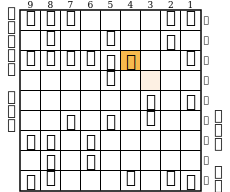

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+
go byoyomi 1000
info currmove 5b4c
info time 0 depth 1 nodes 4 score cp 7095 pv 5b4c
info currmove 5b4c
info currmove 5b4c
info time 1 depth 2 nodes 236 score cp 9760 pv 5b4c 8h4d
info currmove 5b4c
info currmove 5b4c
info time 17 depth 3 nodes 16876 score cp 7116 pv 5b4c 3e4d 4c4b
info currmove 5b4c
info currmove 5b4c
info time 55 depth 4 nodes 46849 score cp 9825 pv 5b4c S*4d 4c4b 6h7g
info currmove 5b4c
info time 90 nodes 80627 score cp 9825 pv 5b4c S*4d 4c4b 6h7g
bestmove 5b4c
88手目


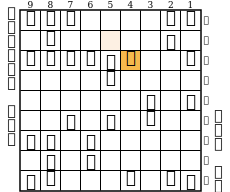

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c
go byoyomi 1000
info currmove 3e4d
info time 61 depth 1 nodes 3 score cp -12235 pv 3e4d
info time 61 depth 1 nodes 140 score cp -9760 pv 8h4d
info currmove 8h4d
info time 101 depth 2 nodes 558 score cp -8334 pv 8h4d 2i1i
info currmove 3e4d
info time 101 depth 2 nodes 568 score cp -7116 pv 3e4d 4c4b
info currmove 8h4d
info time 126 depth 3 nodes 17697 score cp -9930 pv 8h4d N*5b 4d6f
info currmove 3e4d
info time 139 depth 3 nodes 27621 score cp -9825 pv S*4d 4c4b 6h7g
info currmove 3e4d
info time 180 depth 4 nodes 68056 

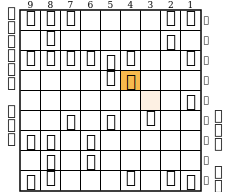

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d
go byoyomi 1000
info currmove 4c4b
info time 0 depth 1 nodes 4 score cp 7116 pv 4c4b
info currmove 4c3d
info currmove 4c4b
info time 0 depth 2 nodes 230 score cp 9780 pv 4c4b 6h7g
info currmove 4c3d
info time 1 depth 2 nodes 450 score cp 10800 pv 4c3d 2b2a
info currmove 4c4b
info time 15 depth 3 nodes 15481 score cp 7173 pv 4c4b S*4c 4b5a
info currmove 4c3d
info currmove 4c4b
info time 80 depth 4 nodes 78777 score cp 9777 pv 4c4b 8h6f 8i5i 6h7h
info currmove 4c3d
info time 164 nodes 155523 score cp 9777 pv 4c4b 8h6

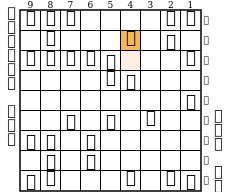

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b
go byoyomi 1000
info time 0 nodes 0 score mate + pv S*4c
bestmove S*4c
91手目


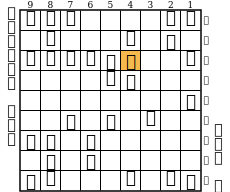

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b S*4c
go byoyomi 1000
info currmove 4b5a
info time 0 depth 1 nodes 4 score cp 7173 pv 4b5a
info currmove 4b5a
info currmove 4b5a
info time 0 depth 2 nodes 166 score cp 10863 pv 4b5a 2b2a
info currmove 4b5a
info currmove 4b5a
info time 9 depth 3 nodes 6072 score mate - pv 4b5a G*6a 8i8h
info currmove 4b5a
info currmove 4b5a
info time 23 depth 4 nodes 21766 score mate - pv 4b5a G*6a 8i8h 6h6i
info time 23 nodes 21768 score mate - pv 4b5a G*6a 8i8h 6h6i
bestmove 4b5a
92手目


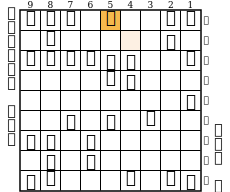

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b S*4c 4b5a
go byoyomi 1000
info time 0 nodes 0 score mate + pv G*6a
bestmove G*6a
93手目


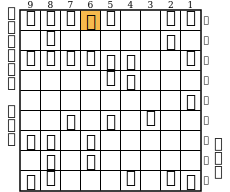

まで93手で先手の勝ち
対局数1 Lesserkai 1.4.2 1勝(100%) Lesserkai 1.4.2 0勝(0%)

対局数1 先手勝ち1(100%) 後手勝ち0(0%) 引き分け0

Lesserkai 1.4.2
勝ち1(100%) 先手勝ち1(100%) 後手勝ち0(0%)

Lesserkai 1.4.2
勝ち0(0%) 先手勝ち0(0%) 後手勝ち0(0%)


In [ ]:
from cshogi import cli

cli.main('/content/LesserkaiSrc/Lesserkai/Lesserkai', '/content/LesserkaiSrc/Lesserkai/Lesserkai')

Lesserkai 1.4.2
isready
readyok
Lesserkai 1.4.2
isready
readyok
開始局面


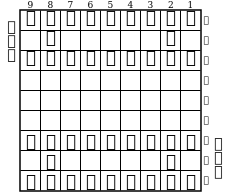

usinewgame
usinewgame
position startpos
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 10 pv 6i7h
info currmove 6i7h
info time 0 depth 2 nodes 126 score cp 0 pv 6i7h 4a3b
info currmove 6i7h
info time 2 depth 3 nodes 2076 score cp 3 pv 6i7h 4a3b 4i5h
info currmove 6i7h
info currmove 6i7h
info time 5 depth 4 nodes 6553 score cp 0 pv 6i7h 4a3b 4i5h 5a4b
info currmove 6i7h
info time 14 nodes 21490 score cp 0 pv 6i7h 4a3b 4i5h 5a4b
bestmove 6i7h
1手目


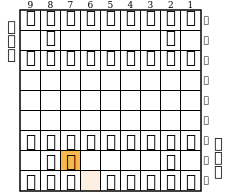

position startpos moves 6i7h
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 0 pv 4a3b
info currmove 4a3b
info time 0 depth 2 nodes 120 score cp -3 pv 4a3b 4i5h
info currmove 4a3b
info time 1 depth 3 nodes 1890 score cp 0 pv 4a3b 4i5h 5a4b
info currmove 4a3b
info currmove 4a3b
info time 3 depth 4 nodes 5981 score cp -3 pv 4a3b 4i5h 5a4b 5i6h
info currmove 4a3b
info time 9 nodes 19606 score cp -3 pv 4a3b 4i5h 5a4b 5i6h
bestmove 4a3b
2手目


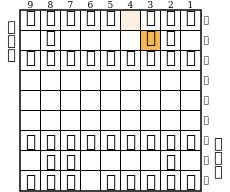

position startpos moves 6i7h 4a3b
go byoyomi 1000
info time 0 depth 1 nodes 30 score cp 3 pv 4i5h
info currmove 4i5h
info time 0 depth 2 nodes 116 score cp 0 pv 4i5h 5a4b
info currmove 4i5h
info time 0 depth 3 nodes 1035 score cp 3 pv 4i5h 5a4b 5i6h
info currmove 4i5h
info currmove 4i5h
info time 2 depth 4 nodes 4768 score cp 0 pv 4i5h 5a4b 5i6h 6a5b
info currmove 4i5h
info time 10 nodes 16080 score cp 0 pv 4i5h 5a4b 5i6h 6a5b
bestmove 4i5h
3手目


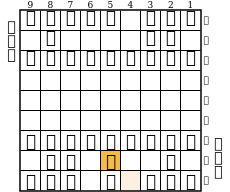

position startpos moves 6i7h 4a3b 4i5h
go byoyomi 1000
info time 0 depth 1 nodes 30 score cp 0 pv 5a4b
info currmove 5a4b
info time 0 depth 2 nodes 110 score cp -3 pv 5a4b 5i6h
info currmove 5a4b
info time 1 depth 3 nodes 942 score cp 0 pv 5a4b 5i6h 6a5b
info currmove 5a4b
info currmove 5a4b
info time 3 depth 4 nodes 4359 score cp -1 pv 5a4b 5i6h 6a5b 1g1f
info currmove 5a4b
info time 7 nodes 14210 score cp -1 pv 5a4b 5i6h 6a5b 1g1f
bestmove 5a4b
4手目


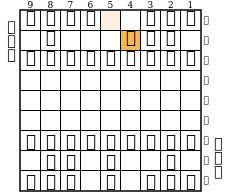

position startpos moves 6i7h 4a3b 4i5h 5a4b
go byoyomi 1000
info time 0 depth 1 nodes 27 score cp 3 pv 5i6h
info currmove 5i6h
info time 0 depth 2 nodes 104 score cp 0 pv 5i6h 6a5b
info currmove 5i6h
info time 0 depth 3 nodes 800 score cp 1 pv 5i6h 6a5b 1g1f
info currmove 5i6h
info currmove 5i6h
info time 2 depth 4 nodes 3880 score cp 0 pv 5i6h 6a5b 1g1f 1c1d
info currmove 5i6h
info time 7 nodes 12026 score cp 0 pv 5i6h 6a5b 1g1f 1c1d
bestmove 5i6h
5手目


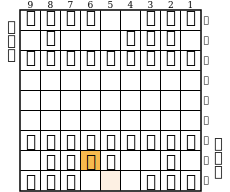

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h
go byoyomi 1000
info time 0 depth 1 nodes 27 score cp 0 pv 6a5b
info currmove 6a5b
info time 1 depth 2 nodes 96 score cp -1 pv 6a5b 1g1f
info currmove 6a5b
info time 1 depth 3 nodes 696 score cp 0 pv 6a5b 1g1f 1c1d
info currmove 6a5b
info currmove 6a5b
info time 3 depth 4 nodes 4407 score cp -3 pv 6a5b 6g6f 3c3d 5h6g
info currmove 6a5b
info time 6 depth 4 nodes 10503 score cp -2 pv 3c3d 1g1f 6a5b 1f1e
info time 8 nodes 17142 score cp -2 pv 3c3d 1g1f 6a5b 1f1e
bestmove 3c3d
6手目


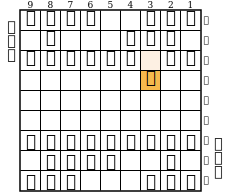

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d
go byoyomi 1000
info currmove 1g1f
info time 0 depth 1 nodes 4 score cp 3 pv 1g1f
info currmove 1g1f
info currmove 1g1f
info time 0 depth 2 nodes 113 score cp 0 pv 1g1f 6a5b
info currmove 1g1f
info currmove 1g1f
info time 1 depth 3 nodes 1596 score cp 2 pv 1g1f 6a5b 1f1e
info currmove 1g1f
info currmove 1g1f
info time 4 depth 4 nodes 5067 score cp 0 pv 1g1f 6a5b 1f1e 3d3e
info currmove 1g1f
info time 8 nodes 12010 score cp 0 pv 1g1f 6a5b 1f1e 3d3e
bestmove 1g1f
7手目


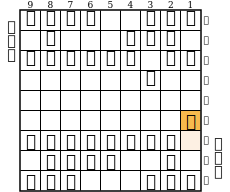

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f
go byoyomi 1000
info currmove 6a5b
info time 0 depth 1 nodes 3 score cp 0 pv 6a5b
info currmove 6a5b
info time 0 depth 2 nodes 119 score cp -2 pv 6a5b 1f1e
info currmove 6a5b
info currmove 6a5b
info time 1 depth 3 nodes 970 score cp 0 pv 6a5b 1f1e 3d3e
info currmove 6a5b
info currmove 6a5b
info time 3 depth 4 nodes 4579 score cp -1 pv 6a5b 1f1e 3d3e 2g2f
info currmove 6a5b
info time 12 nodes 18066 score cp -1 pv 6a5b 1f1e 3d3e 2g2f
bestmove 6a5b
8手目


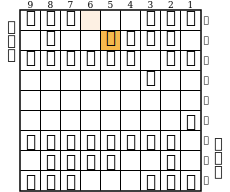

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b
go byoyomi 1000
info currmove 1f1e
info time 0 depth 1 nodes 4 score cp 2 pv 1f1e
info currmove 1f1e
info currmove 1f1e
info time 0 depth 2 nodes 110 score cp 0 pv 1f1e 3d3e
info currmove 1f1e
info currmove 1f1e
info time 1 depth 3 nodes 898 score cp 1 pv 1f1e 3d3e 2g2f
info currmove 1f1e
info currmove 1f1e
info time 4 depth 4 nodes 5361 score cp -2 pv 1f1e 2b3c 2g2f 3a2b
info currmove 1f1e
info time 25 nodes 32687 score cp -2 pv 1f1e 2b3c 2g2f 3a2b
bestmove 1f1e
9手目


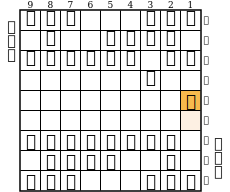

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e
go byoyomi 1000
info time 0 depth 1 nodes 32 score cp 0 pv 3d3e
info currmove 3d3e
info time 0 depth 2 nodes 105 score cp -1 pv 3d3e 2g2f
info currmove 3d3e
info time 1 depth 3 nodes 927 score cp 0 pv 3d3e 2g2f 2c2d
info currmove 3d3e
info time 2 depth 3 nodes 1743 score cp 1 pv 4c4d 2g2f 5b4c
info time 3 depth 3 nodes 2851 score cp 2 pv 2b3c 2g2f 3a2b
info currmove 3d3e
info time 4 depth 4 nodes 5359 score cp -2 pv 3d3e 2g2f 2c2d 2f2e
info currmove 2b3c
info time 8 depth 4 nodes 7089 score cp 0 pv 2b3c 2g2f 3a2b 2f2e
info time 15 nodes 16555 score cp 0 pv 2b3c 2g2f 3a2b 2f2e
bestmove 2b3c
10手目


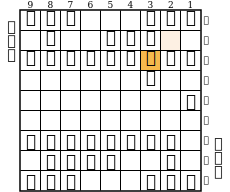

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c
go byoyomi 1000
info currmove 2g2f
info time 0 depth 1 nodes 4 score cp 3 pv 2g2f
info currmove 2g2f
info currmove 2g2f
info time 0 depth 2 nodes 112 score cp -2 pv 2g2f 3a2b
info currmove 2g2f
info currmove 2g2f
info time 1 depth 3 nodes 928 score cp 0 pv 2g2f 3a2b 2f2e
info currmove 2g2f
info currmove 2g2f
info time 4 depth 4 nodes 4244 score cp -2 pv 2g2f 3a2b 2f2e 3d3e
info currmove 2g2f
info time 11 nodes 13360 score cp -2 pv 2g2f 3a2b 2f2e 3d3e
bestmove 2g2f
11手目


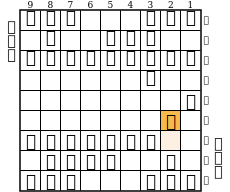

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 2 pv 3a2b
info currmove 3a2b
info time 1 depth 2 nodes 109 score cp 0 pv 3a2b 2f2e
info currmove 3a2b
info time 2 depth 3 nodes 1023 score cp 2 pv 3a2b 2f2e 3d3e
info currmove 3a2b
info currmove 3a2b
info time 4 depth 4 nodes 4594 score cp 1 pv 3a2b 2f2e 3d3e 4g4f
info currmove 3a2b
info time 14 nodes 15507 score cp 1 pv 3a2b 2f2e 3d3e 4g4f
bestmove 3a2b
12手目


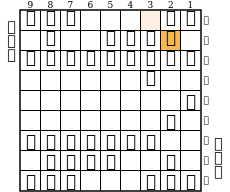

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b
go byoyomi 1000
info currmove 2f2e
info time 0 depth 1 nodes 4 score cp 0 pv 2f2e
info currmove 2f2e
info currmove 2f2e
info time 0 depth 2 nodes 112 score cp -2 pv 2f2e 3d3e
info currmove 2f2e
info currmove 2f2e
info time 1 depth 3 nodes 931 score cp -1 pv 2f2e 3d3e 4g4f
info currmove 2f2e
info currmove 2f2e
info time 5 depth 4 nodes 5994 score cp -4 pv 2f2e 3c4d 2e2d 2c2d
info currmove 2f2e
info time 22 nodes 26928 score cp -4 pv 2f2e 3c4d 2e2d 2c2d
bestmove 2f2e
13手目


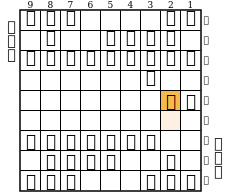

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e
go byoyomi 1000
info currmove 3d3e
info time 0 depth 1 nodes 4 score cp 2 pv 3d3e
info currmove 3d3e
info currmove 3d3e
info time 0 depth 2 nodes 112 score cp 1 pv 3d3e 4g4f
info currmove 3d3e
info currmove 3d3e
info time 1 depth 3 nodes 959 score cp 2 pv 3d3e 4g4f 4c4d
info currmove 3d3e
info time 2 depth 3 nodes 1758 score cp 3 pv 4c4d 3g3f 5b4c
info time 3 depth 3 nodes 2964 score cp 4 pv 3c4d 2e2d 2c2d
info currmove 3d3e
info time 6 depth 4 nodes 6335 score cp 1 pv 3d3e 4g4f 4c4d 5g5f
info currmove 3c4d
info time 13 nodes 17569 score cp 1 pv 3d3e 4g4f 4c4d 5g5f
bestmove 3d3e
14手目


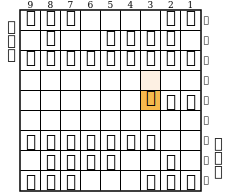

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e
go byoyomi 1000
info currmove 4g4f
info time 0 depth 1 nodes 4 score cp -1 pv 4g4f
info currmove 4g4f
info currmove 4g4f
info time 0 depth 2 nodes 113 score cp -2 pv 4g4f 4c4d
info currmove 4g4f
info currmove 4g4f
info time 1 depth 3 nodes 903 score cp -1 pv 4g4f 4c4d 5g5f
info currmove 4g4f
info currmove 4g4f
info time 4 depth 4 nodes 4819 score cp -4 pv 4g4f 4c4d 5g5f 5b4c
info currmove 4g4f
info time 18 nodes 22720 score cp -4 pv 4g4f 4c4d 5g5f 5b4c
bestmove 4g4f
15手目


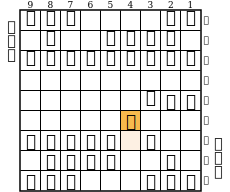

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f
go byoyomi 1000
info currmove 4c4d
info time 0 depth 1 nodes 4 score cp 2 pv 4c4d
info currmove 4c4d
info currmove 4c4d
info time 0 depth 2 nodes 113 score cp 1 pv 4c4d 5g5f
info currmove 4c4d
info currmove 4c4d
info time 1 depth 3 nodes 946 score cp 4 pv 4c4d 5g5f 5b4c
info currmove 4c4d
info currmove 4c4d
info time 4 depth 4 nodes 4792 score cp 1 pv 4c4d 6g6f 5b4c 5h6g
info currmove 4c4d
info time 8 depth 4 nodes 9258 score cp 4 pv 3c5e 2h2f 2b3c 4f4e
info time 15 nodes 17212 score cp 4 pv 3c5e 2h2f 2b3c 4f4e
bestmove 3c5e
16手目


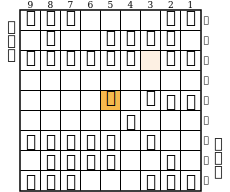

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e
go byoyomi 1000
info currmove 4f4e
info time 0 depth 1 nodes 4 score cp 1 pv 4f4e
info currmove 4f4e
info currmove 4f4e
info time 0 depth 2 nodes 124 score cp -4 pv 4f4e 2b3c
info currmove 4f4e
info currmove 4f4e
info time 3 depth 3 nodes 2750 score cp -192 pv 4f4e 2a3c 2e2d
info currmove 4f4e
info time 5 depth 3 nodes 3698 score cp -4 pv 2h2f 2b3c 4f4e
info currmove 4f4e
info time 12 depth 4 nodes 8435 score cp -3 pv 4f4e 2b3c 5g5f 5e4f
info currmove 2h2f
info time 21 nodes 20596 score cp -3 pv 4f4e 2b3c 5g5f 5e4f
bestmove 4f4e
17手目


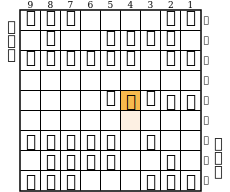

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e
go byoyomi 1000
info time 0 depth 1 nodes 39 score cp 0 pv 4c4d
info time 0 depth 1 nodes 41 score cp 4 pv 2b3c
info currmove 2b3c
info time 1 depth 2 nodes 119 score cp 3 pv 2b3c 5g5f
info time 1 depth 2 nodes 212 score cp 192 pv 2a3c 2e2d
info currmove 2a3c
info time 2 depth 3 nodes 1230 score cp -2 pv 2a3c 5g5f 5e4f
info currmove 2b3c
info time 3 depth 3 nodes 2092 score cp 3 pv 2b3c 5g5f 5e4f
info currmove 2a3c
info time 10 depth 4 nodes 7354 score cp 195 pv 2a3c 2e2d 3c4e 3i3h
info currmove 2b3c
info time 34 depth 4 nodes 31468 score cp 1289 pv 3e3f 2h2f 3f3g+ 2e2d
info time 34 nodes 31468 score cp 1289 pv 3e3f 2h2f 3f3g+ 2e2d
bestmove 3e3f
18手目


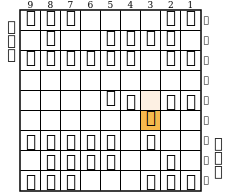

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f
go byoyomi 1000
info currmove 5h4g
info time 0 depth 1 nodes 4 score cp -24 pv 5h4g
info currmove 5g5f
info time 0 depth 1 nodes 35 score cp -11 pv 2h3h
info currmove 2h3h
info time 1 depth 2 nodes 126 score cp -11 pv 2h3h 3f3g
info currmove 5g5f
info time 1 depth 2 nodes 200 score cp 195 pv 5g5f 5e4f
info currmove 2h3h
info time 3 depth 3 nodes 1881 score cp -1301 pv 2h3h 3f3g+ 3h1h
info currmove 5g5f
info time 5 depth 3 nodes 3381 score cp -1289 pv 2h2f 3f3g+ 2e2d
info currmove 5g5f
info time 10 depth 4 nodes 8133 score cp -415 pv 5g5f 5e3g+ 2h1h 3g4f
info currmove 2h2f
info time 31 nodes 26253 score cp -415 pv 5g5f 5e3g+ 2h1h 3g4f
bestmove 5g5f
19手目


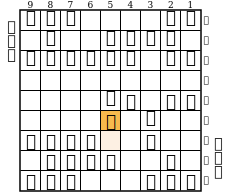

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f
go byoyomi 1000
info currmove 5e4f
info time 0 depth 1 nodes 3 score cp -195 pv 5e4f
info currmove 5e4f
info time 0 depth 2 nodes 89 score cp 1317 pv 5e4f 6h6i
info currmove 5e4f
info currmove 5e4f
info time 1 depth 3 nodes 425 score cp -182 pv 5e4f 5h5g 4f6d
info currmove 5e4f
info time 2 depth 3 nodes 1351 score cp 415 pv 5e3g+ 2h1h 3g4f
info currmove 5e3g+
info time 5 depth 4 nodes 5238 score cp 622 pv 5e3g+ 2h1h 3g4f 6h6i
info currmove 5e4f
info time 8 depth 4 nodes 7286 score cp 1483 pv 5e4f 6h6i 3f3g+ 2h2f
info time 46 nodes 44577 score cp 1483 pv 5e4f 6h6i 3f3g+ 2h2f
bestmove 5e4f
20手目


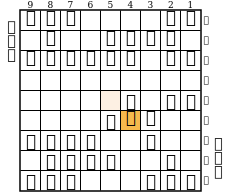

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f
go byoyomi 1000
info currmove 5h5g
info time 0 depth 1 nodes 3 score cp -1328 pv 5h5g
info time 0 depth 1 nodes 9 score cp -1317 pv 6h6i
info currmove 5h5g
info time 0 depth 2 nodes 86 score cp 182 pv 5h5g 4f6d
info currmove 6h6i
info currmove 5h5g
info time 2 depth 3 nodes 1123 score cp -1313 pv 5h5g 3f3g+ 2h2f
info currmove 6h6i
info time 3 depth 3 nodes 2121 score cp -1302 pv 6h6i 3f3g+ 2h2f
info currmove 5h5g
info time 8 depth 4 nodes 5898 score cp -1313 pv 5h5g 3f3g+ 2h2f 4f6d
info currmove 6h6i
info time 15 depth 4 nodes 10123 score cp -1312 pv 6h6i 3f3g+ 2h2f P*3f
info time 16 nodes 11134 score cp -1312 pv 6h6i 3f3g+ 2h2f P*3f
bestmove 6h6i
21手目


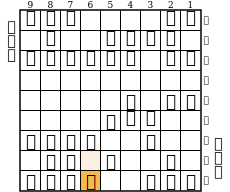

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i
go byoyomi 1000
info currmove 3f3g+
info time 0 depth 1 nodes 4 score cp 1302 pv 3f3g+
info currmove 3f3g+
info currmove 3f3g+
info time 1 depth 2 nodes 131 score cp 1302 pv 3f3g+ 2h2f
info currmove 3f3g+
info currmove 3f3g+
info time 2 depth 3 nodes 1296 score cp 1312 pv 3f3g+ 2h2f P*3f
info currmove 3f3g+
info currmove 3f3g+
info time 11 depth 4 nodes 7126 score cp 2057 pv 3f3g+ 2h1h P*3h 3i4h
info currmove 3f3g+
info time 38 nodes 35963 score cp 2057 pv 3f3g+ 2h1h P*3h 3i4h
bestmove 3f3g+
22手目


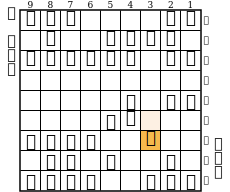

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+
go byoyomi 1000
info time 0 depth 1 nodes 32 score cp -1302 pv 2h2f
info currmove 2h2f
info time 0 depth 2 nodes 146 score cp -1312 pv 2h2f P*3f
info currmove 2h2f
info time 3 depth 3 nodes 1719 score cp -2457 pv 2h2f 3g4g 2f1f
info currmove 2h2f
info time 5 depth 3 nodes 2847 score cp -2057 pv 2h1h P*3h 3i4h
info currmove 2h2f
info time 13 depth 4 nodes 9104 score cp -1396 pv 2h2f 4f7i+ 8h7i S*3f
info currmove 2h1h
info time 46 nodes 36540 score cp -1396 pv 2h2f 4f7i+ 8h7i S*3f
bestmove 2h2f
23手目


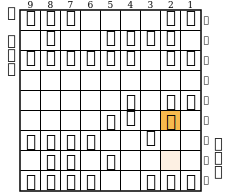

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f
go byoyomi 1000
info currmove 3g4g
info time 1 depth 1 nodes 4 score cp -3 pv 3g4g
info currmove P*3f
info time 1 depth 1 nodes 5 score cp 1312 pv P*3f
info currmove 3g4g
info time 1 depth 2 nodes 153 score cp 2457 pv 3g4g 2f1f
info currmove P*3f
info currmove 3g4g
info time 3 depth 3 nodes 1567 score cp 75 pv 3g4g 2f1f 4g5h
info currmove P*3f
info time 4 depth 3 nodes 2313 score cp 1316 pv P*3f 6g6f 2b3c
info time 5 depth 3 nodes 2990 score cp 1396 pv 4f7i+ 8h7i S*3f
info currmove 4f7i+
info time 25 depth 4 nodes 16178 score cp 1843 pv 4f7i+ 8h7i P*3h 3i4h
info currmove 3g4g
info time 29 depth 4 nodes 19802 score cp 2682 pv 3g4g 5h4g 4f1i+ 2e2d
info time 95 nodes 84493 score cp 2682 pv 3g4g 5h4g 4f1i+ 2e2d
bestmove 3g4g
24手目


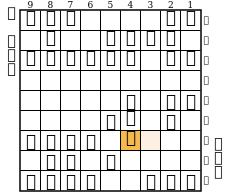

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g
go byoyomi 1000
info currmove 2f1f
info time 0 depth 1 nodes 4 score cp -2457 pv 2f1f
info currmove 2f1f
info currmove 2f1f
info time 0 depth 2 nodes 157 score cp -75 pv 2f1f 4g5h
info currmove 2f1f
info currmove 2f1f
info time 2 depth 3 nodes 1505 score cp -3563 pv 2f1f 4g5h 6i5h
info currmove 2f1f
info time 3 depth 3 nodes 3300 score cp -2670 pv 5h4g 4f1i+ 2e2d
info currmove 5h4g
info time 11 depth 4 nodes 12468 score cp -2817 pv 5h4g 4f1i+ 2e2d L*1h
info currmove 2f1f
info time 21 depth 4 nodes 19218 score cp -2754 pv 5h5i 4f1i+ 5i4i P*3h
info time 36 nodes 34225 score cp -2754 pv 5h5i 4f1i+ 5i4i P*3h
bestmove 5h5i
25手目


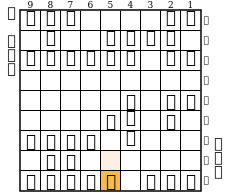

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i
go byoyomi 1000
info currmove 4f1i+
info time 1 depth 1 nodes 4 score cp 2754 pv 4f1i+
info currmove 4f1i+
info currmove 4f1i+
info time 1 depth 2 nodes 145 score cp 2742 pv 4f1i+ 2e2d
info currmove 4f1i+
info currmove 4f1i+
info time 4 depth 3 nodes 2918 score cp 2754 pv 4f1i+ 5i4i P*3h
info currmove 4f1i+
info currmove 4f1i+
info time 14 depth 4 nodes 11217 score cp 2959 pv 4f1i+ 2i1g 1i1h 2f1f
info currmove 4f1i+
info time 58 depth 4 nodes 45970 score cp 3674 pv P*3g 2f3f 3g3h+ 3f3b+
info time 80 nodes 66765 score cp 3674 pv P*3g 2f3f 3g3h+ 3f3b+
bestmove P*3g
26手目


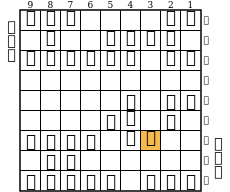

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g
go byoyomi 1000
info currmove 5i4i
info time 0 depth 1 nodes 3 score cp -1315 pv 5i4i
info currmove 5i4i
info time 1 depth 2 nodes 130 score cp -1840 pv 5i4i 3g3h+
info currmove 5i4i
info time 2 depth 2 nodes 940 score cp -1455 pv 2f2g 4f5g+
info currmove 5i4i
info time 3 depth 3 nodes 2052 score cp -3831 pv 5i4i 3g3h+ 6i5i
info currmove 2f2g
info time 6 depth 3 nodes 4426 score cp -2983 pv 2f4f 4g4f 4e4d
info currmove 2f4f
info time 14 depth 4 nodes 10619 score cp -3391 pv 2f4f 4g4f 4e4d R*2g
info currmove 2f2g
info time 20 depth 4 nodes 15143 score cp -2833 pv 2f2g 3g3h+ 2g4g 4f1i+
info time 34 nodes 26246 score cp -2833 pv 2f2g 3g3h+ 2g4g 4f1i+
bestmove 2f2g
27手目


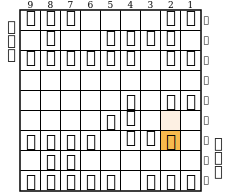

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g
go byoyomi 1000
info currmove 3g3h+
info time 1 depth 1 nodes 3 score cp 1110 pv 3g3h+
info time 1 depth 1 nodes 49 score cp 1455 pv 4f5g+
info currmove 3g3h+
info time 1 depth 2 nodes 129 score cp 4460 pv 3g3h+ 2g2f
info currmove 4f5g+
info currmove 3g3h+
info time 4 depth 3 nodes 2164 score cp 2833 pv 3g3h+ 2g4g 4f1i+
info currmove 4f5g+
info currmove 3g3h+
info time 9 depth 4 nodes 7158 score cp 4375 pv 3g3h+ 2g4g 4f7i+ 8h7i
info currmove 3g3h+
info time 40 nodes 33950 score cp 4375 pv 3g3h+ 2g4g 4f7i+ 8h7i
bestmove 3g3h+
28手目


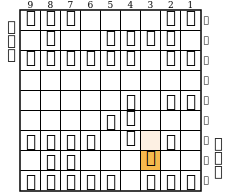

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+
go byoyomi 1000
info time 0 depth 1 nodes 31 score cp -4212 pv 2g4g
info currmove 2g4g
info time 1 depth 2 nodes 146 score cp -2471 pv 2g4g 4f1i+
info currmove 2g4g
info time 3 depth 3 nodes 1953 score cp -4354 pv 2g4g 4f7i+ 8h7i
info currmove 2g4g
info currmove 2g4g
info time 10 depth 4 nodes 9134 score cp -4356 pv 2g4g 4f7i+ 8h7i 3h3i
info currmove 2g4g
info time 33 nodes 28759 score cp -4356 pv 2g4g 4f7i+ 8h7i 3h3i
bestmove 2g4g
29手目


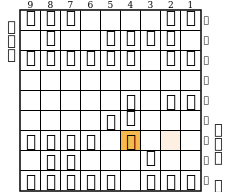

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g
go byoyomi 1000
info currmove 4f1i+
info time 0 depth 1 nodes 4 score cp 1246 pv 4f1i+
info currmove 4f7i+
info currmove 4f1i+
info time 1 depth 2 nodes 167 score cp 2478 pv 4f1i+ 3i3h
info currmove 4f7i+
info time 1 depth 2 nodes 179 score cp 2776 pv 4f7i+ 8h7i
info currmove 4f1i+
info time 3 depth 3 nodes 2734 score cp 2326 pv 4f1i+ P*3c 3h3i
info currmove 4f7i+
info time 4 depth 3 nodes 3117 score cp 2770 pv 4f7i+ 8h7i 3h3i
info currmove 4f7i+
info time 16 depth 4 nodes 12334 score cp 3370 pv 4f7i+ 8h7i 3h2i 5i4i
info currmove 4f7i+
info time 66 nodes 65949 score cp 3370 pv 4f7i+ 8h7i 3h2i 5i4i
bestmove 4f7i+
30手目


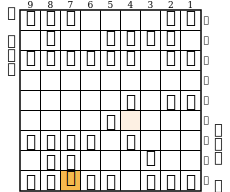

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+
go byoyomi 1000
info currmove 8h7i
info time 0 depth 1 nodes 4 score cp -2579 pv 8h7i
info currmove 8h7i
info currmove 8h7i
info time 1 depth 2 nodes 149 score cp -2574 pv 8h7i 3h3i
info currmove 8h7i
info currmove 8h7i
info time 7 depth 3 nodes 5130 score cp -3175 pv 8h7i 3h2i 5i4i
info currmove 8h7i
info currmove 8h7i
info time 19 depth 4 nodes 15946 score cp -2814 pv 8h7i 3h3i P*3c 4b3c
info currmove 8h7i
info time 34 depth 4 nodes 33649 score cp -2810 pv 6i7i 3h3i P*3c 2b3c
info time 38 nodes 37475 score cp -2810 pv 6i7i 3h3i P*3c 2b3c
bestmove 6i7i
31手目


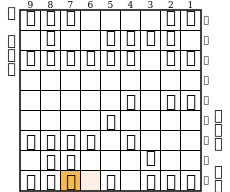

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i
go byoyomi 1000
info currmove 3h3i
info time 0 depth 1 nodes 4 score cp 1500 pv 3h3i
info currmove 3h2i
info currmove 3h3i
info time 0 depth 2 nodes 279 score cp 1500 pv 3h3i 2i3g
info currmove 3h2i
info time 1 depth 2 nodes 425 score cp 2115 pv 3h2i 5i4i
info currmove 3h3i
info time 9 depth 3 nodes 9248 score cp 1505 pv 3h3i 2i3g 2b3c
info currmove 3h2i
info currmove 3h3i
info time 28 depth 4 nodes 31683 score cp 1530 pv 3h3i 2i1g S*2f B*4h
info currmove 3h2i
info time 67 depth 4 nodes 60156 score cp 2114 pv 3h2i 3i3h 2i1i 5i5h
info time 158 nodes 161122 score cp 2114 pv 3h2i 3i3h 2i1i 5i5h
bestmove 3h2i
32手目


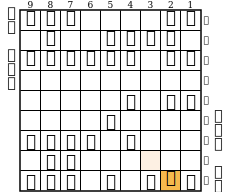

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i
go byoyomi 1000
info currmove P*3c
info time 0 depth 1 nodes 3 score cp -2935 pv P*3c
info time 0 depth 1 nodes 86 score cp -2120 pv 3i3h
info time 0 depth 1 nodes 88 score cp -2115 pv 5i4i
info currmove 5i4i
info time 1 depth 2 nodes 333 score cp -2124 pv 5i4i 2i1i
info currmove P*3c
info time 1 depth 2 nodes 511 score cp -1110 pv P*3c 2b3c
info currmove 5i4i
info time 12 depth 3 nodes 13331 score cp -2720 pv 5i4i 2i3i 4i3i
info currmove P*3c
info time 19 depth 3 nodes 18821 score cp -2330 pv P*3c 2b3c 5i4i
info time 24 depth 3 nodes 25136 score cp -2114 pv 3i3h 2i1i 5i5h
info currmove 3i3h
info time 44 depth 4 nodes 53242 score cp -2101 pv 3i3h 2i1i 4g1g L*1h
info currmove P*3c
info time 214 depth 4 nodes 268352 score cp -2004 pv 7g7f 2i3i B*6f 3i2i
info time 264 nodes 333402 score cp -2004 pv 7g7f 2

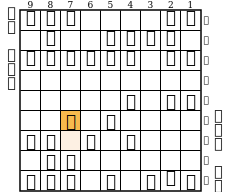

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f
go byoyomi 1000
info currmove 2i3i
info time 0 depth 1 nodes 3 score cp 2934 pv 2i3i
info currmove 2i3i
info time 0 depth 2 nodes 336 score cp 2919 pv 2i3i 5i5h
info currmove 2i3i
info currmove 2i3i
info time 13 depth 3 nodes 13767 score cp 2004 pv 2i3i B*6f 3i2i
info currmove 2i3i
info currmove 2i3i
info time 98 depth 4 nodes 97482 score cp 3019 pv 2i3i 4g4f 2a3c B*1f
info currmove 2i3i
info time 350 nodes 319983 score cp 3019 pv 2i3i 4g4f 2a3c B*1f
bestmove 2i3i
34手目


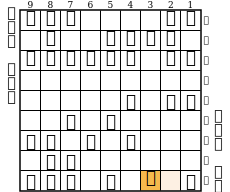

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i
go byoyomi 1000
info currmove B*6f
info time 0 depth 1 nodes 3 score cp -3024 pv B*6f
info time 1 depth 1 nodes 96 score cp -2934 pv 4g3g
info time 1 depth 1 nodes 104 score cp -2919 pv 5i5h
info currmove B*6f
info time 2 depth 2 nodes 341 score cp -2004 pv B*6f 3i2i
info currmove 5i5h
info currmove B*6f
info time 7 depth 3 nodes 4550 score cp -3164 pv B*6f S*3f 4g4f
info currmove 5i5h
info time 16 depth 3 nodes 11376 score cp -3059 pv 5i5h S*3f 4g4f
info time 38 depth 3 nodes 28342 score cp -3019 pv 4g4f 2a3c B*1f
info currmove B*6f
info time 93 depth 4 nodes 76543 score cp -2964 pv B*6f S*3h 4g4h 2b3c
info currmove 4g4f
info time 211 depth 4 nodes 204413 score cp -2927 pv 4e4d 2b3c 4g3g 3i2i
info time 496 nodes 532028 score cp -2927 pv 4e4d 2b3c 4g3g 3i2i
bestmove 4e4d
35手目


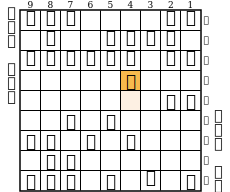

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d
go byoyomi 1000
info currmove 4c4d
info time 1 depth 1 nodes 4 score cp 2938 pv 4c4d
info currmove S*3f
info currmove 4c4d
info time 1 depth 2 nodes 352 score cp 2932 pv 4c4d 4g4d
info currmove S*3f
info time 2 depth 2 nodes 498 score cp 3062 pv S*3f 4g4f
info currmove 4c4d
info time 20 depth 3 nodes 22103 score cp 2933 pv 4c4d 4g4d 4b3c
info currmove S*3f
info currmove 4c4d
info time 35 depth 4 nodes 37070 score cp 2927 pv 4c4d 4g4d P*4c 4d3d
info currmove S*3f
info time 58 depth 4 nodes 57215 score cp 3064 pv S*3f 4d4c 3b4c 4g4f
info time 129 nodes 111398 score cp 3064 pv S*3f 4d4c 3b4c 4g4f
bestmove S*3f
36手目


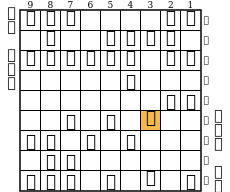

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f
go byoyomi 1000
info currmove 4d4c
info time 13 depth 1 nodes 3 score cp -6957 pv 4d4c
info time 13 depth 1 nodes 89 score cp -3062 pv 4g4f
info currmove 4g4f
info time 26 depth 2 nodes 360 score cp -3067 pv 4g4f 3f3g+
info currmove 4d4c
info time 26 depth 2 nodes 372 score cp -2862 pv 4d4c 5b4c
info currmove 4g4f
info time 50 depth 3 nodes 9858 score cp -3052 pv 4g4f 3f3g+ 5i5h
info currmove 4d4c
info currmove 4g4f
info time 88 depth 4 nodes 34622 score cp -3067 pv 4g4f 3f3g+ 4d4c 5b4c
info currmove 4d4c
info time 354 nodes 297091 score cp -3067 pv 4g4f 3f3g+ 4d4c 5b4c
bestmove 4g4f
37手目


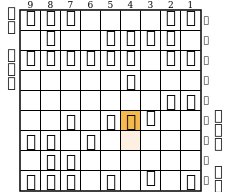

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f
go byoyomi 1000
info currmove S*4g
info time 0 depth 1 nodes 4 score cp 2797 pv S*4g
info currmove S*2h
info time 1 depth 1 nodes 124 score cp 3065 pv 3f2e
info time 1 depth 1 nodes 128 score cp 3067 pv 3f3g+
info currmove 3f3g+
info time 1 depth 2 nodes 354 score cp 3052 pv 3f3g+ 5i5h
info currmove S*2h
info currmove 3f3g+
info time 8 depth 3 nodes 7100 score cp 3067 pv 3f3g+ 4d4c 5b4c
info currmove 3f3g+
info currmove 3f3g+
info time 30 depth 4 nodes 26786 score cp 3052 pv 3f3g+ 4d4c 5b4c 5i5h
info currmove 3f3g+
info time 214 depth 4 nodes 170761 score cp 3055 pv 3i2i 1i1f 3f3g+ 5i5h
info time 501 nodes 403990 score cp 3067 pv 3i2i 1i1f 3f3g+ 5i5h
bestmove 3i2i
38手目


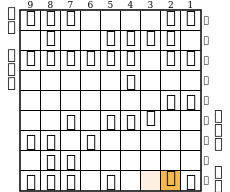

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i
go byoyomi 1000
info currmove 4d4c
info time 14 depth 1 nodes 4 score cp -3882 pv 4d4c
info currmove 4d4c+
info time 14 depth 1 nodes 5 score cp -2872 pv 4d4c+
info currmove 4d4c
info time 27 depth 2 nodes 159 score cp -807 pv 4d4c 5b4c
info currmove 4d4c+
info currmove 4d4c
info time 47 depth 3 nodes 7212 score cp -3062 pv 4d4c 5b4c 4f4i
info currmove 4d4c+
info time 59 depth 3 nodes 17276 score cp -3055 pv 1i1f 3f3g+ 5i5h
info currmove 4d4c
info time 94 depth 4 nodes 37621 score cp -1831 pv 4d4c 5b4c P*4d 2i1i
info currmove 1i1f
info time 176 depth 4 nodes 129031 score cp -1024 pv P*3c 2b3c 4d4c 3b4c
info time 321 nodes 299024 score cp -1024 pv P*3c 2b3c 4d4c 3b4c
bestmove P*3c
39手目


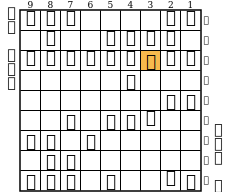

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c
go byoyomi 1000
info currmove 3b3c
info time 0 depth 1 nodes 3 score cp 1004 pv 3b3c
info time 0 depth 1 nodes 121 score cp 1018 pv 4b3c
info time 0 depth 1 nodes 123 score cp 1831 pv 2i1i
info currmove 3b3c
info time 1 depth 2 nodes 338 score cp 3069 pv 3b3c 4d4c+
info currmove 2i1i
info time 2 depth 2 nodes 662 score cp 3083 pv 4b3c 4d4c+
info time 3 depth 2 nodes 1599 score cp 3087 pv 2b3c 4d4c+
info time 4 depth 2 nodes 1975 score cp 3111 pv 3f4g+ 4f4g
info currmove 2i1i
info time 27 depth 3 nodes 15264 score cp -203 pv 2i1i 3c3b+ 4b3b
info currmove 3f4g+
info time 34 depth 3 nodes 21984 score cp 1004 pv 3b3c 4d4c+ 5b4c
info time 42 depth 3 nodes 29780 score cp 1024 pv 2b3c 4d4c+ 3b4c
info currmove 2b3c
info time 54 depth 4 nodes 38059 score cp 3279 pv 2b3c 4d4c+ 

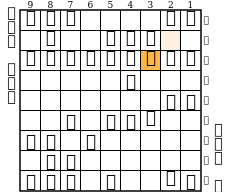

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c
go byoyomi 1000
info currmove 4d4c
info time 14 depth 1 nodes 3 score cp -4097 pv 4d4c
info time 15 depth 1 nodes 81 score cp -3331 pv 4f3f
info time 15 depth 1 nodes 83 score cp -3278 pv 1i1h
info time 15 depth 1 nodes 86 score cp -3087 pv 4d4c+
info currmove 4d4c
info time 27 depth 2 nodes 148 score cp -1024 pv 4d4c 3b4c
info currmove 4d4c+
info currmove 4d4c
info time 42 depth 3 nodes 1149 score cp -3279 pv 4d4c 3b4c 4f4i
info currmove 4d4c+
info currmove 4d4c
info time 90 depth 4 nodes 31762 score cp -2048 pv 4d4c 3b4c P*4d 2i1i
info currmove 4d4c
info time 240 nodes 214958 score cp -2048 pv 4d4c 3b4c P*4d 2i1i
bestmove 4d4c
41手目


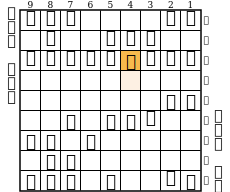

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c
go byoyomi 1000
info currmove 3b4c
info time 0 depth 1 nodes 4 score cp 1024 pv 3b4c
info currmove 3b4c
info currmove 3b4c
info time 0 depth 2 nodes 177 score cp 3279 pv 3b4c 4f4i
info currmove 3b4c
info currmove 3b4c
info time 10 depth 3 nodes 8771 score cp 2048 pv 3b4c P*4d 2i1i
info currmove 3b4c
info currmove 3b4c
info time 104 depth 4 nodes 91178 score cp 3285 pv 3b4c 1i1h 3f2g+ 4f4h
info currmove 3b4c
info time 241 nodes 196861 score cp 3285 pv 3b4c 1i1h 3f2g+ 4f4h
bestmove 3b4c
42手目


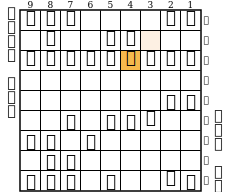

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c
go byoyomi 1000
info currmove P*4d
info time 23 depth 1 nodes 4 score cp -4294 pv P*4d
info currmove 4f4i
info time 23 depth 1 nodes 5 score cp -3279 pv 4f4i
info currmove P*4d
info time 46 depth 2 nodes 398 score cp -2048 pv P*4d 2i1i
info currmove 4f4i
info currmove P*4d
info time 81 depth 3 nodes 9140 score cp -3328 pv P*4d 3f4g+ 4f4g
info currmove 4f4i
info time 96 depth 3 nodes 20114 score cp -3285 pv 1i1h 3f2g+ 4f4h
info currmove 1i1h
info time 168 depth 4 nodes 83161 score cp -3285 pv 1i1h 3f3g 4f3f 3g2h+
info currmove P*4d
info time 199 depth 4 nodes 112140 score cp -2283 pv P*4d 4c4d 8h4d 3c4d
info time 501 nodes 447925 score cp -3285 pv P*4d 4c4d 8h4d 3c4d
bestmove P*4d
43手目


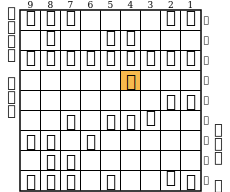

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d
go byoyomi 1000
info currmove 2i1i
info time 0 depth 1 nodes 4 score cp 2048 pv 2i1i
info currmove 3f4g+
info currmove 2i1i
info time 0 depth 2 nodes 368 score cp 2058 pv 2i1i 4d4c
info currmove 3f4g+
info time 1 depth 2 nodes 500 score cp 3328 pv 3f4g+ 4f4g
info currmove 2i1i
info time 8 depth 3 nodes 9224 score cp 8 pv 2i1i 4d4c 5b4c
info currmove 3f4g+
info time 15 depth 3 nodes 16490 score cp 1027 pv 3f2e 4d4c 5b4c
info time 21 depth 3 nodes 23140 score cp 2461 pv 4c4d 2e2d 2i1i
info currmove 4c4d
info time 66 depth 4 nodes 56968 score cp 2791 pv 4c4d 8h4d 3c4d 4f4d
info currmove 3f4g+
info time 189 depth 4 nodes 142435 score cp 3365 pv 4c3d 1i1h 3f2g+ B*3f
info time 487 nodes 361629 score cp 3365 pv 4c3d 1i1h 3f2g+ B*3f
bestmove 4c3d
44手目


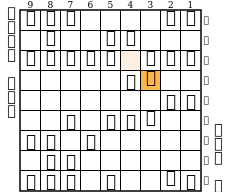

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d
go byoyomi 1000
info currmove 2e2d
info time 11 depth 1 nodes 4 score cp -4282 pv 2e2d
info currmove 4f4i
info time 11 depth 1 nodes 5 score cp -3269 pv 4f4i
info currmove 2e2d
info time 22 depth 2 nodes 371 score cp -2241 pv 2e2d 2i1i
info currmove 4f4i
info currmove 2e2d
info time 50 depth 3 nodes 14627 score cp -4232 pv 2e2d N*4g 5i5h
info currmove 4f4i
info time 65 depth 3 nodes 26491 score cp -3787 pv 4f3f S*2g 3f2f
info time 76 depth 3 nodes 34612 score cp -3365 pv 1i1h 3f2g+ B*3f
info currmove 1i1h
info time 126 depth 4 nodes 83222 score cp -3365 pv 1i1h 3f2g+ B*3f 2g2f
info currmove 2e2d
info time 176 depth 4 nodes 128237 score cp -2986 pv 2e2d 3d3e 4f4i 2i1i
info time 399 nodes 374640 score cp -2986 pv 2e2d 3d3e 4f4i 2i1i
bestmove 2e2

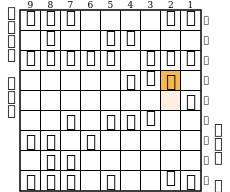

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d
go byoyomi 1000
info currmove N*4g
info time 0 depth 1 nodes 3 score cp 967 pv N*4g
info time 0 depth 1 nodes 137 score cp 1223 pv 2c2d
info time 0 depth 1 nodes 139 score cp 2241 pv 2i1i
info currmove 2i1i
info time 1 depth 2 nodes 369 score cp 3001 pv 2i1i 2d2c+
info currmove N*4g
info time 2 depth 2 nodes 494 score cp 4232 pv N*4g 5i5h
info currmove 2i1i
info time 22 depth 3 nodes 14990 score cp 2466 pv 2i1i 2d2c+ 3f3g+
info currmove N*4g
info time 28 depth 3 nodes 22157 score cp 2552 pv 2c2d B*1h 2i1i
info time 36 depth 3 nodes 30773 score cp 2986 pv 3d3e 4f4i 2i1i
info currmove 3d3e
info time 89 depth 4 nodes 73104 score cp 4042 pv 3d3e 4f4h N*4g 4h4i
info currmove N*4g
info time 501 nodes 373336 score cp 2986 pv 3d3e 4f4h N*4g 4h4i


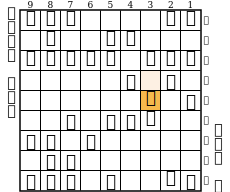

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e
go byoyomi 1000
info currmove 4f4i
info time 13 depth 1 nodes 4 score cp -3257 pv 4f4i
info currmove 4f4i
info currmove 4f4i
info time 28 depth 2 nodes 380 score cp -2986 pv 4f4i 2i1i
info currmove 4f4i
info currmove 4f4i
info time 54 depth 3 nodes 9139 score cp -4247 pv 4f4i N*3g 4i4h
info currmove 4f4i
info time 65 depth 3 nodes 17736 score cp -4042 pv 4f4h N*4g 4h4i
info currmove 4f4i
info time 120 depth 4 nodes 58283 score cp -3238 pv 4f4i N*3g 4i4h 2c2d
info currmove 4f4h
info time 326 nodes 264477 score cp -3238 pv 4f4i N*3g 4i4h 2c2d
bestmove 4f4i
47手目


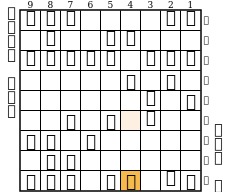

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i
go byoyomi 1000
info time 0 depth 1 nodes 138 score cp 1968 pv 2c2d
info time 0 depth 1 nodes 139 score cp 2986 pv 2i1i
info currmove 2i1i
info time 0 depth 2 nodes 368 score cp 3001 pv 2i1i 2d2c+
info time 1 depth 2 nodes 630 score cp 3045 pv 2c2d 4i2i
info time 1 depth 2 nodes 759 score cp 4247 pv N*3g 4i4h
info currmove 2i1i
info time 9 depth 3 nodes 9481 score cp 2256 pv 2i1i 2d2c+ 1i1h
info currmove N*3g
info time 13 depth 3 nodes 14020 score cp 3238 pv N*3g 4i4h 2c2d
info currmove N*3g
info time 53 depth 4 nodes 46481 score cp 3542 pv N*3g 4i4h S*4g 4h1h
info currmove N*3g
info time 162 depth 4 nodes 133086 score cp 4351 pv S*3h 4i4h N*4g 5i5h
info time 501 nodes 386048 score cp 3238 pv S*3h 4i4h N*4g 5i5h
bestmove S*3h
48

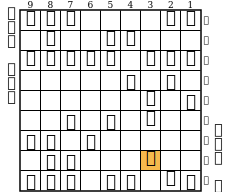

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h
go byoyomi 1000
info currmove 2d2c+
info time 15 depth 1 nodes 4 score cp -3752 pv 2d2c+
info currmove 4i4h
info currmove 2d2c+
info time 29 depth 2 nodes 316 score cp -3762 pv 2d2c+ 3h4i+
info currmove 4i4h
info time 29 depth 2 nodes 494 score cp -2181 pv 4i4h 2i1i
info currmove 2d2c+
info time 56 depth 3 nodes 12494 score cp -6077 pv 2d2c+ 3h4i+ 5i4i
info currmove 4i4h
info time 65 depth 3 nodes 19049 score cp -4172 pv 4i4h N*4g 5i5h
info currmove 4i4h
info time 111 depth 4 nodes 52068 score cp -3423 pv 4i4h 3f3g+ 4h5h 2c2d
info currmove 4i4h
info time 121 depth 4 nodes 61218 score cp -3018 pv 2d2c+ 3h4i+ 2c3c 4b3c
info time 252 nodes 193612 score cp -3018 pv 2d2c+ 3h4i+ 2c3c 4b3c
bestmove 2d2c+
49手目


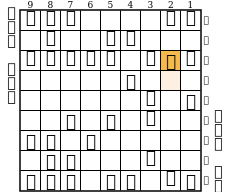

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+
go byoyomi 1000
info currmove 3h4i+
info time 0 depth 1 nodes 4 score cp 3762 pv 3h4i+
info currmove 3h4i+
info currmove 3h4i+
info time 1 depth 2 nodes 336 score cp 6059 pv 3h4i+ 5i4i
info currmove 3h4i+
info currmove 3h4i+
info time 9 depth 3 nodes 8045 score cp 3018 pv 3h4i+ 2c3c 4b3c
info currmove 3h4i+
info currmove 3h4i+
info time 36 depth 4 nodes 30986 score cp 5361 pv 3h4i+ 2c3c 4b3c 5i4i
info currmove 3h4i+
info time 188 nodes 146343 score cp 5361 pv 3h4i+ 2c3c 4b3c 5i4i
bestmove 3h4i+
50手目


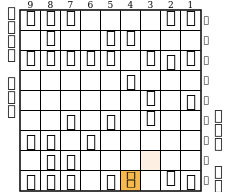

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+
go byoyomi 1000
info currmove 5i4i
info time 17 depth 1 nodes 4 score cp -6051 pv 5i4i
info currmove 2c3c
info currmove 5i4i
info time 34 depth 2 nodes 393 score cp -5308 pv 5i4i 2i1i
info currmove 2c3c
info time 34 depth 2 nodes 407 score cp -3018 pv 2c3c 4b3c
info currmove 5i4i
info time 70 depth 3 nodes 14640 score cp -6227 pv 5i4i P*4h 4i5h
info currmove 2c3c
info time 71 depth 3 nodes 15421 score cp -5361 pv 2c3c 4b3c 5i4i
info currmove 2c3c
info time 120 depth 4 nodes 45895 score cp -3231 pv 2c3c 4b3c 4d4c+ 3c4c
info currmove 2c3c
info time 351 nodes 266544 score cp -3231 pv 2c3c 4b3c 4d4c+ 3c4c
bestmove 2c3c
51手目


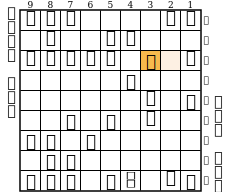

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c
go byoyomi 1000
info currmove 4b3c
info time 0 depth 1 nodes 4 score cp 3018 pv 4b3c
info currmove 4b3c
info currmove 4b3c
info time 1 depth 2 nodes 229 score cp 5361 pv 4b3c 5i4i
info currmove 4b3c
info currmove 4b3c
info time 10 depth 3 nodes 11098 score cp 3231 pv 4b3c 4d4c+ 3c4c
info currmove 4b3c
info currmove 4b3c
info time 55 depth 4 nodes 55502 score cp 5574 pv 4b3c 4d4c+ 3c4c 5i4i
info currmove 4b3c
info time 117 nodes 111946 score cp 5574 pv 4b3c 4d4c+ 3c4c 5i4i
bestmove 4b3c
52手目


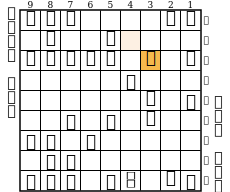

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c
go byoyomi 1000
info currmove 5i4i
info time 44 depth 1 nodes 4 score cp -5307 pv 5i4i
info currmove 4d4c+
info currmove 5i4i
info time 86 depth 2 nodes 480 score cp -5309 pv 5i4i 2i1i
info currmove 4d4c+
info time 86 depth 2 nodes 492 score cp -3231 pv 4d4c+ 3c4c
info currmove 5i4i
info time 118 depth 3 nodes 16841 score cp -5793 pv 5i4i R*4g S*5h
info currmove 4d4c+
info time 119 depth 3 nodes 17549 score cp -5574 pv 4d4c+ 3c4c 5i4i
info currmove 4d4c+
info time 141 depth 4 nodes 41241 score cp -3091 pv 4d4c+ 3c4c S*4d 4c3d
info currmove 4d4c+
info time 495 nodes 436810 score cp -3091 pv 4d4c+ 3c4c S*4d 4c3d
bestmove 4d4c+
53手目


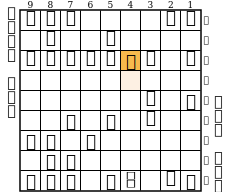

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+
go byoyomi 1000
info currmove 3c4c
info time 0 depth 1 nodes 4 score cp 3231 pv 3c4c
info currmove 3c4c
info currmove 3c4c
info time 1 depth 2 nodes 254 score cp 5574 pv 3c4c 5i4i
info currmove 3c4c
info currmove 3c4c
info time 11 depth 3 nodes 12772 score cp 3231 pv 3c4c P*4d 4c3b
info currmove 3c4c
info currmove 3c4c
info time 58 depth 4 nodes 58885 score cp 5546 pv 3c4c S*4d 4c3b 4d3e
info currmove 3c4c
info time 117 nodes 106357 score cp 5546 pv 3c4c S*4d 4c3b 4d3e
bestmove 3c4c
54手目


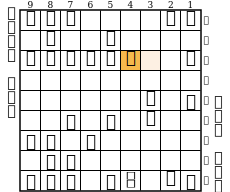

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c
go byoyomi 1000
info currmove 5i4i
info time 31 depth 1 nodes 4 score cp -5520 pv 5i4i
info currmove S*4d
info currmove 5i4i
info time 59 depth 2 nodes 507 score cp -4290 pv 5i4i 2a3c
info currmove S*4d
info time 59 depth 2 nodes 519 score cp -3291 pv S*4d 4c3d
info time 60 depth 2 nodes 791 score cp -3231 pv P*4d 4c3b
info currmove 5i4i
info time 105 depth 3 nodes 18352 score cp -6006 pv 5i4i R*4g S*5h
info currmove P*4d
info time 106 depth 3 nodes 19057 score cp -5574 pv P*4d 4c3b 5i4i
info time 123 depth 3 nodes 35724 score cp -5546 pv S*4d 4c3b 4d3e
info currmove S*4d
info time 156 depth 4 nodes 67489 score cp -3301 pv S*4d 4c3b P*3c 2a3c
info currmove P*4d
info time 501 nodes 476963 sco

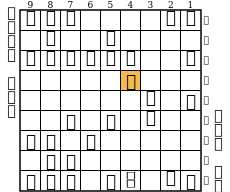

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d
go byoyomi 1000
info currmove 4c3d
info time 1 depth 1 nodes 4 score cp 3291 pv 4c3d
info currmove 4c3b
info currmove 4c3d
info time 1 depth 2 nodes 173 score cp 5536 pv 4c3d 4d3e
info currmove 4c3b
info time 1 depth 2 nodes 326 score cp 5546 pv 4c3b 4d3e
info currmove 4c3d
info time 9 depth 3 nodes 8248 score cp 2881 pv 4c3d 4d3e 3d3e
info currmove 4c3b
info time 18 depth 3 nodes 15927 score cp 3301 pv 4c3b P*3c 2a3c
info currmove 4c3b
info time 78 depth 4 nodes 69249 score cp 5327 pv 4c3b 4d3e 4i5i 8h1a+
info currmove 4c3b
info time 113 nodes 101471 score cp 5327 pv 4c3b 4d3e 4i5i 8h1a+
bestmove 4c3b
56手目


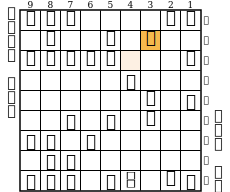

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b
go byoyomi 1000
info currmove 4d3e
info time 20 depth 1 nodes 4 score cp -5546 pv 4d3e
info currmove P*3c
info currmove 4d3e
info time 38 depth 2 nodes 417 score cp -4106 pv 4d3e 4i5i
info currmove P*3c
info time 38 depth 2 nodes 433 score cp -3301 pv P*3c 2a3c
info currmove 4d3e
info time 75 depth 3 nodes 17661 score cp -5327 pv 4d3e 4i5i 8h1a+
info currmove P*3c
info currmove 4d3e
info time 135 depth 4 nodes 69041 score cp -4167 pv 4d3e 4i5i G*2b 3b4b
info currmove P*3c
info time 346 depth 4 nodes 280479 score cp -3987 pv B*6e 3b2c 4d3e 4i5i
info time 411 nodes 348030 score cp -3987 pv B*6e 3b2c 4d3e 4i5i
bestmove B*6e
57手目


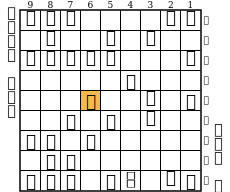

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e
go byoyomi 1000
info currmove N*4c
info time 0 depth 1 nodes 4 score cp 3356 pv N*4c
info currmove N*4c
info currmove N*4c
info time 0 depth 2 nodes 115 score cp 5601 pv N*4c 4d3e
info currmove N*4c
info time 1 depth 2 nodes 223 score cp 5644 pv 3b2b 4d3e
info currmove 3b2b
info time 6 depth 3 nodes 5112 score cp 934 pv 3b2b 4d3e 2a3c
info currmove N*4c
info time 10 depth 3 nodes 8088 score cp 3566 pv N*4c P*3c 2a3c
info time 22 depth 3 nodes 18546 score cp 3987 pv 3b2c 4d3e 4i5i
info currmove 3b2b
info time 31 depth 4 nodes 26855 score cp 3296 pv 3b2b 4d3e 2a3c 5i4i
info currmove 3b2c
info time 49 depth 4 nodes 45474 score cp 5217 pv 3b2c 4d3e 4i5i 6e2a+
info time 69 depth 4 

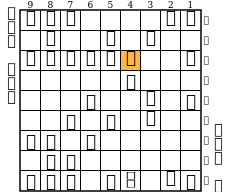

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c
go byoyomi 1000
info currmove P*3c
info time 25 depth 1 nodes 3 score cp -8056 pv P*3c
info time 25 depth 1 nodes 59 score cp -5645 pv 5i4i
info time 25 depth 1 nodes 66 score cp -5601 pv 4d3e
info currmove 4d3e
info time 52 depth 2 nodes 267 score cp -4161 pv 4d3e 4i5i
info currmove P*3c
info time 52 depth 2 nodes 283 score cp -3566 pv P*3c 2a3c
info currmove 4d3e
info time 88 depth 3 nodes 8314 score cp -6202 pv 4d3e 4i5i 8h1a+
info currmove P*3c
info time 88 depth 3 nodes 8590 score cp -5811 pv P*3c 2a3c 4d3e
info time 96 depth 3 nodes 16819 score cp -5703 pv 5i4i P*4h 4d3e
info currmove 5i4i
info time 143 depth 4 nodes 45913 score cp -4102 pv 5i4i 3e4f 4d4c 5b4c
info 

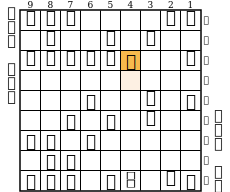

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c
go byoyomi 1000
info currmove 5b4c
info time 0 depth 1 nodes 4 score cp 3946 pv 5b4c
info currmove 5b4c
info currmove 5b4c
info time 0 depth 2 nodes 163 score cp 6217 pv 5b4c 5i4i
info currmove 5b4c
info currmove 5b4c
info time 10 depth 3 nodes 8218 score cp 3977 pv 5b4c N*2d 3b4b
info currmove 5b4c
info currmove 5b4c
info time 32 depth 4 nodes 33241 score cp 6321 pv 5b4c N*2d 3b4b 5i4i
info currmove 5b4c
info time 65 nodes 63628 score cp 6321 pv 5b4c N*2d 3b4b 5i4i
bestmove 5b4c
60手目


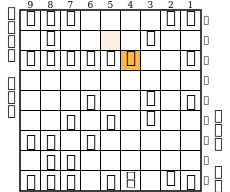

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c
go byoyomi 1000
info currmove N*2d
info time 44 depth 1 nodes 3 score cp -8691 pv N*2d
info time 44 depth 1 nodes 97 score cp -6235 pv 5i4i
info currmove 5i4i
info time 83 depth 2 nodes 421 score cp -5005 pv 5i4i 2a3c
info currmove N*2d
info time 83 depth 2 nodes 433 score cp -3977 pv N*2d 3b4b
info currmove 5i4i
info time 115 depth 3 nodes 16910 score cp -6721 pv 5i4i R*4g S*5h
info currmove N*2d
info time 115 depth 3 nodes 17186 score cp -6321 pv N*2d 3b4b 5i4i
info currmove N*2d
info time 129 depth 4 nodes 31261 score cp -4617 pv N*2d 3b4b 6e4c+ 4b4c
info currmove N*2d
info time 287 depth 4 nodes 186775 score cp -4445 pv 6e4c+ 3b4c G*4d 4c3b
info time 315 dep

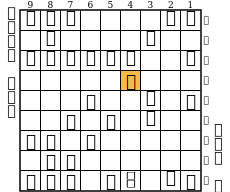

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d
go byoyomi 1000
info currmove 4i5i
info time 0 depth 1 nodes 4 score cp 5076 pv 4i5i
info currmove 4i5i
info currmove 4i5i
info time 2 depth 2 nodes 393 score cp 6331 pv 4i5i 4d4c+
info currmove 4i5i
info time 2 depth 2 nodes 666 score cp 7426 pv 4c5d 6e5d
info currmove 4i5i
info time 17 depth 3 nodes 16516 score cp 3667 pv 4i5i 4d4c+ 3b3a
info currmove 4c5d
info time 24 depth 3 nodes 23765 score cp 3979 pv 4c5d N*2d 3b2b
info currmove 4c5d
info time 40 depth 4 nodes 35421 score cp 7069 pv 4c5d N*2d 3b2b 6e5d
info currmove 4c5d
info time 234 nodes 226926 score cp 7069 pv 4c5d N*2d 3b2b 6e5d
bestmove 4c5d
62手目


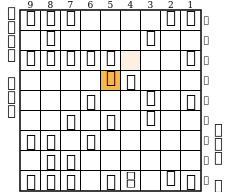

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d
go byoyomi 1000
info currmove N*2d
info time 3 depth 1 nodes 3 score cp -9911 pv N*2d
info time 3 depth 1 nodes 71 score cp -8685 pv 5i4i
info time 3 depth 1 nodes 72 score cp -7426 pv 6e5d
info currmove 6e5d
info time 9 depth 2 nodes 143 score cp -5177 pv 6e5d 5c5d
info currmove N*2d
info time 9 depth 2 nodes 159 score cp -3979 pv N*2d 3b2b
info currmove 6e5d
info time 15 depth 3 nodes 1438 score cp -7476 pv 6e5d 5c5d 5i4i
info currmove N*2d
info time 17 depth 3 nodes 1684 score cp -7069 pv N*2d 3b2b 6e5d
info currmove N*2d
info time 46 depth 4 nodes 24811 score cp -5403 pv N*2d 3b3a 6e5d 4i5i
info currmove N*2d
info time 77 depth 4 nodes 56269 score 

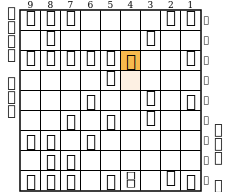

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+
go byoyomi 1000
info currmove 3b4c
info time 0 depth 1 nodes 4 score cp 4146 pv 3b4c
info currmove 3b4c
info currmove 3b4c
info time 0 depth 2 nodes 138 score cp 7636 pv 3b4c 6e5d
info currmove 3b4c
info currmove 3b4c
info time 9 depth 3 nodes 7977 score cp 4191 pv 3b4c N*5e 4c3b
info currmove 3b4c
info currmove 3b4c
info time 15 depth 4 nodes 14205 score cp 7681 pv 3b4c N*5e 4c3b 6e5d
info currmove 3b4c
info time 59 nodes 56223 score cp 7681 pv 3b4c N*5e 4c3b 6e5d
bestmove 3b4c
64手目


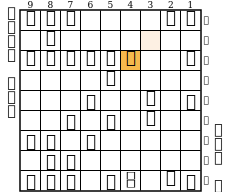

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c
go byoyomi 1000
info currmove N*5e
info time 2 depth 1 nodes 3 score cp -10121 pv N*5e
info time 2 depth 1 nodes 76 score cp -8895 pv 5i4i
info time 2 depth 1 nodes 77 score cp -7636 pv 6e5d
info currmove 6e5d
info time 5 depth 2 nodes 140 score cp -5387 pv 6e5d 5c5d
info currmove N*5e
info time 5 depth 2 nodes 156 score cp -4191 pv N*5e 4c3b
info currmove 6e5d
info time 12 depth 3 nodes 1093 score cp -7748 pv 6e5d 4c5d 5i4i
info currmove N*5e
info time 13 depth 3 nodes 1325 score cp -7681 pv N*5e 4c3b 6e5d
info currmove N*5e
info time 26 depth 4 nodes 11316 score cp -5432 pv N*5e 4c3b 6e5d 5c5d
info currmove N*5e
info time 68 depth 4 nodes 

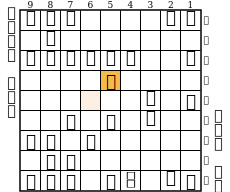

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d
go byoyomi 1000
info currmove 5c5d
info time 0 depth 1 nodes 4 score cp 5387 pv 5c5d
info currmove 5c5d
info currmove 5c5d
info time 1 depth 2 nodes 213 score cp 7676 pv 5c5d 5i4i
info currmove 5c5d
info time 1 depth 2 nodes 415 score cp 7748 pv 4c5d 5i4i
info currmove 4c5d
info time 15 depth 3 nodes 15410 score cp 5384 pv 4c5d 5f5e 5d6e
info currmove 5c5d
info time 31 depth 3 nodes 30663 score cp 5467 pv 5c5d G*4d 4c3b
info currmove 4c5d
info time 70 depth 4 nodes 73555 score cp 7746 pv 4c5d 5f5e 5d6e 5i4i
info currmove 5c5d
info time 104 depth 4 nodes 114168 score cp 7842 pv 5c5d G*4d 4c3b 5i4i
info time 145 nodes 159568 score cp 7842

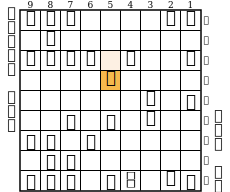

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d
go byoyomi 1000
info currmove 5i4i
info time 2 depth 1 nodes 4 score cp -7676 pv 5i4i
info currmove G*4d
info currmove 5i4i
info time 5 depth 2 nodes 571 score cp -6446 pv 5i4i 8b1b
info currmove G*4d
info time 5 depth 2 nodes 581 score cp -5467 pv G*4d 4c3b
info currmove 5i4i
info time 30 depth 3 nodes 28020 score cp -8162 pv 5i4i R*4g S*5h
info currmove G*4d
info time 31 depth 3 nodes 28285 score cp -7842 pv G*4d 4c3b 5i4i
info currmove G*4d
info time 74 depth 4 nodes 71204 score cp -7629 pv G*4d 4c5b 5i4i 2i1i
info currmove G*4d
info time 188 depth 4 nodes 193046 score cp -6932 pv 5i4i B*4f S*6h 4f1i+
info time 501 nodes 553035 

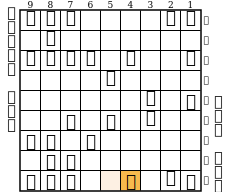

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i
go byoyomi 1000
info currmove 8b1b
info time 10 depth 1 nodes 4 score cp 5377 pv 8b1b
info currmove R*4g
info currmove 8b1b
info time 19 depth 2 nodes 652 score cp 5378 pv 8b1b 1i1h
info currmove R*4g
info time 20 depth 2 nodes 921 score cp 6508 pv R*4g 8h1a+
info time 20 depth 2 nodes 1361 score cp 6519 pv B*4f 7i6i
info time 21 depth 2 nodes 1639 score cp 6612 pv P*4h 4i5h
info currmove 8b1b
info time 51 depth 3 nodes 23361 score cp 3986 pv 8b1b N*2d 2i1i
info currmove P*4h
info time 70 depth 3 nodes 43435 score cp 5037 pv P*4h S*4d 4c3d
info time 92 depth 3 nodes 69914 score cp 5187 pv 2i1i 8h1a+ 4c3b
info time 113 depth 3 

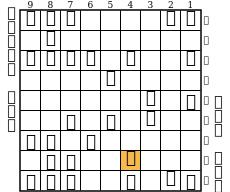

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h
go byoyomi 1000
info currmove 4i5h
info time 22 depth 1 nodes 4 score cp -6612 pv 4i5h
info currmove 4i5h
info currmove 4i5h
info time 44 depth 2 nodes 636 score cp -5191 pv 4i5h 2i1i
info currmove 4i5h
info time 47 depth 2 nodes 3546 score cp -5037 pv S*4d 4c3d
info currmove 4i5h
info time 108 depth 3 nodes 46219 score cp -6557 pv 4i5h R*4i N*6i
info currmove S*4d
info time 109 depth 3 nodes 46857 score cp -6552 pv S*4d 4c3b 4d3e
info currmove S*4d
info time 159 depth 4 nodes 96892 score cp -3607 pv S*4d 4c3d 4d3e 3d3e
info currmove S*4d
info time 501 nodes 469835 score cp -6552 pv S*4d 4c3d 4d3e 3d3e
bestmove S*4d
69手目


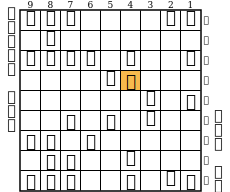

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d
go byoyomi 1000
info currmove 4c3d
info time 0 depth 1 nodes 4 score cp 5037 pv 4c3d
info currmove 4c3b
info currmove 4c3d
info time 1 depth 2 nodes 210 score cp 6542 pv 4c3d 4d3e
info currmove 4c3b
info time 2 depth 2 nodes 404 score cp 6552 pv 4c3b 4d3e
info currmove 4c3d
info time 20 depth 3 nodes 14499 score cp 3607 pv 4c3d 4d3e 3d3e
info currmove 4c3b
info currmove 4c3d
info time 52 depth 4 nodes 35460 score cp 6262 pv 4c3d 4d3e 3d3e 4i5h
info currmove 4c3b
info time 87 depth 4 nodes 71754 score cp 6464 pv 4c3b 4d3e B*5g 7i6i
info time 115 nodes 101899 score cp 6464 pv 4c3b 4d3e B*5g 7i6i
bestmove 4c3b
70手目


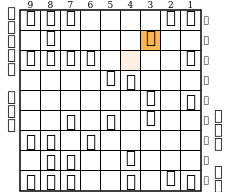

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b
go byoyomi 1000
info currmove 4d3e
info time 11 depth 1 nodes 4 score cp -6552 pv 4d3e
info currmove G*4c
info currmove 4d3e
info time 24 depth 2 nodes 524 score cp -5107 pv 4d3e 4h4i+
info currmove G*4c
info time 24 depth 2 nodes 534 score cp -3075 pv G*4c 3b2b
info time 25 depth 2 nodes 1303 score cp -3040 pv N*2d 3b2b
info currmove 4d3e
info time 61 depth 3 nodes 27775 score cp -6464 pv 4d3e B*5g 7i6i
info currmove N*2d
info currmove 4d3e
info time 133 depth 4 nodes 92336 score cp -5138 pv 4d3e 4h4i+ N*2d 3b3a
info currmove N*2d
info time 501 nodes 456084 score cp -6464 pv 4d3e 4h4i+ N*2d 3b3a
bestmove 4d3e
7

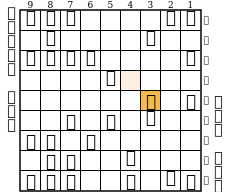

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e
go byoyomi 1000
info time 5 depth 1 nodes 201 score cp 5107 pv 4h4i+
info currmove 4h4i+
info time 11 depth 2 nodes 525 score cp 6328 pv 4h4i+ 8h1a+
info time 11 depth 2 nodes 754 score cp 6464 pv B*5g 7i6i
info currmove 4h4i+
info time 32 depth 3 nodes 20043 score cp 5138 pv 4h4i+ N*2d 3b3a
info currmove B*5g
info currmove 4h4i+
info time 110 depth 4 nodes 103146 score cp 5951 pv 4h4i+ N*2d 3b4b 8h1a+
info currmove B*5g
info time 152 depth 4 nodes 142686 score cp 6905 pv B*5g G*6h 5g6h+ 7h6h
info time 501 nodes 532166 score cp 5138 pv B*5g G*6h 5g6h+ 7h6h
bestmove B*5g
72手目


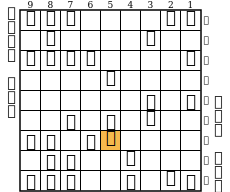

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g
go byoyomi 1000
info currmove 7i6i
info time 0 depth 1 nodes 4 score cp -6464 pv 7i6i
info currmove 7h6h
info currmove 7i6i
info time 0 depth 2 nodes 278 score cp -5019 pv 7i6i 4h4i+
info currmove 7h6h
info time 1 depth 2 nodes 544 score cp -3740 pv 7h6h 5g3e+
info currmove 7i6i
info time 15 depth 3 nodes 13611 score cp -7260 pv 7i6i 4h4i+ 8h1a+
info currmove 7h6h
info time 29 depth 3 nodes 26938 score cp -6608 pv 7h6h 5g6h+ 7i6h
info time 44 depth 3 nodes 40051 score cp -6452 pv G*6h 5g3e+ 4i5h
info currmove 7h6h
info time 76 depth 4 nodes 71472 score cp -5586 pv 7h6h 5g6h+ 7i6h 4h4i+
info currmove G*

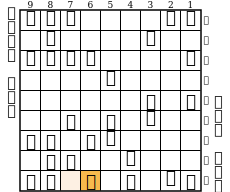

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i
go byoyomi 1000
info currmove 4h4i+
info time 6 depth 1 nodes 4 score cp 5019 pv 4h4i+
info currmove 4h4i+
info currmove 4h4i+
info time 14 depth 2 nodes 465 score cp 7260 pv 4h4i+ 8h1a+
info currmove 4h4i+
info currmove 4h4i+
info time 36 depth 3 nodes 17238 score cp 5050 pv 4h4i+ N*2d 3b3a
info currmove 4h4i+
info currmove 4h4i+
info time 94 depth 4 nodes 61870 score cp 6883 pv 4h4i+ N*2d 3b4b 8h1a+
info currmove 4h4i+
info time 501 nodes 455627 score cp 5050 pv 4h4i+ N*2d 3b4b 8h1a+
bestmove 4h4i+
74手目


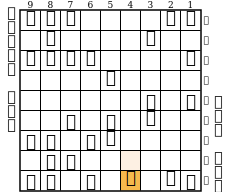

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+
go byoyomi 1000
info currmove 8h1a+
info time 36 depth 1 nodes 4 score cp -7260 pv 8h1a+
info currmove N*2d
info currmove 8h1a+
info time 70 depth 2 nodes 585 score cp -7265 pv 8h1a+ 5g3e+
info currmove N*2d
info time 70 depth 2 nodes 599 score cp -5050 pv N*2d 3b3a
info currmove 8h1a+
info time 105 depth 3 nodes 5211 score mate - pv 8h1a+ G*5i G*4f
info currmove N*2d
info time 105 depth 3 nodes 5741 score cp -6883 pv N*2d 3b4b 8h1a+
info currmove N*2d
info time 156 depth 4 nodes 52675 score cp -5265 pv N*2d 3b3a 8h4d 2i1i
info currmove N*2d
info time 461 depth 4 nodes 380585 score cp -4736 

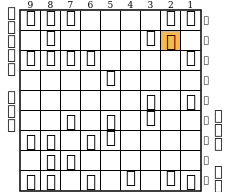

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b
go byoyomi 1000
info currmove 3b4b
info time 0 depth 1 nodes 4 score cp 5080 pv 3b4b
info currmove 3b4b
info currmove 3b4b
info time 1 depth 2 nodes 214 score cp 7330 pv 3b4b 2b2a
info currmove 3b4b
info currmove 3b4b
info time 19 depth 3 nodes 17009 score cp 5113 pv 3b4b N*3d 4b4a
info currmove 3b4b
info time 41 depth 3 nodes 34285 score cp 5115 pv 3b4a N*5c 4a4b
info currmove 3b4b
info time 101 depth 4 nodes 91326 score cp 7363 pv 3b4b N*3d 4b4a 2b2a
info currmove 3b4a
info time 158 depth 4 nodes 139521 score cp 7365 pv 3b4a N*5c 4a4b 2b2a
info time 163 nodes 144543 score cp 7365 pv 3

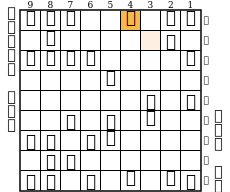

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a
go byoyomi 1000
info currmove G*3a
info time 12 depth 1 nodes 3 score cp -8833 pv G*3a
info time 12 depth 1 nodes 128 score cp -7524 pv 2b1a
info time 12 depth 1 nodes 129 score cp -7328 pv 2b2a
info currmove 2b2a
info time 25 depth 2 nodes 585 score cp -6103 pv 2b2a 5g3e+
info currmove G*3a
info time 25 depth 2 nodes 595 score cp -5150 pv G*3a 4a4b
info time 25 depth 2 nodes 804 score cp -5115 pv N*5c 4a4b
info currmove 2b2a
info time 43 depth 3 nodes 5318 score mate - pv 2b2a G*5i 8h1a+
info currmove N*5c
info time 43 depth 3 nodes 5642 score cp -7365 pv N*5c 4a4b 2b2a
info currm

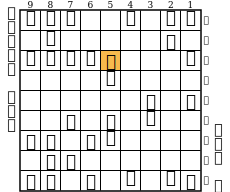

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c
go byoyomi 1000
info currmove 4a4b
info time 0 depth 1 nodes 4 score cp 5115 pv 4a4b
info currmove 4a4b
info currmove 4a4b
info time 0 depth 2 nodes 156 score cp 7365 pv 4a4b 2b2a
info currmove 4a4b
info currmove 4a4b
info time 13 depth 3 nodes 11601 score cp 5999 pv 4a4b G*2f 4b5c
info currmove 4a4b
info currmove 4a4b
info time 53 depth 4 nodes 47709 score cp 8798 pv 4a4b 5c4a+ 4b4a 2b2a
info currmove 4a4b
info time 183 depth 4 nodes 164392 score cp 8799 pv 4a5b 8h7g 5g3e+ 2b2a
info time 261 nodes 227916 score cp 8799 pv 4a5b 8h7g 5g3e+ 2b2a
bestmove 4a5b
78手目


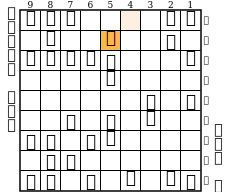

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b
go byoyomi 1000
info currmove 2b2a
info time 1 depth 1 nodes 4 score cp -7359 pv 2b2a
info currmove G*2f
info currmove 2b2a
info time 4 depth 2 nodes 507 score cp -6134 pv 2b2a 5g3e+
info currmove G*2f
info time 5 depth 2 nodes 851 score cp -5999 pv G*2f 5b5c
info currmove 2b2a
info time 24 depth 3 nodes 18166 score mate - pv 2b2a G*5i 3e4d
info currmove G*2f
info time 84 depth 3 nodes 73389 score cp -8812 pv 7h6h 5g3e+ 2b2a
info time 144 depth 3 nodes 120964 score cp -8799 pv 8h7g 5g3e+ 2b2a
info currmove G*2f
info time 154 depth 4 nodes 128852 score mate - pv G*2f G*5i 

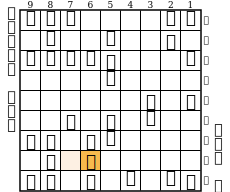

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h
go byoyomi 1000
info time 101 depth 1 nodes 219 score cp 7377 pv 5g3e+
info currmove 5g3e+
info time 101 depth 2 nodes 496 score cp 8812 pv 5g3e+ 2b2a
info currmove 5g3e+
info time 113 depth 3 nodes 12250 score cp 7573 pv 5g3e+ 2b1a 3e5c
info currmove 5g3e+
info currmove 5g3e+
info time 204 depth 4 nodes 98448 score cp 8786 pv 5g3e+ 2b2a 3e6h 6i6h
info currmove 5g3e+
info time 459 depth 4 nodes 358967 score cp 9089 pv R*5i 6i7h 5g6h+ 7h6h
info time 501 nodes 396884 score cp 7573 pv R*5i 6i7h 5g6h+ 7h6h
bestmove R*5i
80手目


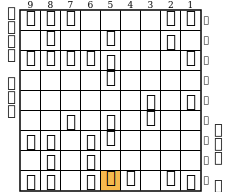

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i
go byoyomi 1000
info currmove 6i7h
info time 0 depth 1 nodes 4 score cp -8717 pv 6i7h
info currmove 6i7h
info currmove 6i7h
info time 0 depth 2 nodes 291 score cp -7272 pv 6i7h 5g3e+
info currmove 6i7h
info currmove 6i7h
info time 12 depth 3 nodes 9585 score cp -8707 pv 6i7h 5g3e+ 2b2a
info currmove 6i7h
info currmove 6i7h
info time 49 depth 4 nodes 44461 score cp -7468 pv 6i7h 5g3e+ 2b1a 3e5c
info currmove 6i7h
info time 49 nodes 44463 score cp -7468 pv 6i7h 5g3e+ 2b1a 3e5c
bestmove 6i7h
81手目


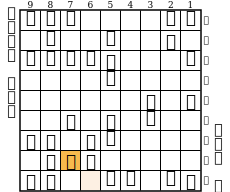

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h
go byoyomi 1000
info currmove 5g6h+
info time 73 depth 1 nodes 3 score cp 5238 pv 5g6h+
info time 74 depth 1 nodes 177 score cp 7272 pv 5g3e+
info currmove 5g3e+
info time 101 depth 2 nodes 414 score cp 8707 pv 5g3e+ 2b2a
info currmove 5g6h+
info currmove 5g3e+
info time 110 depth 3 nodes 9353 score cp 7468 pv 5g3e+ 2b1a 3e5c
info currmove 5g3e+
info currmove 5g3e+
info time 186 depth 4 nodes 71087 score cp 8898 pv 5g3e+ 2b2a 3e6h 7h6h
info currmove 5g3e+
info time 283 depth 4 nodes 151875 score cp 9718 pv 5g6h+ 7h6h 5i8i+ 8h4d
info time 501 nodes 350998 sc

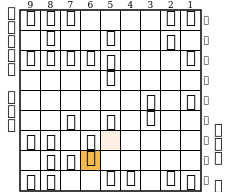

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+
go byoyomi 1000
info currmove 7h6h
info time 0 depth 1 nodes 4 score cp -8093 pv 7h6h
info currmove 7h6h
info currmove 7h6h
info time 1 depth 2 nodes 277 score cp -6851 pv 7h6h 5i8i+
info currmove 7h6h
info currmove 7h6h
info time 17 depth 3 nodes 13494 score cp -9516 pv 7h6h 5i8i+ 8h4d
info currmove 7h6h
info currmove 7h6h
info time 53 depth 4 nodes 56836 score cp -7531 pv 7h6h 5i8i+ G*7i 8i8h
info currmove 7h6h
info time 53 nodes 56838 score cp -7531 pv 7h6h 5i8i+ G*7i 8i8h
bestmove 7h6h
83手目


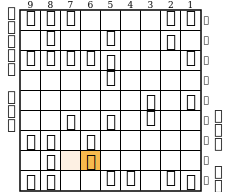

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h
go byoyomi 1000
info currmove 5i8i+
info time 101 depth 1 nodes 3 score cp 5432 pv 5i8i+
info currmove 5i8i+
info time 101 depth 2 nodes 498 score cp 8097 pv 5i8i+ 8h4d
info currmove 5i8i+
info currmove 5i8i+
info time 117 depth 3 nodes 18674 score cp 6327 pv 5i8i+ G*7i 8i8h
info currmove 5i8i+
info currmove 5i8i+
info time 182 depth 4 nodes 75758 score cp 8297 pv 5i8i+ 8h4d P*4c 4d6f
info currmove 5i8i+
info time 501 nodes 345860 score cp 6327 pv 5i8i+ 8h4d P*4c 4d6f
bestmove 5i8i+
84手目


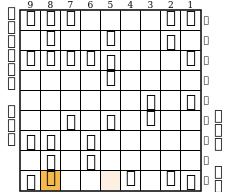

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+
go byoyomi 1000
info currmove 8h4d
info time 50 depth 1 nodes 4 score cp -8080 pv 8h4d
info currmove G*7i
info currmove 8h4d
info time 99 depth 2 nodes 560 score cp -6654 pv 8h4d 2i1i
info currmove G*7i
info time 100 depth 2 nodes 886 score cp -6310 pv G*7i 8i8h
info currmove 8h4d
info time 121 depth 3 nodes 17659 score cp -8280 pv 8h4d P*4c 4d6f
info currmove G*7i
info currmove 8h4d
info time 189 depth 4 nodes 90155 score cp -6650 pv 8h4d 8i5i 6h7h 2i1i
info currmove G*7i
info time 427 depth 4 nodes 354215 score cp -6398 pv B*1f P*2e G*7i 

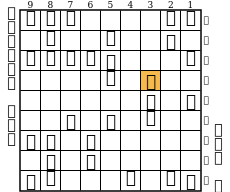

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d
go byoyomi 1000
info currmove 5b5c
info time 0 depth 1 nodes 4 score cp 6940 pv 5b5c
info currmove 5b5c
info currmove 5b5c
info time 1 depth 2 nodes 181 score cp 9605 pv 5b5c 8h4d
info currmove 5b5c
info currmove 5b5c
info time 13 depth 3 nodes 12430 score cp 6131 pv 5b5c 8h4d 5c4b
info currmove 5b5c
info time 27 depth 3 nodes 25903 score cp 6340 pv S*4c G*7i 8i8h
info time 41 depth 3 nodes 39675 score cp 6365 pv N*4c G*7i 8i8h
info time 51 depth 3 nodes 50676 score cp 6395 pv P*4c G*7i 8i8h
info currmove 5b5c
info time 55 depth 4 node

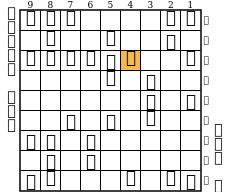

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c
go byoyomi 1000
info currmove G*7i
info time 36 depth 1 nodes 3 score cp -8590 pv G*7i
info time 37 depth 1 nodes 97 score cp -8519 pv 6h7g
info currmove G*7i
info time 75 depth 2 nodes 394 score cp -6340 pv G*7i 8i8h
info currmove 6h7g
info currmove G*7i
info time 110 depth 3 nodes 4963 score cp -9276 pv G*7i 4c3d 7i8i
info currmove 6h7g
info time 124 depth 3 nodes 13785 score cp -9228 pv 8h4d 4c3d 3e3d
info currmove G*7i
info time 149 depth 4 nodes 35076 score cp -8863 pv G*7i 8i8h 7i8h 4c3d
info currmove 8h4d
info time 180 dept

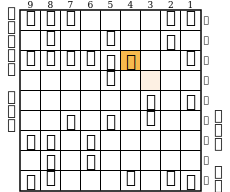

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+
go byoyomi 1000
info currmove 5b4c
info time 0 depth 1 nodes 4 score cp 7095 pv 5b4c
info currmove 5b4c
info currmove 5b4c
info time 1 depth 2 nodes 236 score cp 9760 pv 5b4c 8h4d
info currmove 5b4c
info currmove 5b4c
info time 20 depth 3 nodes 16876 score cp 7116 pv 5b4c 3e4d 4c4b
info currmove 5b4c
info currmove 5b4c
info time 58 depth 4 nodes 46849 score cp 9825 pv 5b4c S*4d 4c4b 6h7g
info currmove 5b4c
info time 94 nodes 80627 score cp 9825 pv 5b4c S*4d 4c4b 6h7g
bestmove 5b4c
88手目


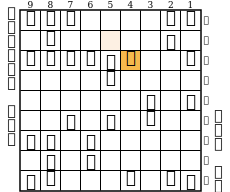

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c
go byoyomi 1000
info currmove 3e4d
info time 60 depth 1 nodes 3 score cp -12235 pv 3e4d
info time 60 depth 1 nodes 140 score cp -9760 pv 8h4d
info currmove 8h4d
info time 101 depth 2 nodes 558 score cp -8334 pv 8h4d 2i1i
info currmove 3e4d
info time 101 depth 2 nodes 568 score cp -7116 pv 3e4d 4c4b
info currmove 8h4d
info time 122 depth 3 nodes 17898 score cp -9930 pv 8h4d N*5b 4d6f
info currmove 3e4d
info time 135 depth 3 nodes 27822 score cp -9825 pv S*4d 4c4b 6h7g
info currmove 3e4d
info time 175 depth 4 nodes 68256 

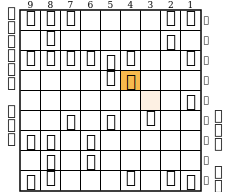

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d
go byoyomi 1000
info currmove 4c4b
info time 0 depth 1 nodes 4 score cp 7116 pv 4c4b
info currmove 4c3d
info currmove 4c4b
info time 1 depth 2 nodes 230 score cp 9780 pv 4c4b 6h7g
info currmove 4c3d
info time 1 depth 2 nodes 450 score cp 10800 pv 4c3d 2b2a
info currmove 4c4b
info time 19 depth 3 nodes 15481 score cp 7173 pv 4c4b S*4c 4b5a
info currmove 4c3d
info currmove 4c4b
info time 89 depth 4 nodes 78777 score cp 9777 pv 4c4b 8h6f 8i5i 6h7h
info currmove 4c3d
info time 169 nodes 155523 score cp 9777 pv 4c4b 8h6

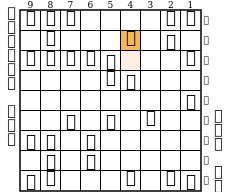

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b
go byoyomi 1000
info time 0 nodes 0 score mate + pv S*4c
bestmove S*4c
91手目


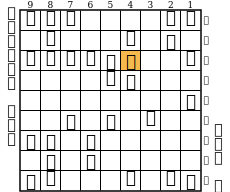

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b S*4c
go byoyomi 1000
info currmove 4b5a
info time 0 depth 1 nodes 4 score cp 7173 pv 4b5a
info currmove 4b5a
info currmove 4b5a
info time 1 depth 2 nodes 166 score cp 10863 pv 4b5a 2b2a
info currmove 4b5a
info currmove 4b5a
info time 7 depth 3 nodes 6072 score mate - pv 4b5a G*6a 8i8h
info currmove 4b5a
info currmove 4b5a
info time 26 depth 4 nodes 21766 score mate - pv 4b5a G*6a 8i8h 6h6i
info time 26 nodes 21768 score mate - pv 4b5a G*6a 8i8h 6h6i
bestmove 4b5a
92手目


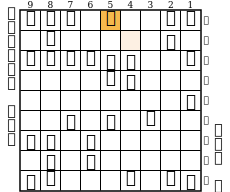

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b S*4c 4b5a
go byoyomi 1000
info time 0 nodes 0 score mate + pv G*6a
bestmove G*6a
93手目


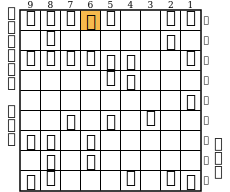

まで93手で先手の勝ち
対局数1 Lesserkai 1.4.2 1勝(50%) Lesserkai 1.4.2 0勝(0%)
Lesserkai 1.4.2
isready
readyok
Lesserkai 1.4.2
isready
readyok
開始局面


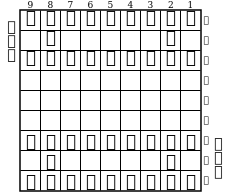

usinewgame
usinewgame
position startpos
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 10 pv 6i7h
info currmove 6i7h
info time 1 depth 2 nodes 126 score cp 0 pv 6i7h 4a3b
info currmove 6i7h
info time 2 depth 3 nodes 2076 score cp 3 pv 6i7h 4a3b 4i5h
info currmove 6i7h
info currmove 6i7h
info time 4 depth 4 nodes 6553 score cp 0 pv 6i7h 4a3b 4i5h 5a4b
info currmove 6i7h
info time 10 nodes 21490 score cp 0 pv 6i7h 4a3b 4i5h 5a4b
bestmove 6i7h
1手目


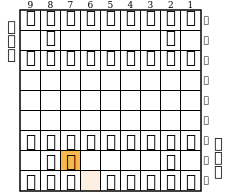

position startpos moves 6i7h
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 0 pv 4a3b
info currmove 4a3b
info time 0 depth 2 nodes 120 score cp -3 pv 4a3b 4i5h
info currmove 4a3b
info time 1 depth 3 nodes 1890 score cp 0 pv 4a3b 4i5h 5a4b
info currmove 4a3b
info currmove 4a3b
info time 3 depth 4 nodes 5981 score cp -3 pv 4a3b 4i5h 5a4b 5i6h
info currmove 4a3b
info time 9 nodes 19606 score cp -3 pv 4a3b 4i5h 5a4b 5i6h
bestmove 4a3b
2手目


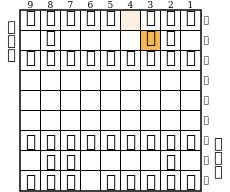

position startpos moves 6i7h 4a3b
go byoyomi 1000
info time 0 depth 1 nodes 30 score cp 3 pv 4i5h
info currmove 4i5h
info time 0 depth 2 nodes 116 score cp 0 pv 4i5h 5a4b
info currmove 4i5h
info time 0 depth 3 nodes 1035 score cp 3 pv 4i5h 5a4b 5i6h
info currmove 4i5h
info currmove 4i5h
info time 2 depth 4 nodes 4768 score cp 0 pv 4i5h 5a4b 5i6h 6a5b
info currmove 4i5h
info time 7 nodes 16080 score cp 0 pv 4i5h 5a4b 5i6h 6a5b
bestmove 4i5h
3手目


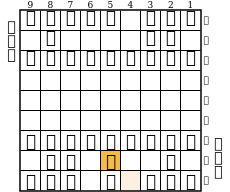

position startpos moves 6i7h 4a3b 4i5h
go byoyomi 1000
info time 0 depth 1 nodes 30 score cp 0 pv 5a4b
info currmove 5a4b
info time 1 depth 2 nodes 110 score cp -3 pv 5a4b 5i6h
info currmove 5a4b
info time 1 depth 3 nodes 942 score cp 0 pv 5a4b 5i6h 6a5b
info currmove 5a4b
info currmove 5a4b
info time 3 depth 4 nodes 4359 score cp -1 pv 5a4b 5i6h 6a5b 1g1f
info currmove 5a4b
info time 9 nodes 14210 score cp -1 pv 5a4b 5i6h 6a5b 1g1f
bestmove 5a4b
4手目


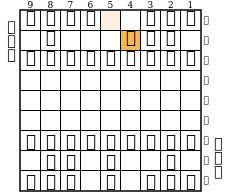

position startpos moves 6i7h 4a3b 4i5h 5a4b
go byoyomi 1000
info time 0 depth 1 nodes 27 score cp 3 pv 5i6h
info currmove 5i6h
info time 0 depth 2 nodes 104 score cp 0 pv 5i6h 6a5b
info currmove 5i6h
info time 0 depth 3 nodes 800 score cp 1 pv 5i6h 6a5b 1g1f
info currmove 5i6h
info currmove 5i6h
info time 2 depth 4 nodes 3880 score cp 0 pv 5i6h 6a5b 1g1f 1c1d
info currmove 5i6h
info time 5 nodes 12003 score cp 0 pv 5i6h 6a5b 1g1f 1c1d
bestmove 5i6h
5手目


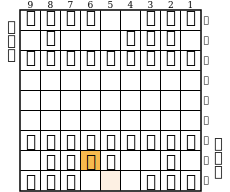

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h
go byoyomi 1000
info time 0 depth 1 nodes 27 score cp 0 pv 6a5b
info currmove 6a5b
info time 0 depth 2 nodes 96 score cp -1 pv 6a5b 1g1f
info currmove 6a5b
info time 1 depth 3 nodes 696 score cp 0 pv 6a5b 1g1f 1c1d
info currmove 6a5b
info currmove 6a5b
info time 2 depth 4 nodes 4407 score cp -3 pv 6a5b 6g6f 3c3d 5h6g
info currmove 6a5b
info time 5 depth 4 nodes 10503 score cp -2 pv 3c3d 1g1f 6a5b 1f1e
info time 8 nodes 17142 score cp -2 pv 3c3d 1g1f 6a5b 1f1e
bestmove 3c3d
6手目


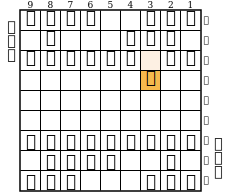

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d
go byoyomi 1000
info currmove 1g1f
info time 0 depth 1 nodes 4 score cp 3 pv 1g1f
info currmove 1g1f
info currmove 1g1f
info time 0 depth 2 nodes 113 score cp 0 pv 1g1f 6a5b
info currmove 1g1f
info currmove 1g1f
info time 1 depth 3 nodes 1596 score cp 2 pv 1g1f 6a5b 1f1e
info currmove 1g1f
info currmove 1g1f
info time 4 depth 4 nodes 5067 score cp 0 pv 1g1f 6a5b 1f1e 3d3e
info currmove 1g1f
info time 8 nodes 12010 score cp 0 pv 1g1f 6a5b 1f1e 3d3e
bestmove 1g1f
7手目


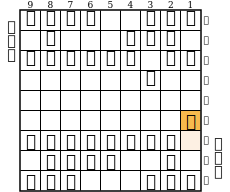

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f
go byoyomi 1000
info currmove 6a5b
info time 0 depth 1 nodes 3 score cp 0 pv 6a5b
info currmove 6a5b
info time 0 depth 2 nodes 119 score cp -2 pv 6a5b 1f1e
info currmove 6a5b
info currmove 6a5b
info time 1 depth 3 nodes 970 score cp 0 pv 6a5b 1f1e 3d3e
info currmove 6a5b
info currmove 6a5b
info time 5 depth 4 nodes 4579 score cp -1 pv 6a5b 1f1e 3d3e 2g2f
info currmove 6a5b
info time 13 nodes 18066 score cp -1 pv 6a5b 1f1e 3d3e 2g2f
bestmove 6a5b
8手目


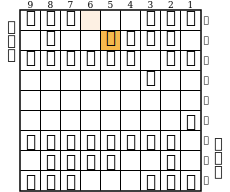

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b
go byoyomi 1000
info currmove 1f1e
info time 0 depth 1 nodes 4 score cp 2 pv 1f1e
info currmove 1f1e
info currmove 1f1e
info time 0 depth 2 nodes 110 score cp 0 pv 1f1e 3d3e
info currmove 1f1e
info currmove 1f1e
info time 1 depth 3 nodes 898 score cp 1 pv 1f1e 3d3e 2g2f
info currmove 1f1e
info currmove 1f1e
info time 4 depth 4 nodes 5361 score cp -2 pv 1f1e 2b3c 2g2f 3a2b
info currmove 1f1e
info time 23 nodes 32687 score cp -2 pv 1f1e 2b3c 2g2f 3a2b
bestmove 1f1e
9手目


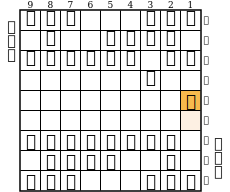

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e
go byoyomi 1000
info time 0 depth 1 nodes 32 score cp 0 pv 3d3e
info currmove 3d3e
info time 0 depth 2 nodes 105 score cp -1 pv 3d3e 2g2f
info currmove 3d3e
info time 1 depth 3 nodes 927 score cp 0 pv 3d3e 2g2f 2c2d
info currmove 3d3e
info time 2 depth 3 nodes 1743 score cp 1 pv 4c4d 2g2f 5b4c
info time 2 depth 3 nodes 2851 score cp 2 pv 2b3c 2g2f 3a2b
info currmove 3d3e
info time 4 depth 4 nodes 5359 score cp -2 pv 3d3e 2g2f 2c2d 2f2e
info currmove 2b3c
info time 6 depth 4 nodes 7089 score cp 0 pv 2b3c 2g2f 3a2b 2f2e
info time 11 nodes 16555 score cp 0 pv 2b3c 2g2f 3a2b 2f2e
bestmove 2b3c
10手目


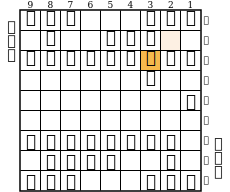

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c
go byoyomi 1000
info currmove 2g2f
info time 1 depth 1 nodes 4 score cp 3 pv 2g2f
info currmove 2g2f
info currmove 2g2f
info time 1 depth 2 nodes 112 score cp -2 pv 2g2f 3a2b
info currmove 2g2f
info currmove 2g2f
info time 2 depth 3 nodes 928 score cp 0 pv 2g2f 3a2b 2f2e
info currmove 2g2f
info currmove 2g2f
info time 4 depth 4 nodes 4221 score cp -2 pv 2g2f 3a2b 2f2e 3d3e
info currmove 2g2f
info time 10 nodes 13304 score cp -2 pv 2g2f 3a2b 2f2e 3d3e
bestmove 2g2f
11手目


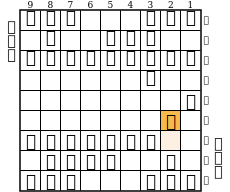

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 2 pv 3a2b
info currmove 3a2b
info time 1 depth 2 nodes 109 score cp 0 pv 3a2b 2f2e
info currmove 3a2b
info time 2 depth 3 nodes 1023 score cp 2 pv 3a2b 2f2e 3d3e
info currmove 3a2b
info currmove 3a2b
info time 5 depth 4 nodes 4541 score cp 1 pv 3a2b 2f2e 3d3e 4g4f
info currmove 3a2b
info time 14 nodes 15402 score cp 1 pv 3a2b 2f2e 3d3e 4g4f
bestmove 3a2b
12手目


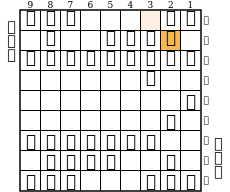

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b
go byoyomi 1000
info currmove 2f2e
info time 0 depth 1 nodes 4 score cp 0 pv 2f2e
info currmove 2f2e
info currmove 2f2e
info time 0 depth 2 nodes 112 score cp -2 pv 2f2e 3d3e
info currmove 2f2e
info currmove 2f2e
info time 1 depth 3 nodes 901 score cp -1 pv 2f2e 3d3e 4g4f
info currmove 2f2e
info currmove 2f2e
info time 5 depth 4 nodes 5941 score cp -4 pv 2f2e 3c4d 2e2d 2c2d
info currmove 2f2e
info time 21 nodes 26875 score cp -4 pv 2f2e 3c4d 2e2d 2c2d
bestmove 2f2e
13手目


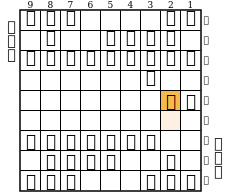

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e
go byoyomi 1000
info currmove 3d3e
info time 0 depth 1 nodes 4 score cp 2 pv 3d3e
info currmove 3d3e
info currmove 3d3e
info time 0 depth 2 nodes 112 score cp 1 pv 3d3e 4g4f
info currmove 3d3e
info currmove 3d3e
info time 2 depth 3 nodes 959 score cp 2 pv 3d3e 4g4f 4c4d
info currmove 3d3e
info time 3 depth 3 nodes 1758 score cp 3 pv 4c4d 3g3f 5b4c
info time 4 depth 3 nodes 2964 score cp 4 pv 3c4d 2e2d 2c2d
info currmove 3d3e
info time 9 depth 4 nodes 6311 score cp 1 pv 3d3e 4g4f 4c4d 5g5f
info currmove 3c4d
info time 19 nodes 17546 score cp 1 pv 3d3e 4g4f 4c4d 5g5f
bestmove 3d3e
14手目


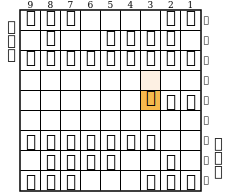

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e
go byoyomi 1000
info currmove 4g4f
info time 0 depth 1 nodes 4 score cp -1 pv 4g4f
info currmove 4g4f
info currmove 4g4f
info time 0 depth 2 nodes 113 score cp -2 pv 4g4f 4c4d
info currmove 4g4f
info currmove 4g4f
info time 1 depth 3 nodes 903 score cp -1 pv 4g4f 4c4d 5g5f
info currmove 4g4f
info currmove 4g4f
info time 4 depth 4 nodes 4819 score cp -4 pv 4g4f 4c4d 5g5f 5b4c
info currmove 4g4f
info time 19 nodes 22720 score cp -4 pv 4g4f 4c4d 5g5f 5b4c
bestmove 4g4f
15手目


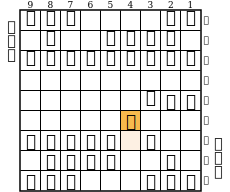

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f
go byoyomi 1000
info currmove 4c4d
info time 0 depth 1 nodes 4 score cp 2 pv 4c4d
info currmove 4c4d
info currmove 4c4d
info time 0 depth 2 nodes 113 score cp 1 pv 4c4d 5g5f
info currmove 4c4d
info currmove 4c4d
info time 1 depth 3 nodes 946 score cp 4 pv 4c4d 5g5f 5b4c
info currmove 4c4d
info currmove 4c4d
info time 4 depth 4 nodes 4792 score cp 1 pv 4c4d 6g6f 5b4c 5h6g
info currmove 4c4d
info time 8 depth 4 nodes 9258 score cp 4 pv 3c5e 2h2f 2b3c 4f4e
info time 15 nodes 17183 score cp 4 pv 3c5e 2h2f 2b3c 4f4e
bestmove 3c5e
16手目


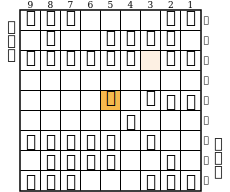

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e
go byoyomi 1000
info currmove 4f4e
info time 0 depth 1 nodes 4 score cp 1 pv 4f4e
info currmove 4f4e
info currmove 4f4e
info time 0 depth 2 nodes 124 score cp -4 pv 4f4e 2b3c
info currmove 4f4e
info currmove 4f4e
info time 3 depth 3 nodes 2750 score cp -192 pv 4f4e 2a3c 2e2d
info currmove 4f4e
info time 4 depth 3 nodes 3698 score cp -4 pv 2h2f 2b3c 4f4e
info currmove 4f4e
info time 8 depth 4 nodes 8435 score cp -3 pv 4f4e 2b3c 5g5f 5e4f
info currmove 2h2f
info time 19 nodes 20596 score cp -3 pv 4f4e 2b3c 5g5f 5e4f
bestmove 4f4e
17手目


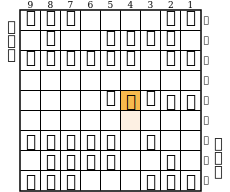

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e
go byoyomi 1000
info time 0 depth 1 nodes 39 score cp 0 pv 4c4d
info time 0 depth 1 nodes 41 score cp 4 pv 2b3c
info currmove 2b3c
info time 0 depth 2 nodes 119 score cp 3 pv 2b3c 5g5f
info time 1 depth 2 nodes 212 score cp 192 pv 2a3c 2e2d
info currmove 2a3c
info time 2 depth 3 nodes 1204 score cp -2 pv 2a3c 5g5f 5e4f
info currmove 2b3c
info time 3 depth 3 nodes 2066 score cp 3 pv 2b3c 5g5f 5e4f
info currmove 2a3c
info time 8 depth 4 nodes 7329 score cp 195 pv 2a3c 2e2d 3c4e 3i3h
info currmove 2b3c
info time 30 depth 4 nodes 31412 score cp 1289 pv 3e3f 2h2f 3f3g+ 2e2d
info time 30 nodes 31412 score cp 1289 pv 3e3f 2h2f 3f3g+ 2e2d
bestmove 3e3f
18手目


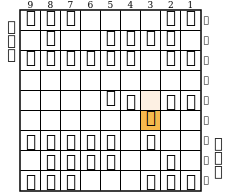

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f
go byoyomi 1000
info currmove 5h4g
info time 0 depth 1 nodes 4 score cp -24 pv 5h4g
info currmove 5g5f
info time 0 depth 1 nodes 35 score cp -11 pv 2h3h
info currmove 2h3h
info time 0 depth 2 nodes 126 score cp -11 pv 2h3h 3f3g
info currmove 5g5f
info time 0 depth 2 nodes 200 score cp 195 pv 5g5f 5e4f
info currmove 2h3h
info time 2 depth 3 nodes 1881 score cp -1301 pv 2h3h 3f3g+ 3h1h
info currmove 5g5f
info time 5 depth 3 nodes 3381 score cp -1289 pv 2h2f 3f3g+ 2e2d
info currmove 5g5f
info time 12 depth 4 nodes 8133 score cp -415 pv 5g5f 5e3g+ 2h1h 3g4f
info currmove 2h2f
info time 34 nodes 26253 score cp -415 pv 5g5f 5e3g+ 2h1h 3g4f
bestmove 5g5f
19手目


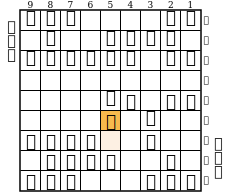

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f
go byoyomi 1000
info currmove 5e4f
info time 0 depth 1 nodes 3 score cp -195 pv 5e4f
info currmove 5e4f
info time 0 depth 2 nodes 89 score cp 1317 pv 5e4f 6h6i
info currmove 5e4f
info currmove 5e4f
info time 1 depth 3 nodes 425 score cp -182 pv 5e4f 5h5g 4f6d
info currmove 5e4f
info time 2 depth 3 nodes 1351 score cp 415 pv 5e3g+ 2h1h 3g4f
info currmove 5e3g+
info time 6 depth 4 nodes 5238 score cp 622 pv 5e3g+ 2h1h 3g4f 6h6i
info currmove 5e4f
info time 8 depth 4 nodes 7286 score cp 1483 pv 5e4f 6h6i 3f3g+ 2h2f
info time 46 nodes 44577 score cp 1483 pv 5e4f 6h6i 3f3g+ 2h2f
bestmove 5e4f
20手目


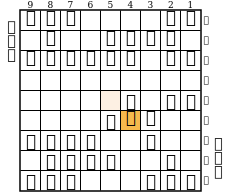

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f
go byoyomi 1000
info currmove 5h5g
info time 0 depth 1 nodes 3 score cp -1328 pv 5h5g
info time 0 depth 1 nodes 9 score cp -1317 pv 6h6i
info currmove 5h5g
info time 0 depth 2 nodes 86 score cp 182 pv 5h5g 4f6d
info currmove 6h6i
info currmove 5h5g
info time 2 depth 3 nodes 1123 score cp -1313 pv 5h5g 3f3g+ 2h2f
info currmove 6h6i
info time 3 depth 3 nodes 2121 score cp -1302 pv 6h6i 3f3g+ 2h2f
info currmove 5h5g
info time 6 depth 4 nodes 5898 score cp -1313 pv 5h5g 3f3g+ 2h2f 4f6d
info currmove 6h6i
info time 10 depth 4 nodes 10123 score cp -1312 pv 6h6i 3f3g+ 2h2f P*3f
info time 11 nodes 11134 score cp -1312 pv 6h6i 3f3g+ 2h2f P*3f
bestmove 6h6i
21手目


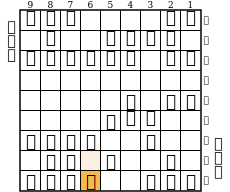

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i
go byoyomi 1000
info currmove 3f3g+
info time 0 depth 1 nodes 4 score cp 1302 pv 3f3g+
info currmove 3f3g+
info currmove 3f3g+
info time 0 depth 2 nodes 131 score cp 1302 pv 3f3g+ 2h2f
info currmove 3f3g+
info currmove 3f3g+
info time 2 depth 3 nodes 1296 score cp 1312 pv 3f3g+ 2h2f P*3f
info currmove 3f3g+
info currmove 3f3g+
info time 11 depth 4 nodes 7126 score cp 2057 pv 3f3g+ 2h1h P*3h 3i4h
info currmove 3f3g+
info time 39 nodes 35963 score cp 2057 pv 3f3g+ 2h1h P*3h 3i4h
bestmove 3f3g+
22手目


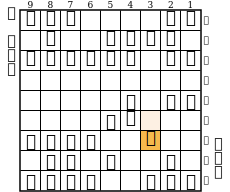

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+
go byoyomi 1000
info time 0 depth 1 nodes 32 score cp -1302 pv 2h2f
info currmove 2h2f
info time 0 depth 2 nodes 146 score cp -1312 pv 2h2f P*3f
info currmove 2h2f
info time 2 depth 3 nodes 1719 score cp -2457 pv 2h2f 3g4g 2f1f
info currmove 2h2f
info time 3 depth 3 nodes 2847 score cp -2057 pv 2h1h P*3h 3i4h
info currmove 2h2f
info time 11 depth 4 nodes 9104 score cp -1396 pv 2h2f 4f7i+ 8h7i S*3f
info currmove 2h1h
info time 43 nodes 36540 score cp -1396 pv 2h2f 4f7i+ 8h7i S*3f
bestmove 2h2f
23手目


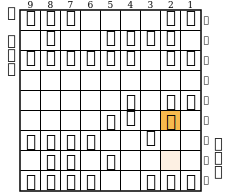

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f
go byoyomi 1000
info currmove 3g4g
info time 0 depth 1 nodes 4 score cp -3 pv 3g4g
info currmove P*3f
info time 0 depth 1 nodes 5 score cp 1312 pv P*3f
info currmove 3g4g
info time 1 depth 2 nodes 153 score cp 2457 pv 3g4g 2f1f
info currmove P*3f
info currmove 3g4g
info time 3 depth 3 nodes 1567 score cp 75 pv 3g4g 2f1f 4g5h
info currmove P*3f
info time 4 depth 3 nodes 2313 score cp 1316 pv P*3f 6g6f 2b3c
info time 4 depth 3 nodes 2990 score cp 1396 pv 4f7i+ 8h7i S*3f
info currmove 4f7i+
info time 21 depth 4 nodes 16178 score cp 1843 pv 4f7i+ 8h7i P*3h 3i4h
info currmove 3g4g
info time 24 depth 4 nodes 19802 score cp 2682 pv 3g4g 5h4g 4f1i+ 2e2d
info time 95 nodes 84493 score cp 2682 pv 3g4g 5h4g 4f1i+ 2e2d
bestmove 3g4g
24手目


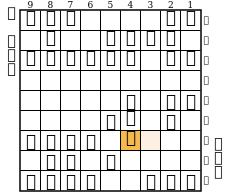

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g
go byoyomi 1000
info currmove 2f1f
info time 0 depth 1 nodes 4 score cp -2457 pv 2f1f
info currmove 2f1f
info currmove 2f1f
info time 0 depth 2 nodes 157 score cp -75 pv 2f1f 4g5h
info currmove 2f1f
info currmove 2f1f
info time 2 depth 3 nodes 1505 score cp -3563 pv 2f1f 4g5h 6i5h
info currmove 2f1f
info time 4 depth 3 nodes 3300 score cp -2670 pv 5h4g 4f1i+ 2e2d
info currmove 5h4g
info time 11 depth 4 nodes 12468 score cp -2817 pv 5h4g 4f1i+ 2e2d L*1h
info currmove 2f1f
info time 21 depth 4 nodes 19218 score cp -2754 pv 5h5i 4f1i+ 5i4i P*3h
info time 35 nodes 34225 score cp -2754 pv 5h5i 4f1i+ 5i4i P*3h
bestmove 5h5i
25手目


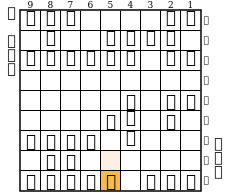

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i
go byoyomi 1000
info currmove 4f1i+
info time 1 depth 1 nodes 4 score cp 2754 pv 4f1i+
info currmove 4f1i+
info currmove 4f1i+
info time 1 depth 2 nodes 145 score cp 2742 pv 4f1i+ 2e2d
info currmove 4f1i+
info currmove 4f1i+
info time 4 depth 3 nodes 2918 score cp 2754 pv 4f1i+ 5i4i P*3h
info currmove 4f1i+
info currmove 4f1i+
info time 17 depth 4 nodes 11217 score cp 2959 pv 4f1i+ 2i1g 1i1h 2f1f
info currmove 4f1i+
info time 54 depth 4 nodes 45970 score cp 3674 pv P*3g 2f3f 3g3h+ 3f3b+
info time 74 nodes 66795 score cp 3674 pv P*3g 2f3f 3g3h+ 3f3b+
bestmove P*3g
26手目


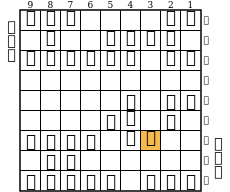

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g
go byoyomi 1000
info currmove 5i4i
info time 0 depth 1 nodes 3 score cp -1315 pv 5i4i
info currmove 5i4i
info time 0 depth 2 nodes 130 score cp -1840 pv 5i4i 3g3h+
info currmove 5i4i
info time 2 depth 2 nodes 940 score cp -1455 pv 2f2g 4f5g+
info currmove 5i4i
info time 3 depth 3 nodes 2052 score cp -3831 pv 5i4i 3g3h+ 6i5i
info currmove 2f2g
info time 6 depth 3 nodes 4426 score cp -2983 pv 2f4f 4g4f 4e4d
info currmove 2f4f
info time 15 depth 4 nodes 10619 score cp -3391 pv 2f4f 4g4f 4e4d R*2g
info currmove 2f2g
info time 20 depth 4 nodes 15143 score cp -2833 pv 2f2g 3g3h+ 2g4g 4f1i+
info time 35 nodes 26246 score cp -2833 pv 2f2g 3g3h+ 2g4g 4f1i+
bestmove 2f2g
27手目


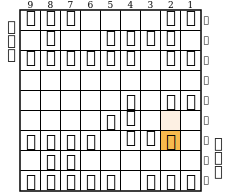

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g
go byoyomi 1000
info currmove 3g3h+
info time 1 depth 1 nodes 3 score cp 1110 pv 3g3h+
info time 1 depth 1 nodes 49 score cp 1455 pv 4f5g+
info currmove 3g3h+
info time 1 depth 2 nodes 129 score cp 4460 pv 3g3h+ 2g2f
info currmove 4f5g+
info currmove 3g3h+
info time 4 depth 3 nodes 2164 score cp 2833 pv 3g3h+ 2g4g 4f1i+
info currmove 4f5g+
info currmove 3g3h+
info time 14 depth 4 nodes 7158 score cp 4375 pv 3g3h+ 2g4g 4f7i+ 8h7i
info currmove 3g3h+
info time 43 nodes 33950 score cp 4375 pv 3g3h+ 2g4g 4f7i+ 8h7i
bestmove 3g3h+
28手目


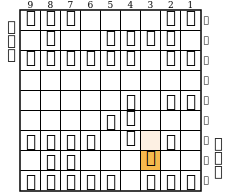

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+
go byoyomi 1000
info time 1 depth 1 nodes 31 score cp -4212 pv 2g4g
info currmove 2g4g
info time 1 depth 2 nodes 146 score cp -2471 pv 2g4g 4f1i+
info currmove 2g4g
info time 5 depth 3 nodes 1953 score cp -4354 pv 2g4g 4f7i+ 8h7i
info currmove 2g4g
info currmove 2g4g
info time 15 depth 4 nodes 9134 score cp -4356 pv 2g4g 4f7i+ 8h7i 3h3i
info currmove 2g4g
info time 36 nodes 28759 score cp -4356 pv 2g4g 4f7i+ 8h7i 3h3i
bestmove 2g4g
29手目


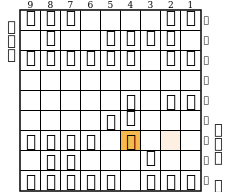

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g
go byoyomi 1000
info currmove 4f1i+
info time 0 depth 1 nodes 4 score cp 1246 pv 4f1i+
info currmove 4f7i+
info currmove 4f1i+
info time 0 depth 2 nodes 167 score cp 2478 pv 4f1i+ 3i3h
info currmove 4f7i+
info time 0 depth 2 nodes 179 score cp 2776 pv 4f7i+ 8h7i
info currmove 4f1i+
info time 3 depth 3 nodes 2734 score cp 2326 pv 4f1i+ P*3c 3h3i
info currmove 4f7i+
info time 3 depth 3 nodes 3117 score cp 2770 pv 4f7i+ 8h7i 3h3i
info currmove 4f7i+
info time 17 depth 4 nodes 12334 score cp 3370 pv 4f7i+ 8h7i 3h2i 5i4i
info currmove 4f7i+
info time 65 nodes 65908 score cp 3370 pv 4f7i+ 8h7i 3h2i 5i4i
bestmove 4f7i+
30手目


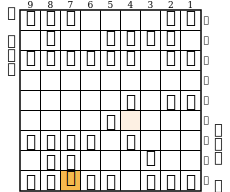

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+
go byoyomi 1000
info currmove 8h7i
info time 0 depth 1 nodes 4 score cp -2579 pv 8h7i
info currmove 8h7i
info currmove 8h7i
info time 0 depth 2 nodes 149 score cp -2574 pv 8h7i 3h3i
info currmove 8h7i
info currmove 8h7i
info time 6 depth 3 nodes 5130 score cp -3175 pv 8h7i 3h2i 5i4i
info currmove 8h7i
info currmove 8h7i
info time 18 depth 4 nodes 15946 score cp -2814 pv 8h7i 3h3i P*3c 4b3c
info currmove 8h7i
info time 33 depth 4 nodes 33649 score cp -2810 pv 6i7i 3h3i P*3c 2b3c
info time 37 nodes 37475 score cp -2810 pv 6i7i 3h3i P*3c 2b3c
bestmove 6i7i
31手目


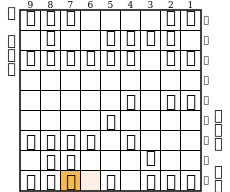

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i
go byoyomi 1000
info currmove 3h3i
info time 0 depth 1 nodes 4 score cp 1500 pv 3h3i
info currmove 3h2i
info currmove 3h3i
info time 0 depth 2 nodes 279 score cp 1500 pv 3h3i 2i3g
info currmove 3h2i
info time 0 depth 2 nodes 425 score cp 2115 pv 3h2i 5i4i
info currmove 3h3i
info time 10 depth 3 nodes 9248 score cp 1505 pv 3h3i 2i3g 2b3c
info currmove 3h2i
info currmove 3h3i
info time 29 depth 4 nodes 31683 score cp 1530 pv 3h3i 2i1g S*2f B*4h
info currmove 3h2i
info time 58 depth 4 nodes 60156 score cp 2114 pv 3h2i 3i3h 2i1i 5i5h
info time 147 nodes 161122 score cp 2114 pv 3h2i 3i3h 2i1i 5i5h
bestmove 3h2i
32手目


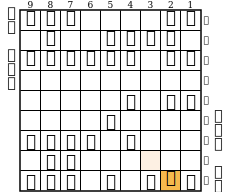

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i
go byoyomi 1000
info currmove P*3c
info time 0 depth 1 nodes 3 score cp -2935 pv P*3c
info time 0 depth 1 nodes 86 score cp -2120 pv 3i3h
info time 0 depth 1 nodes 88 score cp -2115 pv 5i4i
info currmove 5i4i
info time 1 depth 2 nodes 333 score cp -2124 pv 5i4i 2i1i
info currmove P*3c
info time 1 depth 2 nodes 511 score cp -1110 pv P*3c 2b3c
info currmove 5i4i
info time 14 depth 3 nodes 13331 score cp -2720 pv 5i4i 2i3i 4i3i
info currmove P*3c
info time 21 depth 3 nodes 18821 score cp -2330 pv P*3c 2b3c 5i4i
info time 28 depth 3 nodes 25136 score cp -2114 pv 3i3h 2i1i 5i5h
info currmove 3i3h
info time 47 depth 4 nodes 53322 score cp -2101 pv 3i3h 2i1i 4g1g L*1h
info currmove P*3c
info time 217 depth 4 nodes 268432 score cp -2004 pv 7g7f 2i3i B*6f 3i2i
info time 268 nodes 333371 score cp -2004 pv 7g7f 2

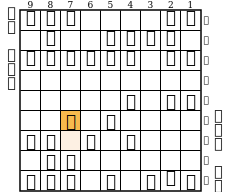

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f
go byoyomi 1000
info currmove 2i3i
info time 0 depth 1 nodes 3 score cp 2934 pv 2i3i
info currmove 2i3i
info time 1 depth 2 nodes 336 score cp 2919 pv 2i3i 5i5h
info currmove 2i3i
info currmove 2i3i
info time 14 depth 3 nodes 13767 score cp 2004 pv 2i3i B*6f 3i2i
info currmove 2i3i
info currmove 2i3i
info time 106 depth 4 nodes 97370 score cp 3019 pv 2i3i 4g4f 2a3c B*1f
info currmove 2i3i
info time 364 nodes 319500 score cp 3019 pv 2i3i 4g4f 2a3c B*1f
bestmove 2i3i
34手目


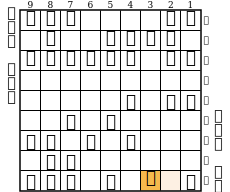

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i
go byoyomi 1000
info currmove B*6f
info time 1 depth 1 nodes 3 score cp -3024 pv B*6f
info time 1 depth 1 nodes 96 score cp -2934 pv 4g3g
info time 1 depth 1 nodes 104 score cp -2919 pv 5i5h
info currmove B*6f
info time 1 depth 2 nodes 341 score cp -2004 pv B*6f 3i2i
info currmove 5i5h
info currmove B*6f
info time 6 depth 3 nodes 4550 score cp -3164 pv B*6f S*3f 4g4f
info currmove 5i5h
info time 13 depth 3 nodes 11376 score cp -3059 pv 5i5h S*3f 4g4f
info time 31 depth 3 nodes 28342 score cp -3019 pv 4g4f 2a3c B*1f
info currmove B*6f
info time 84 depth 4 nodes 76543 score cp -2964 pv B*6f S*3h 4g4h 2b3c
info currmove 4g4f
info time 199 depth 4 nodes 204413 score cp -2927 pv 4e4d 2b3c 4g3g 3i2i
info time 488 nodes 532300 score cp -2927 pv 4e4d 2b3c 4g3g 3i2i
bestmove 4e4d
35手目


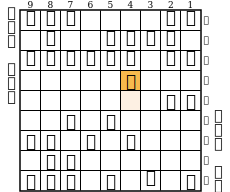

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d
go byoyomi 1000
info currmove 4c4d
info time 0 depth 1 nodes 4 score cp 2938 pv 4c4d
info currmove S*3f
info currmove 4c4d
info time 0 depth 2 nodes 352 score cp 2932 pv 4c4d 4g4d
info currmove S*3f
info time 1 depth 2 nodes 498 score cp 3062 pv S*3f 4g4f
info currmove 4c4d
info time 19 depth 3 nodes 22103 score cp 2933 pv 4c4d 4g4d 4b3c
info currmove S*3f
info currmove 4c4d
info time 34 depth 4 nodes 37070 score cp 2927 pv 4c4d 4g4d P*4c 4d3d
info currmove S*3f
info time 58 depth 4 nodes 57215 score cp 3064 pv S*3f 4d4c 3b4c 4g4f
info time 130 nodes 111398 score cp 3064 pv S*3f 4d4c 3b4c 4g4f
bestmove S*3f
36手目


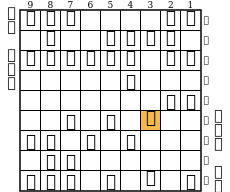

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f
go byoyomi 1000
info currmove 4d4c
info time 13 depth 1 nodes 3 score cp -6957 pv 4d4c
info time 13 depth 1 nodes 89 score cp -3062 pv 4g4f
info currmove 4g4f
info time 28 depth 2 nodes 360 score cp -3067 pv 4g4f 3f3g+
info currmove 4d4c
info time 28 depth 2 nodes 372 score cp -2862 pv 4d4c 5b4c
info currmove 4g4f
info time 52 depth 3 nodes 9858 score cp -3052 pv 4g4f 3f3g+ 5i5h
info currmove 4d4c
info currmove 4g4f
info time 91 depth 4 nodes 34542 score cp -3067 pv 4g4f 3f3g+ 4d4c 5b4c
info currmove 4d4c
info time 353 nodes 297991 score cp -3067 pv 4g4f 3f3g+ 4d4c 5b4c
bestmove 4g4f
37手目


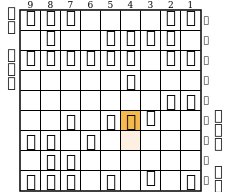

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f
go byoyomi 1000
info currmove S*4g
info time 0 depth 1 nodes 4 score cp 2797 pv S*4g
info currmove S*2h
info time 0 depth 1 nodes 124 score cp 3065 pv 3f2e
info time 1 depth 1 nodes 128 score cp 3067 pv 3f3g+
info currmove 3f3g+
info time 2 depth 2 nodes 354 score cp 3052 pv 3f3g+ 5i5h
info currmove S*2h
info currmove 3f3g+
info time 8 depth 3 nodes 7100 score cp 3067 pv 3f3g+ 4d4c 5b4c
info currmove 3f3g+
info currmove 3f3g+
info time 30 depth 4 nodes 26591 score cp 3052 pv 3f3g+ 4d4c 5b4c 5i5h
info currmove 3f3g+
info time 207 depth 4 nodes 170566 score cp 3055 pv 3i2i 1i1f 3f3g+ 5i5h
info time 501 nodes 409453 score cp 3067 pv 3i2i 1i1f 3f3g+ 5i5h
bestmove 3i2i
38手目


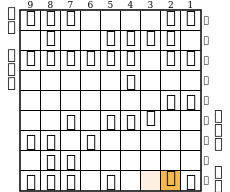

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i
go byoyomi 1000
info currmove 4d4c
info time 13 depth 1 nodes 4 score cp -3882 pv 4d4c
info currmove 4d4c+
info time 13 depth 1 nodes 5 score cp -2872 pv 4d4c+
info currmove 4d4c
info time 29 depth 2 nodes 159 score cp -807 pv 4d4c 5b4c
info currmove 4d4c+
info currmove 4d4c
info time 52 depth 3 nodes 7212 score cp -3062 pv 4d4c 5b4c 4f4i
info currmove 4d4c+
info time 64 depth 3 nodes 17276 score cp -3055 pv 1i1f 3f3g+ 5i5h
info currmove 4d4c
info time 102 depth 4 nodes 37621 score cp -1831 pv 4d4c 5b4c P*4d 2i1i
info currmove 1i1f
info time 188 depth 4 nodes 129031 score cp -1024 pv P*3c 2b3c 4d4c 3b4c
info time 334 nodes 299645 score cp -1024 pv P*3c 2b3c 4d4c 3b4c
bestmove P*3c
39手目


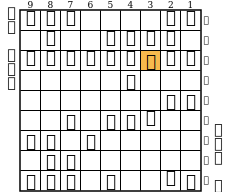

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c
go byoyomi 1000
info currmove 3b3c
info time 0 depth 1 nodes 3 score cp 1004 pv 3b3c
info time 0 depth 1 nodes 121 score cp 1018 pv 4b3c
info time 0 depth 1 nodes 123 score cp 1831 pv 2i1i
info currmove 3b3c
info time 1 depth 2 nodes 338 score cp 3069 pv 3b3c 4d4c+
info currmove 2i1i
info time 1 depth 2 nodes 662 score cp 3083 pv 4b3c 4d4c+
info time 3 depth 2 nodes 1599 score cp 3087 pv 2b3c 4d4c+
info time 3 depth 2 nodes 1975 score cp 3111 pv 3f4g+ 4f4g
info currmove 2i1i
info time 18 depth 3 nodes 15264 score cp -203 pv 2i1i 3c3b+ 4b3b
info currmove 3f4g+
info time 25 depth 3 nodes 21984 score cp 1004 pv 3b3c 4d4c+ 5b4c
info time 33 depth 3 nodes 29780 score cp 1024 pv 2b3c 4d4c+ 3b4c
info currmove 2b3c
info time 45 depth 4 nodes 38135 score cp 3279 pv 2b3c 4d4c+ 

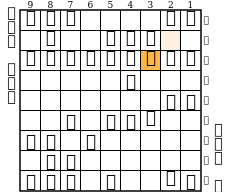

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c
go byoyomi 1000
info currmove 4d4c
info time 14 depth 1 nodes 3 score cp -4097 pv 4d4c
info time 15 depth 1 nodes 81 score cp -3331 pv 4f3f
info time 15 depth 1 nodes 83 score cp -3278 pv 1i1h
info time 15 depth 1 nodes 86 score cp -3087 pv 4d4c+
info currmove 4d4c
info time 28 depth 2 nodes 148 score cp -1024 pv 4d4c 3b4c
info currmove 4d4c+
info currmove 4d4c
info time 42 depth 3 nodes 906 score cp -3279 pv 4d4c 3b4c 4f4i
info currmove 4d4c+
info currmove 4d4c
info time 88 depth 4 nodes 31521 score cp -2048 pv 4d4c 3b4c P*4d 2i1i
info currmove 4d4c
info time 242 nodes 215454 score cp -2048 pv 4d4c 3b4c P*4d 2i1i
bestmove 4d4c
41手目


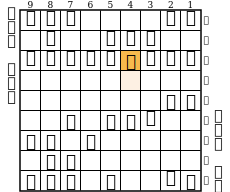

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c
go byoyomi 1000
info currmove 3b4c
info time 0 depth 1 nodes 4 score cp 1024 pv 3b4c
info currmove 3b4c
info currmove 3b4c
info time 0 depth 2 nodes 177 score cp 3279 pv 3b4c 4f4i
info currmove 3b4c
info currmove 3b4c
info time 9 depth 3 nodes 8771 score cp 2048 pv 3b4c P*4d 2i1i
info currmove 3b4c
info currmove 3b4c
info time 105 depth 4 nodes 91178 score cp 3285 pv 3b4c 1i1h 3f2g+ 4f4h
info currmove 3b4c
info time 245 nodes 196861 score cp 3285 pv 3b4c 1i1h 3f2g+ 4f4h
bestmove 3b4c
42手目


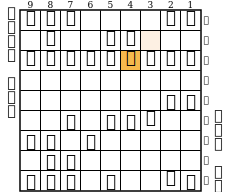

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c
go byoyomi 1000
info currmove P*4d
info time 23 depth 1 nodes 4 score cp -4294 pv P*4d
info currmove 4f4i
info time 23 depth 1 nodes 5 score cp -3279 pv 4f4i
info currmove P*4d
info time 49 depth 2 nodes 398 score cp -2048 pv P*4d 2i1i
info currmove 4f4i
info currmove P*4d
info time 83 depth 3 nodes 9140 score cp -3328 pv P*4d 3f4g+ 4f4g
info currmove 4f4i
info time 97 depth 3 nodes 20114 score cp -3285 pv 1i1h 3f2g+ 4f4h
info currmove 1i1h
info time 159 depth 4 nodes 83161 score cp -3285 pv 1i1h 3f3g 4f3f 3g2h+
info currmove P*4d
info time 187 depth 4 nodes 112216 score cp -2283 pv P*4d 4c4d 8h4d 3c4d
info time 501 nodes 470697 score cp -3285 pv P*4d 4c4d 8h4d 3c4d
bestmove P*4d
43手目


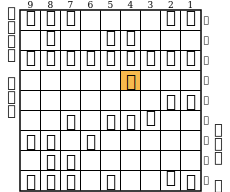

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d
go byoyomi 1000
info currmove 2i1i
info time 0 depth 1 nodes 4 score cp 2048 pv 2i1i
info currmove 3f4g+
info currmove 2i1i
info time 1 depth 2 nodes 368 score cp 2058 pv 2i1i 4d4c
info currmove 3f4g+
info time 1 depth 2 nodes 500 score cp 3328 pv 3f4g+ 4f4g
info currmove 2i1i
info time 9 depth 3 nodes 9224 score cp 8 pv 2i1i 4d4c 5b4c
info currmove 3f4g+
info time 15 depth 3 nodes 16490 score cp 1027 pv 3f2e 4d4c 5b4c
info time 21 depth 3 nodes 23140 score cp 2461 pv 4c4d 2e2d 2i1i
info currmove 4c4d
info time 63 depth 4 nodes 57043 score cp 2791 pv 4c4d 8h4d 3c4d 4f4d
info currmove 3f4g+
info time 184 depth 4 nodes 142510 score cp 3365 pv 4c3d 1i1h 3f2g+ B*3f
info time 487 nodes 361703 score cp 3365 pv 4c3d 1i1h 3f2g+ B*3f
bestmove 4c3d
44手目


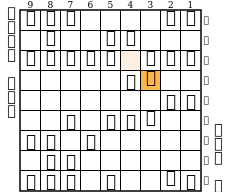

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d
go byoyomi 1000
info currmove 2e2d
info time 11 depth 1 nodes 4 score cp -4282 pv 2e2d
info currmove 4f4i
info time 11 depth 1 nodes 5 score cp -3269 pv 4f4i
info currmove 2e2d
info time 25 depth 2 nodes 371 score cp -2241 pv 2e2d 2i1i
info currmove 4f4i
info currmove 2e2d
info time 51 depth 3 nodes 14627 score cp -4232 pv 2e2d N*4g 5i5h
info currmove 4f4i
info time 66 depth 3 nodes 26491 score cp -3787 pv 4f3f S*2g 3f2f
info time 77 depth 3 nodes 34612 score cp -3365 pv 1i1h 3f2g+ B*3f
info currmove 1i1h
info time 127 depth 4 nodes 83222 score cp -3365 pv 1i1h 3f2g+ B*3f 2g2f
info currmove 2e2d
info time 173 depth 4 nodes 128237 score cp -2986 pv 2e2d 3d3e 4f4i 2i1i
info time 389 nodes 383185 score cp -2986 pv 2e2d 3d3e 4f4i 2i1i
bestmove 2e2

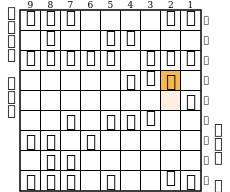

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d
go byoyomi 1000
info currmove N*4g
info time 0 depth 1 nodes 3 score cp 967 pv N*4g
info time 0 depth 1 nodes 137 score cp 1223 pv 2c2d
info time 0 depth 1 nodes 139 score cp 2241 pv 2i1i
info currmove 2i1i
info time 0 depth 2 nodes 369 score cp 3001 pv 2i1i 2d2c+
info currmove N*4g
info time 1 depth 2 nodes 494 score cp 4232 pv N*4g 5i5h
info currmove 2i1i
info time 19 depth 3 nodes 14990 score cp 2466 pv 2i1i 2d2c+ 3f3g+
info currmove N*4g
info time 25 depth 3 nodes 22157 score cp 2552 pv 2c2d B*1h 2i1i
info time 33 depth 3 nodes 30773 score cp 2986 pv 3d3e 4f4i 2i1i
info currmove 3d3e
info time 94 depth 4 nodes 73104 score cp 4042 pv 3d3e 4f4h N*4g 4h4i
info currmove N*4g
info time 501 nodes 373584 score cp 2986 pv 3d3e 4f4h N*4g 4h4i


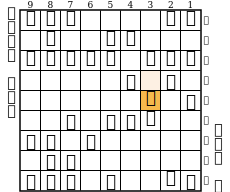

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e
go byoyomi 1000
info currmove 4f4i
info time 14 depth 1 nodes 4 score cp -3257 pv 4f4i
info currmove 4f4i
info currmove 4f4i
info time 30 depth 2 nodes 380 score cp -2986 pv 4f4i 2i1i
info currmove 4f4i
info currmove 4f4i
info time 55 depth 3 nodes 9139 score cp -4247 pv 4f4i N*3g 4i4h
info currmove 4f4i
info time 66 depth 3 nodes 17736 score cp -4042 pv 4f4h N*4g 4h4i
info currmove 4f4i
info time 121 depth 4 nodes 58359 score cp -3238 pv 4f4i N*3g 4i4h 2c2d
info currmove 4f4h
info time 318 nodes 265653 score cp -3238 pv 4f4i N*3g 4i4h 2c2d
bestmove 4f4i
47手目


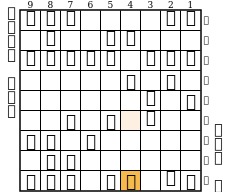

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i
go byoyomi 1000
info time 0 depth 1 nodes 138 score cp 1968 pv 2c2d
info time 0 depth 1 nodes 139 score cp 2986 pv 2i1i
info currmove 2i1i
info time 0 depth 2 nodes 368 score cp 3001 pv 2i1i 2d2c+
info time 1 depth 2 nodes 630 score cp 3045 pv 2c2d 4i2i
info time 1 depth 2 nodes 759 score cp 4247 pv N*3g 4i4h
info currmove 2i1i
info time 8 depth 3 nodes 9559 score cp 2256 pv 2i1i 2d2c+ 1i1h
info currmove N*3g
info time 13 depth 3 nodes 14098 score cp 3238 pv N*3g 4i4h 2c2d
info currmove N*3g
info time 55 depth 4 nodes 46634 score cp 3542 pv N*3g 4i4h S*4g 4h1h
info currmove N*3g
info time 159 depth 4 nodes 133239 score cp 4351 pv S*3h 4i4h N*4g 5i5h
info time 501 nodes 387209 score cp 3238 pv S*3h 4i4h N*4g 5i5h
bestmove S*3h
48

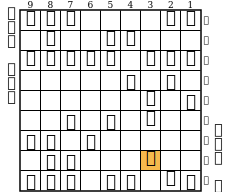

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h
go byoyomi 1000
info currmove 2d2c+
info time 13 depth 1 nodes 4 score cp -3752 pv 2d2c+
info currmove 4i4h
info currmove 2d2c+
info time 27 depth 2 nodes 316 score cp -3762 pv 2d2c+ 3h4i+
info currmove 4i4h
info time 27 depth 2 nodes 494 score cp -2181 pv 4i4h 2i1i
info currmove 2d2c+
info time 54 depth 3 nodes 12494 score cp -6077 pv 2d2c+ 3h4i+ 5i4i
info currmove 4i4h
info time 63 depth 3 nodes 19049 score cp -4172 pv 4i4h N*4g 5i5h
info currmove 4i4h
info time 116 depth 4 nodes 52067 score cp -3423 pv 4i4h 3f3g+ 4h5h 2c2d
info currmove 4i4h
info time 127 depth 4 nodes 61217 score cp -3018 pv 2d2c+ 3h4i+ 2c3c 4b3c
info time 258 nodes 194168 score cp -3018 pv 2d2c+ 3h4i+ 2c3c 4b3c
bestmove 2d2c+
49手目


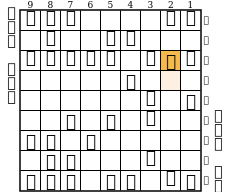

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+
go byoyomi 1000
info currmove 3h4i+
info time 0 depth 1 nodes 4 score cp 3762 pv 3h4i+
info currmove 3h4i+
info currmove 3h4i+
info time 1 depth 2 nodes 336 score cp 6059 pv 3h4i+ 5i4i
info currmove 3h4i+
info currmove 3h4i+
info time 10 depth 3 nodes 8045 score cp 3018 pv 3h4i+ 2c3c 4b3c
info currmove 3h4i+
info currmove 3h4i+
info time 37 depth 4 nodes 30986 score cp 5361 pv 3h4i+ 2c3c 4b3c 5i4i
info currmove 3h4i+
info time 186 nodes 146343 score cp 5361 pv 3h4i+ 2c3c 4b3c 5i4i
bestmove 3h4i+
50手目


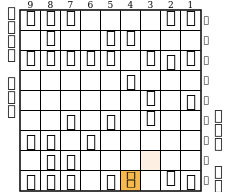

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+
go byoyomi 1000
info currmove 5i4i
info time 17 depth 1 nodes 4 score cp -6051 pv 5i4i
info currmove 2c3c
info currmove 5i4i
info time 35 depth 2 nodes 393 score cp -5308 pv 5i4i 2i1i
info currmove 2c3c
info time 35 depth 2 nodes 407 score cp -3018 pv 2c3c 4b3c
info currmove 5i4i
info time 70 depth 3 nodes 14640 score cp -6227 pv 5i4i P*4h 4i5h
info currmove 2c3c
info time 71 depth 3 nodes 15421 score cp -5361 pv 2c3c 4b3c 5i4i
info currmove 2c3c
info time 121 depth 4 nodes 45895 score cp -3231 pv 2c3c 4b3c 4d4c+ 3c4c
info currmove 2c3c
info time 366 nodes 266932 score cp -3231 pv 2c3c 4b3c 4d4c+ 3c4c
bestmove 2c3c
51手目


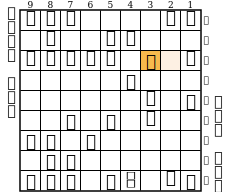

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c
go byoyomi 1000
info currmove 4b3c
info time 3 depth 1 nodes 4 score cp 3018 pv 4b3c
info currmove 4b3c
info currmove 4b3c
info time 3 depth 2 nodes 229 score cp 5361 pv 4b3c 5i4i
info currmove 4b3c
info currmove 4b3c
info time 13 depth 3 nodes 11098 score cp 3231 pv 4b3c 4d4c+ 3c4c
info currmove 4b3c
info currmove 4b3c
info time 58 depth 4 nodes 55502 score cp 5574 pv 4b3c 4d4c+ 3c4c 5i4i
info currmove 4b3c
info time 120 nodes 111946 score cp 5574 pv 4b3c 4d4c+ 3c4c 5i4i
bestmove 4b3c
52手目


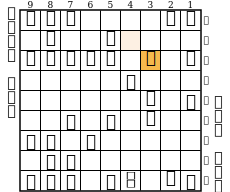

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c
go byoyomi 1000
info currmove 5i4i
info time 44 depth 1 nodes 4 score cp -5307 pv 5i4i
info currmove 4d4c+
info currmove 5i4i
info time 101 depth 2 nodes 480 score cp -5309 pv 5i4i 2i1i
info currmove 4d4c+
info time 101 depth 2 nodes 492 score cp -3231 pv 4d4c+ 3c4c
info currmove 5i4i
info time 120 depth 3 nodes 16841 score cp -5793 pv 5i4i R*4g S*5h
info currmove 4d4c+
info time 121 depth 3 nodes 17549 score cp -5574 pv 4d4c+ 3c4c 5i4i
info currmove 4d4c+
info time 145 depth 4 nodes 41241 score cp -3091 pv 4d4c+ 3c4c S*4d 4c3d
info currmove 4d4c+
info time 490 nodes 437415 score cp -3091 pv 4d4c+ 3c4c S*4d 4c3d
bestmove 4d4c+
53手目


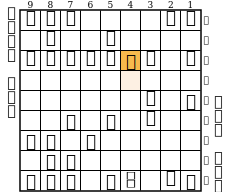

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+
go byoyomi 1000
info currmove 3c4c
info time 0 depth 1 nodes 4 score cp 3231 pv 3c4c
info currmove 3c4c
info currmove 3c4c
info time 1 depth 2 nodes 254 score cp 5574 pv 3c4c 5i4i
info currmove 3c4c
info currmove 3c4c
info time 12 depth 3 nodes 12772 score cp 3231 pv 3c4c P*4d 4c3b
info currmove 3c4c
info currmove 3c4c
info time 60 depth 4 nodes 58885 score cp 5546 pv 3c4c S*4d 4c3b 4d3e
info currmove 3c4c
info time 115 nodes 106357 score cp 5546 pv 3c4c S*4d 4c3b 4d3e
bestmove 3c4c
54手目


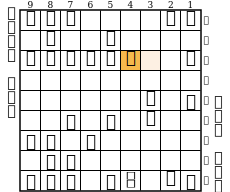

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c
go byoyomi 1000
info currmove 5i4i
info time 29 depth 1 nodes 4 score cp -5520 pv 5i4i
info currmove S*4d
info currmove 5i4i
info time 58 depth 2 nodes 507 score cp -4290 pv 5i4i 2a3c
info currmove S*4d
info time 58 depth 2 nodes 519 score cp -3291 pv S*4d 4c3d
info time 58 depth 2 nodes 791 score cp -3231 pv P*4d 4c3b
info currmove 5i4i
info time 110 depth 3 nodes 18352 score cp -6006 pv 5i4i R*4g S*5h
info currmove P*4d
info time 111 depth 3 nodes 19057 score cp -5574 pv P*4d 4c3b 5i4i
info time 128 depth 3 nodes 35724 score cp -5546 pv S*4d 4c3b 4d3e
info currmove S*4d
info time 161 depth 4 nodes 67489 score cp -3301 pv S*4d 4c3b P*3c 2a3c
info currmove P*4d
info time 501 nodes 474171 sco

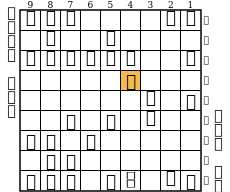

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d
go byoyomi 1000
info currmove 4c3d
info time 1 depth 1 nodes 4 score cp 3291 pv 4c3d
info currmove 4c3b
info currmove 4c3d
info time 1 depth 2 nodes 173 score cp 5536 pv 4c3d 4d3e
info currmove 4c3b
info time 1 depth 2 nodes 326 score cp 5546 pv 4c3b 4d3e
info currmove 4c3d
info time 12 depth 3 nodes 8248 score cp 2881 pv 4c3d 4d3e 3d3e
info currmove 4c3b
info time 20 depth 3 nodes 15927 score cp 3301 pv 4c3b P*3c 2a3c
info currmove 4c3b
info time 79 depth 4 nodes 69249 score cp 5327 pv 4c3b 4d3e 4i5i 8h1a+
info currmove 4c3b
info time 115 nodes 101471 score cp 5327 pv 4c3b 4d3e 4i5i 8h1a+
bestmove 4c3b
56手目


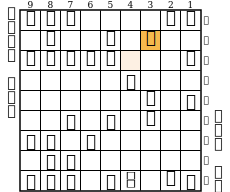

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b
go byoyomi 1000
info currmove 4d3e
info time 19 depth 1 nodes 4 score cp -5546 pv 4d3e
info currmove P*3c
info currmove 4d3e
info time 42 depth 2 nodes 417 score cp -4106 pv 4d3e 4i5i
info currmove P*3c
info time 42 depth 2 nodes 433 score cp -3301 pv P*3c 2a3c
info currmove 4d3e
info time 82 depth 3 nodes 17513 score cp -5327 pv 4d3e 4i5i 8h1a+
info currmove P*3c
info currmove 4d3e
info time 133 depth 4 nodes 68894 score cp -4167 pv 4d3e 4i5i G*2b 3b4b
info currmove P*3c
info time 346 depth 4 nodes 280535 score cp -3987 pv B*6e 3b2c 4d3e 4i5i
info time 417 nodes 348489 score cp -3987 pv B*6e 3b2c 4d3e 4i5i
bestmove B*6e
57手目


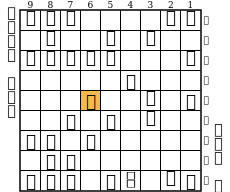

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e
go byoyomi 1000
info currmove N*4c
info time 0 depth 1 nodes 4 score cp 3356 pv N*4c
info currmove N*4c
info currmove N*4c
info time 1 depth 2 nodes 115 score cp 5601 pv N*4c 4d3e
info currmove N*4c
info time 1 depth 2 nodes 223 score cp 5644 pv 3b2b 4d3e
info currmove 3b2b
info time 7 depth 3 nodes 5112 score cp 934 pv 3b2b 4d3e 2a3c
info currmove N*4c
info time 11 depth 3 nodes 8088 score cp 3566 pv N*4c P*3c 2a3c
info time 23 depth 3 nodes 18546 score cp 3987 pv 3b2c 4d3e 4i5i
info currmove 3b2b
info time 33 depth 4 nodes 26855 score cp 3296 pv 3b2b 4d3e 2a3c 5i4i
info currmove 3b2c
info time 50 depth 4 nodes 45474 score cp 5217 pv 3b2c 4d3e 4i5i 6e2a+
info time 67 depth 4 

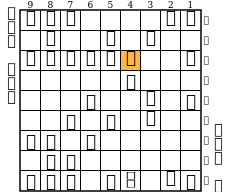

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c
go byoyomi 1000
info currmove P*3c
info time 27 depth 1 nodes 3 score cp -8056 pv P*3c
info time 27 depth 1 nodes 59 score cp -5645 pv 5i4i
info time 27 depth 1 nodes 66 score cp -5601 pv 4d3e
info currmove 4d3e
info time 55 depth 2 nodes 267 score cp -4161 pv 4d3e 4i5i
info currmove P*3c
info time 55 depth 2 nodes 283 score cp -3566 pv P*3c 2a3c
info currmove 4d3e
info time 91 depth 3 nodes 8314 score cp -6202 pv 4d3e 4i5i 8h1a+
info currmove P*3c
info time 91 depth 3 nodes 8590 score cp -5811 pv P*3c 2a3c 4d3e
info time 100 depth 3 nodes 16819 score cp -5703 pv 5i4i P*4h 4d3e
info currmove 5i4i
info time 134 depth 4 nodes 45913 score cp -4102 pv 5i4i 3e4f 4d4c 5b4c
info

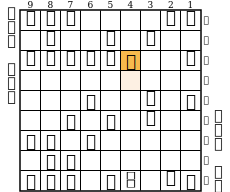

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c
go byoyomi 1000
info currmove 5b4c
info time 0 depth 1 nodes 4 score cp 3946 pv 5b4c
info currmove 5b4c
info currmove 5b4c
info time 0 depth 2 nodes 163 score cp 6217 pv 5b4c 5i4i
info currmove 5b4c
info currmove 5b4c
info time 9 depth 3 nodes 8218 score cp 3977 pv 5b4c N*2d 3b4b
info currmove 5b4c
info currmove 5b4c
info time 31 depth 4 nodes 33241 score cp 6321 pv 5b4c N*2d 3b4b 5i4i
info currmove 5b4c
info time 61 nodes 63628 score cp 6321 pv 5b4c N*2d 3b4b 5i4i
bestmove 5b4c
60手目


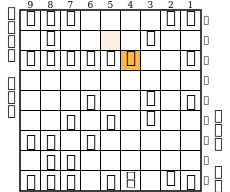

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c
go byoyomi 1000
info currmove N*2d
info time 43 depth 1 nodes 3 score cp -8691 pv N*2d
info time 43 depth 1 nodes 97 score cp -6235 pv 5i4i
info currmove 5i4i
info time 83 depth 2 nodes 421 score cp -5005 pv 5i4i 2a3c
info currmove N*2d
info time 83 depth 2 nodes 433 score cp -3977 pv N*2d 3b4b
info currmove 5i4i
info time 115 depth 3 nodes 16910 score cp -6721 pv 5i4i R*4g S*5h
info currmove N*2d
info time 115 depth 3 nodes 17186 score cp -6321 pv N*2d 3b4b 5i4i
info currmove N*2d
info time 129 depth 4 nodes 31261 score cp -4617 pv N*2d 3b4b 6e4c+ 4b4c
info currmove N*2d
info time 285 depth 4 nodes 186775 score cp -4445 pv 6e4c+ 3b4c G*4d 4c3b
info time 311 dep

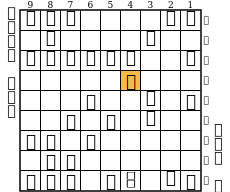

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d
go byoyomi 1000
info currmove 4i5i
info time 1 depth 1 nodes 4 score cp 5076 pv 4i5i
info currmove 4i5i
info currmove 4i5i
info time 1 depth 2 nodes 393 score cp 6331 pv 4i5i 4d4c+
info currmove 4i5i
info time 2 depth 2 nodes 666 score cp 7426 pv 4c5d 6e5d
info currmove 4i5i
info time 16 depth 3 nodes 16516 score cp 3667 pv 4i5i 4d4c+ 3b3a
info currmove 4c5d
info time 23 depth 3 nodes 23765 score cp 3979 pv 4c5d N*2d 3b2b
info currmove 4c5d
info time 37 depth 4 nodes 35421 score cp 7069 pv 4c5d N*2d 3b2b 6e5d
info currmove 4c5d
info time 223 nodes 227436 score cp 7069 pv 4c5d N*2d 3b2b 6e5d
bestmove 4c5d
62手目


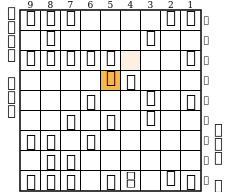

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d
go byoyomi 1000
info currmove N*2d
info time 3 depth 1 nodes 3 score cp -9911 pv N*2d
info time 3 depth 1 nodes 71 score cp -8685 pv 5i4i
info time 3 depth 1 nodes 72 score cp -7426 pv 6e5d
info currmove 6e5d
info time 6 depth 2 nodes 143 score cp -5177 pv 6e5d 5c5d
info currmove N*2d
info time 6 depth 2 nodes 159 score cp -3979 pv N*2d 3b2b
info currmove 6e5d
info time 10 depth 3 nodes 1438 score cp -7476 pv 6e5d 5c5d 5i4i
info currmove N*2d
info time 10 depth 3 nodes 1684 score cp -7069 pv N*2d 3b2b 6e5d
info currmove N*2d
info time 38 depth 4 nodes 24811 score cp -5403 pv N*2d 3b3a 6e5d 4i5i
info currmove N*2d
info time 69 depth 4 nodes 56269 score 

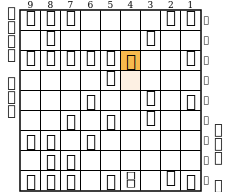

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+
go byoyomi 1000
info currmove 3b4c
info time 1 depth 1 nodes 4 score cp 4146 pv 3b4c
info currmove 3b4c
info currmove 3b4c
info time 1 depth 2 nodes 138 score cp 7636 pv 3b4c 6e5d
info currmove 3b4c
info currmove 3b4c
info time 9 depth 3 nodes 7977 score cp 4191 pv 3b4c N*5e 4c3b
info currmove 3b4c
info currmove 3b4c
info time 16 depth 4 nodes 14205 score cp 7681 pv 3b4c N*5e 4c3b 6e5d
info currmove 3b4c
info time 59 nodes 56223 score cp 7681 pv 3b4c N*5e 4c3b 6e5d
bestmove 3b4c
64手目


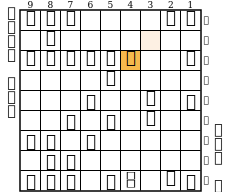

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c
go byoyomi 1000
info currmove N*5e
info time 3 depth 1 nodes 3 score cp -10121 pv N*5e
info time 3 depth 1 nodes 76 score cp -8895 pv 5i4i
info time 3 depth 1 nodes 77 score cp -7636 pv 6e5d
info currmove 6e5d
info time 5 depth 2 nodes 140 score cp -5387 pv 6e5d 5c5d
info currmove N*5e
info time 5 depth 2 nodes 156 score cp -4191 pv N*5e 4c3b
info currmove 6e5d
info time 9 depth 3 nodes 1093 score cp -7748 pv 6e5d 4c5d 5i4i
info currmove N*5e
info time 9 depth 3 nodes 1325 score cp -7681 pv N*5e 4c3b 6e5d
info currmove N*5e
info time 25 depth 4 nodes 11316 score cp -5432 pv N*5e 4c3b 6e5d 5c5d
info currmove N*5e
info time 72 depth 4 nodes 57

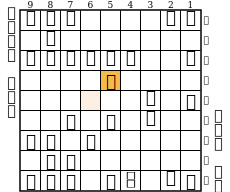

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d
go byoyomi 1000
info currmove 5c5d
info time 0 depth 1 nodes 4 score cp 5387 pv 5c5d
info currmove 5c5d
info currmove 5c5d
info time 0 depth 2 nodes 213 score cp 7676 pv 5c5d 5i4i
info currmove 5c5d
info time 1 depth 2 nodes 415 score cp 7748 pv 4c5d 5i4i
info currmove 4c5d
info time 15 depth 3 nodes 15410 score cp 5384 pv 4c5d 5f5e 5d6e
info currmove 5c5d
info time 30 depth 3 nodes 30663 score cp 5467 pv 5c5d G*4d 4c3b
info currmove 4c5d
info time 65 depth 4 nodes 73555 score cp 7746 pv 4c5d 5f5e 5d6e 5i4i
info currmove 5c5d
info time 103 depth 4 nodes 114168 score cp 7842 pv 5c5d G*4d 4c3b 5i4i
info time 147 nodes 159568 score cp 7842

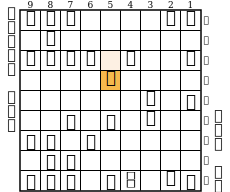

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d
go byoyomi 1000
info currmove 5i4i
info time 2 depth 1 nodes 4 score cp -7676 pv 5i4i
info currmove G*4d
info currmove 5i4i
info time 4 depth 2 nodes 571 score cp -6446 pv 5i4i 8b1b
info currmove G*4d
info time 4 depth 2 nodes 581 score cp -5467 pv G*4d 4c3b
info currmove 5i4i
info time 31 depth 3 nodes 27807 score cp -8162 pv 5i4i R*4g S*5h
info currmove G*4d
info time 32 depth 3 nodes 28072 score cp -7842 pv G*4d 4c3b 5i4i
info currmove G*4d
info time 75 depth 4 nodes 70992 score cp -7629 pv G*4d 4c5b 5i4i 2i1i
info currmove G*4d
info time 189 depth 4 nodes 192834 score cp -6932 pv 5i4i B*4f S*6h 4f1i+
info time 501 nodes 556250 

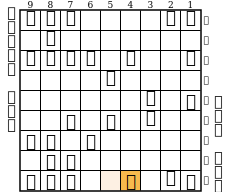

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i
go byoyomi 1000
info currmove 8b1b
info time 10 depth 1 nodes 4 score cp 5377 pv 8b1b
info currmove R*4g
info currmove 8b1b
info time 19 depth 2 nodes 652 score cp 5378 pv 8b1b 1i1h
info currmove R*4g
info time 20 depth 2 nodes 921 score cp 6508 pv R*4g 8h1a+
info time 21 depth 2 nodes 1361 score cp 6519 pv B*4f 7i6i
info time 21 depth 2 nodes 1639 score cp 6612 pv P*4h 4i5h
info currmove 8b1b
info time 50 depth 3 nodes 23361 score cp 3986 pv 8b1b N*2d 2i1i
info currmove P*4h
info time 70 depth 3 nodes 43435 score cp 5037 pv P*4h S*4d 4c3d
info time 92 depth 3 nodes 69914 score cp 5187 pv 2i1i 8h1a+ 4c3b
info time 111 depth 3 

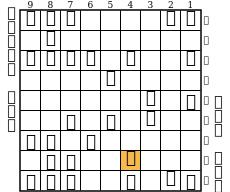

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h
go byoyomi 1000
info currmove 4i5h
info time 20 depth 1 nodes 4 score cp -6612 pv 4i5h
info currmove 4i5h
info currmove 4i5h
info time 40 depth 2 nodes 636 score cp -5191 pv 4i5h 2i1i
info currmove 4i5h
info time 43 depth 2 nodes 3546 score cp -5037 pv S*4d 4c3d
info currmove 4i5h
info time 105 depth 3 nodes 46219 score cp -6557 pv 4i5h R*4i N*6i
info currmove S*4d
info time 106 depth 3 nodes 46857 score cp -6552 pv S*4d 4c3b 4d3e
info currmove S*4d
info time 154 depth 4 nodes 96691 score cp -3607 pv S*4d 4c3d 4d3e 3d3e
info currmove S*4d
info time 501 nodes 465631 score cp -6552 pv S*4d 4c3d 4d3e 3d3e
bestmove S*4d
69手目


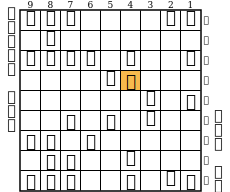

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d
go byoyomi 1000
info currmove 4c3d
info time 0 depth 1 nodes 4 score cp 5037 pv 4c3d
info currmove 4c3b
info currmove 4c3d
info time 0 depth 2 nodes 210 score cp 6542 pv 4c3d 4d3e
info currmove 4c3b
info time 0 depth 2 nodes 404 score cp 6552 pv 4c3b 4d3e
info currmove 4c3d
info time 16 depth 3 nodes 14499 score cp 3607 pv 4c3d 4d3e 3d3e
info currmove 4c3b
info currmove 4c3d
info time 37 depth 4 nodes 35460 score cp 6262 pv 4c3d 4d3e 3d3e 4i5h
info currmove 4c3b
info time 76 depth 4 nodes 71754 score cp 6464 pv 4c3b 4d3e B*5g 7i6i
info time 101 nodes 101899 score cp 6464 pv 4c3b 4d3e B*5g 7i6i
bestmove 4c3b
70手目


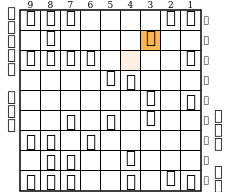

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b
go byoyomi 1000
info currmove 4d3e
info time 13 depth 1 nodes 4 score cp -6552 pv 4d3e
info currmove G*4c
info currmove 4d3e
info time 27 depth 2 nodes 524 score cp -5107 pv 4d3e 4h4i+
info currmove G*4c
info time 27 depth 2 nodes 534 score cp -3075 pv G*4c 3b2b
info time 28 depth 2 nodes 1303 score cp -3040 pv N*2d 3b2b
info currmove 4d3e
info time 67 depth 3 nodes 27775 score cp -6464 pv 4d3e B*5g 7i6i
info currmove N*2d
info currmove 4d3e
info time 139 depth 4 nodes 92336 score cp -5138 pv 4d3e 4h4i+ N*2d 3b3a
info currmove N*2d
info time 501 nodes 446031 score cp -6464 pv 4d3e 4h4i+ N*2d 3b3a
bestmove 4d3e
7

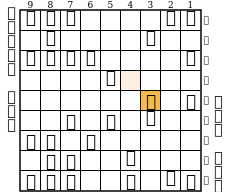

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e
go byoyomi 1000
info time 5 depth 1 nodes 201 score cp 5107 pv 4h4i+
info currmove 4h4i+
info time 11 depth 2 nodes 525 score cp 6328 pv 4h4i+ 8h1a+
info time 11 depth 2 nodes 754 score cp 6464 pv B*5g 7i6i
info currmove 4h4i+
info time 34 depth 3 nodes 20294 score cp 5138 pv 4h4i+ N*2d 3b3a
info currmove B*5g
info currmove 4h4i+
info time 108 depth 4 nodes 103395 score cp 5951 pv 4h4i+ N*2d 3b4b 8h1a+
info currmove B*5g
info time 153 depth 4 nodes 142935 score cp 6905 pv B*5g G*6h 5g6h+ 7h6h
info time 501 nodes 526514 score cp 5138 pv B*5g G*6h 5g6h+ 7h6h
bestmove B*5g
72手目


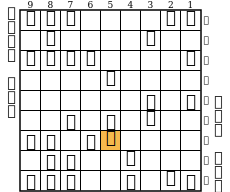

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g
go byoyomi 1000
info currmove 7i6i
info time 0 depth 1 nodes 4 score cp -6464 pv 7i6i
info currmove 7h6h
info currmove 7i6i
info time 1 depth 2 nodes 278 score cp -5019 pv 7i6i 4h4i+
info currmove 7h6h
info time 2 depth 2 nodes 544 score cp -3740 pv 7h6h 5g3e+
info currmove 7i6i
info time 17 depth 3 nodes 13611 score cp -7260 pv 7i6i 4h4i+ 8h1a+
info currmove 7h6h
info time 31 depth 3 nodes 26938 score cp -6608 pv 7h6h 5g6h+ 7i6h
info time 45 depth 3 nodes 40051 score cp -6452 pv G*6h 5g3e+ 4i5h
info currmove 7h6h
info time 81 depth 4 nodes 71472 score cp -5586 pv 7h6h 5g6h+ 7i6h 4h4i+
info currmove G*

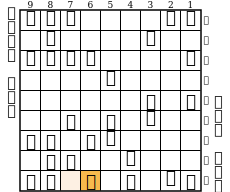

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i
go byoyomi 1000
info currmove 4h4i+
info time 7 depth 1 nodes 4 score cp 5019 pv 4h4i+
info currmove 4h4i+
info currmove 4h4i+
info time 14 depth 2 nodes 465 score cp 7260 pv 4h4i+ 8h1a+
info currmove 4h4i+
info currmove 4h4i+
info time 38 depth 3 nodes 17238 score cp 5050 pv 4h4i+ N*2d 3b3a
info currmove 4h4i+
info currmove 4h4i+
info time 95 depth 4 nodes 61870 score cp 6883 pv 4h4i+ N*2d 3b4b 8h1a+
info currmove 4h4i+
info time 501 nodes 447360 score cp 5050 pv 4h4i+ N*2d 3b4b 8h1a+
bestmove 4h4i+
74手目


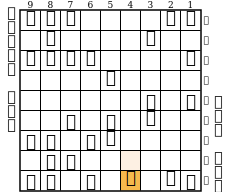

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+
go byoyomi 1000
info currmove 8h1a+
info time 37 depth 1 nodes 4 score cp -7260 pv 8h1a+
info currmove N*2d
info currmove 8h1a+
info time 70 depth 2 nodes 585 score cp -7265 pv 8h1a+ 5g3e+
info currmove N*2d
info time 70 depth 2 nodes 599 score cp -5050 pv N*2d 3b3a
info currmove 8h1a+
info time 106 depth 3 nodes 5211 score mate - pv 8h1a+ G*5i G*4f
info currmove N*2d
info time 107 depth 3 nodes 5741 score cp -6883 pv N*2d 3b4b 8h1a+
info currmove N*2d
info time 166 depth 4 nodes 52675 score cp -5265 pv N*2d 3b3a 8h4d 2i1i
info currmove N*2d
info time 477 depth 4 nodes 380585 score cp -4736 

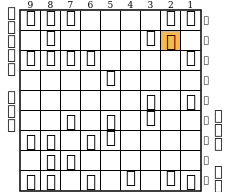

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b
go byoyomi 1000
info currmove 3b4b
info time 1 depth 1 nodes 4 score cp 5080 pv 3b4b
info currmove 3b4b
info currmove 3b4b
info time 1 depth 2 nodes 214 score cp 7330 pv 3b4b 2b2a
info currmove 3b4b
info currmove 3b4b
info time 20 depth 3 nodes 17009 score cp 5113 pv 3b4b N*3d 4b4a
info currmove 3b4b
info time 39 depth 3 nodes 34285 score cp 5115 pv 3b4a N*5c 4a4b
info currmove 3b4b
info time 99 depth 4 nodes 91326 score cp 7363 pv 3b4b N*3d 4b4a 2b2a
info currmove 3b4a
info time 157 depth 4 nodes 139521 score cp 7365 pv 3b4a N*5c 4a4b 2b2a
info time 164 nodes 144543 score cp 7365 pv 3b

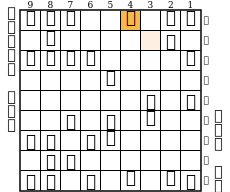

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a
go byoyomi 1000
info currmove G*3a
info time 15 depth 1 nodes 3 score cp -8833 pv G*3a
info time 15 depth 1 nodes 128 score cp -7524 pv 2b1a
info time 15 depth 1 nodes 129 score cp -7328 pv 2b2a
info currmove 2b2a
info time 31 depth 2 nodes 585 score cp -6103 pv 2b2a 5g3e+
info currmove G*3a
info time 31 depth 2 nodes 595 score cp -5150 pv G*3a 4a4b
info time 31 depth 2 nodes 804 score cp -5115 pv N*5c 4a4b
info currmove 2b2a
info time 49 depth 3 nodes 5318 score mate - pv 2b2a G*5i 8h1a+
info currmove N*5c
info time 49 depth 3 nodes 5642 score cp -7365 pv N*5c 4a4b 2b2a
info currm

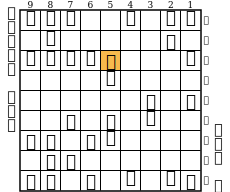

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c
go byoyomi 1000
info currmove 4a4b
info time 0 depth 1 nodes 4 score cp 5115 pv 4a4b
info currmove 4a4b
info currmove 4a4b
info time 0 depth 2 nodes 156 score cp 7365 pv 4a4b 2b2a
info currmove 4a4b
info currmove 4a4b
info time 13 depth 3 nodes 11601 score cp 5999 pv 4a4b G*2f 4b5c
info currmove 4a4b
info currmove 4a4b
info time 55 depth 4 nodes 47497 score cp 8798 pv 4a4b 5c4a+ 4b4a 2b2a
info currmove 4a4b
info time 189 depth 4 nodes 164180 score cp 8799 pv 4a5b 8h7g 5g3e+ 2b2a
info time 268 nodes 227704 score cp 8799 pv 4a5b 8h7g 5g3e+ 2b2a
bestmove 4a5b
78手目


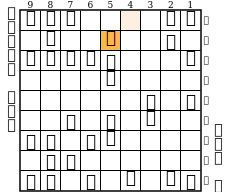

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b
go byoyomi 1000
info currmove 2b2a
info time 2 depth 1 nodes 4 score cp -7359 pv 2b2a
info currmove G*2f
info currmove 2b2a
info time 4 depth 2 nodes 507 score cp -6134 pv 2b2a 5g3e+
info currmove G*2f
info time 5 depth 2 nodes 851 score cp -5999 pv G*2f 5b5c
info currmove 2b2a
info time 35 depth 3 nodes 18166 score mate - pv 2b2a G*5i 3e4d
info currmove G*2f
info time 101 depth 3 nodes 73389 score cp -8812 pv 7h6h 5g3e+ 2b2a
info time 155 depth 3 nodes 120750 score cp -8799 pv 8h7g 5g3e+ 2b2a
info currmove G*2f
info time 164 depth 4 nodes 128638 score mate - pv G*2f G*5i

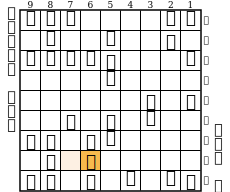

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h
go byoyomi 1000
info time 101 depth 1 nodes 219 score cp 7377 pv 5g3e+
info currmove 5g3e+
info time 102 depth 2 nodes 496 score cp 8812 pv 5g3e+ 2b2a
info currmove 5g3e+
info time 115 depth 3 nodes 12164 score cp 7573 pv 5g3e+ 2b1a 3e5c
info currmove 5g3e+
info currmove 5g3e+
info time 208 depth 4 nodes 98411 score cp 8786 pv 5g3e+ 2b2a 3e6h 6i6h
info currmove 5g3e+
info time 463 depth 4 nodes 358934 score cp 9089 pv R*5i 6i7h 5g6h+ 7h6h
info time 501 nodes 391466 score cp 7573 pv R*5i 6i7h 5g6h+ 7h6h
bestmove R*5i
80手目


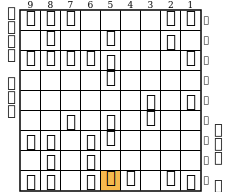

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i
go byoyomi 1000
info currmove 6i7h
info time 0 depth 1 nodes 4 score cp -8717 pv 6i7h
info currmove 6i7h
info currmove 6i7h
info time 0 depth 2 nodes 291 score cp -7272 pv 6i7h 5g3e+
info currmove 6i7h
info currmove 6i7h
info time 12 depth 3 nodes 9585 score cp -8707 pv 6i7h 5g3e+ 2b2a
info currmove 6i7h
info currmove 6i7h
info time 49 depth 4 nodes 44461 score cp -7468 pv 6i7h 5g3e+ 2b1a 3e5c
info currmove 6i7h
info time 49 nodes 44463 score cp -7468 pv 6i7h 5g3e+ 2b1a 3e5c
bestmove 6i7h
81手目


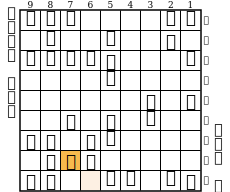

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h
go byoyomi 1000
info currmove 5g6h+
info time 79 depth 1 nodes 3 score cp 5238 pv 5g6h+
info time 80 depth 1 nodes 177 score cp 7272 pv 5g3e+
info currmove 5g3e+
info time 101 depth 2 nodes 414 score cp 8707 pv 5g3e+ 2b2a
info currmove 5g6h+
info currmove 5g3e+
info time 110 depth 3 nodes 9353 score cp 7468 pv 5g3e+ 2b1a 3e5c
info currmove 5g3e+
info currmove 5g3e+
info time 181 depth 4 nodes 71087 score cp 8898 pv 5g3e+ 2b2a 3e6h 7h6h
info currmove 5g3e+
info time 277 depth 4 nodes 151875 score cp 9718 pv 5g6h+ 7h6h 5i8i+ 8h4d
info time 501 nodes 356139 sc

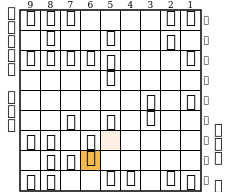

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+
go byoyomi 1000
info currmove 7h6h
info time 0 depth 1 nodes 4 score cp -8093 pv 7h6h
info currmove 7h6h
info currmove 7h6h
info time 0 depth 2 nodes 277 score cp -6851 pv 7h6h 5i8i+
info currmove 7h6h
info currmove 7h6h
info time 17 depth 3 nodes 13494 score cp -9516 pv 7h6h 5i8i+ 8h4d
info currmove 7h6h
info currmove 7h6h
info time 54 depth 4 nodes 56836 score cp -7531 pv 7h6h 5i8i+ G*7i 8i8h
info currmove 7h6h
info time 54 nodes 56838 score cp -7531 pv 7h6h 5i8i+ G*7i 8i8h
bestmove 7h6h
83手目


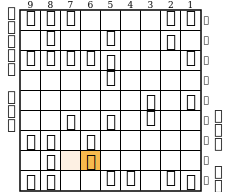

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h
go byoyomi 1000
info currmove 5i8i+
info time 101 depth 1 nodes 3 score cp 5432 pv 5i8i+
info currmove 5i8i+
info time 102 depth 2 nodes 498 score cp 8097 pv 5i8i+ 8h4d
info currmove 5i8i+
info currmove 5i8i+
info time 120 depth 3 nodes 18938 score cp 6327 pv 5i8i+ G*7i 8i8h
info currmove 5i8i+
info currmove 5i8i+
info time 181 depth 4 nodes 76020 score cp 8297 pv 5i8i+ 8h4d P*4c 4d6f
info currmove 5i8i+
info time 501 nodes 352065 score cp 6327 pv 5i8i+ 8h4d P*4c 4d6f
bestmove 5i8i+
84手目


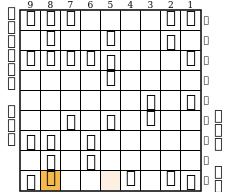

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+
go byoyomi 1000
info currmove 8h4d
info time 49 depth 1 nodes 4 score cp -8080 pv 8h4d
info currmove G*7i
info currmove 8h4d
info time 98 depth 2 nodes 560 score cp -6654 pv 8h4d 2i1i
info currmove G*7i
info time 99 depth 2 nodes 886 score cp -6310 pv G*7i 8i8h
info currmove 8h4d
info time 121 depth 3 nodes 17659 score cp -8280 pv 8h4d P*4c 4d6f
info currmove G*7i
info currmove 8h4d
info time 200 depth 4 nodes 90155 score cp -6650 pv 8h4d 8i5i 6h7h 2i1i
info currmove G*7i
info time 443 depth 4 nodes 354215 score cp -6398 pv B*1f P*2e G*7i 8

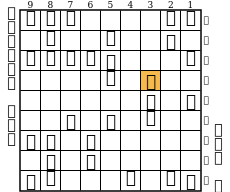

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d
go byoyomi 1000
info currmove 5b5c
info time 0 depth 1 nodes 4 score cp 6940 pv 5b5c
info currmove 5b5c
info currmove 5b5c
info time 1 depth 2 nodes 181 score cp 9605 pv 5b5c 8h4d
info currmove 5b5c
info currmove 5b5c
info time 13 depth 3 nodes 12430 score cp 6131 pv 5b5c 8h4d 5c4b
info currmove 5b5c
info time 27 depth 3 nodes 25903 score cp 6340 pv S*4c G*7i 8i8h
info time 42 depth 3 nodes 39675 score cp 6365 pv N*4c G*7i 8i8h
info time 53 depth 3 nodes 50676 score cp 6395 pv P*4c G*7i 8i8h
info currmove 5b5c
info time 56 depth 4 node

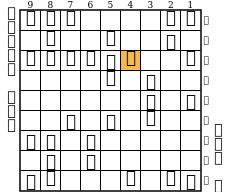

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c
go byoyomi 1000
info currmove G*7i
info time 37 depth 1 nodes 3 score cp -8590 pv G*7i
info time 37 depth 1 nodes 97 score cp -8519 pv 6h7g
info currmove G*7i
info time 70 depth 2 nodes 394 score cp -6340 pv G*7i 8i8h
info currmove 6h7g
info currmove G*7i
info time 106 depth 3 nodes 4963 score cp -9276 pv G*7i 4c3d 7i8i
info currmove 6h7g
info time 118 depth 3 nodes 13785 score cp -9228 pv 8h4d 4c3d 3e3d
info currmove G*7i
info time 144 depth 4 nodes 35032 score cp -8863 pv G*7i 8i8h 7i8h 4c3d
info currmove 8h4d
info time 176 dept

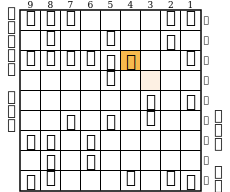

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+
go byoyomi 1000
info currmove 5b4c
info time 0 depth 1 nodes 4 score cp 7095 pv 5b4c
info currmove 5b4c
info currmove 5b4c
info time 1 depth 2 nodes 236 score cp 9760 pv 5b4c 8h4d
info currmove 5b4c
info currmove 5b4c
info time 18 depth 3 nodes 16876 score cp 7116 pv 5b4c 3e4d 4c4b
info currmove 5b4c
info currmove 5b4c
info time 61 depth 4 nodes 46849 score cp 9825 pv 5b4c S*4d 4c4b 6h7g
info currmove 5b4c
info time 96 nodes 80627 score cp 9825 pv 5b4c S*4d 4c4b 6h7g
bestmove 5b4c
88手目


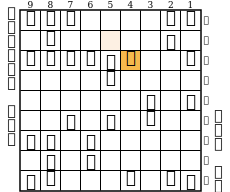

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c
go byoyomi 1000
info currmove 3e4d
info time 60 depth 1 nodes 3 score cp -12235 pv 3e4d
info time 60 depth 1 nodes 140 score cp -9760 pv 8h4d
info currmove 8h4d
info time 101 depth 2 nodes 558 score cp -8334 pv 8h4d 2i1i
info currmove 3e4d
info time 101 depth 2 nodes 568 score cp -7116 pv 3e4d 4c4b
info currmove 8h4d
info time 126 depth 3 nodes 17697 score cp -9930 pv 8h4d N*5b 4d6f
info currmove 3e4d
info time 142 depth 3 nodes 27621 score cp -9825 pv S*4d 4c4b 6h7g
info currmove 3e4d
info time 181 depth 4 nodes 68056 

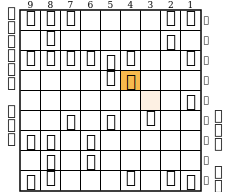

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d
go byoyomi 1000
info currmove 4c4b
info time 0 depth 1 nodes 4 score cp 7116 pv 4c4b
info currmove 4c3d
info currmove 4c4b
info time 1 depth 2 nodes 230 score cp 9780 pv 4c4b 6h7g
info currmove 4c3d
info time 1 depth 2 nodes 450 score cp 10800 pv 4c3d 2b2a
info currmove 4c4b
info time 16 depth 3 nodes 15481 score cp 7173 pv 4c4b S*4c 4b5a
info currmove 4c3d
info currmove 4c4b
info time 81 depth 4 nodes 78777 score cp 9777 pv 4c4b 8h6f 8i5i 6h7h
info currmove 4c3d
info time 159 nodes 155523 score cp 9777 pv 4c4b 8h6

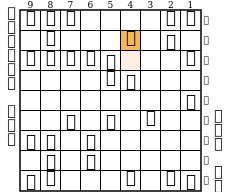

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b
go byoyomi 1000
info time 0 nodes 0 score mate + pv S*4c
bestmove S*4c
91手目


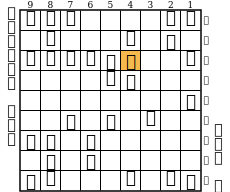

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b S*4c
go byoyomi 1000
info currmove 4b5a
info time 0 depth 1 nodes 4 score cp 7173 pv 4b5a
info currmove 4b5a
info currmove 4b5a
info time 0 depth 2 nodes 166 score cp 10863 pv 4b5a 2b2a
info currmove 4b5a
info currmove 4b5a
info time 7 depth 3 nodes 6072 score mate - pv 4b5a G*6a 8i8h
info currmove 4b5a
info currmove 4b5a
info time 21 depth 4 nodes 21766 score mate - pv 4b5a G*6a 8i8h 6h6i
info time 21 nodes 21768 score mate - pv 4b5a G*6a 8i8h 6h6i
bestmove 4b5a
92手目


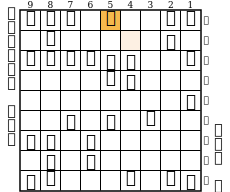

position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ G*2b 3b4a N*5c 4a5b 7h6h R*5i 6i7h 5g6h+ 7h6h 5i8i+ B*3d S*4c 3d4c+ 5b4c 3e4d 4c4b S*4c 4b5a
go byoyomi 1000
info time 0 nodes 0 score mate + pv G*6a
bestmove G*6a
93手目


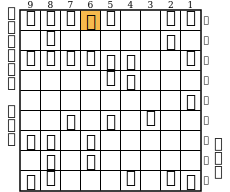

まで93手で先手の勝ち
対局数2 Lesserkai 1.4.2 1勝(50%) Lesserkai 1.4.2 1勝(50%)

対局数2 先手勝ち2(100%) 後手勝ち0(0%) 引き分け0

Lesserkai 1.4.2
勝ち1(50%) 先手勝ち1(50%) 後手勝ち0(0%)

Lesserkai 1.4.2
勝ち1(50%) 先手勝ち1(50%) 後手勝ち0(0%)


In [ ]:
# 連続対局
# 設定例：対局数2回、秒読み1秒
cli.main('/content/LesserkaiSrc/Lesserkai/Lesserkai', '/content/LesserkaiSrc/Lesserkai/Lesserkai', games=2, byoyomi=1000)